In [1]:
import numpy as np
from sklearn.datasets import load_files
from glob import glob
from keras.utils import np_utils
import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image                  
from tqdm import tqdm
from keras.preprocessing import image                  
from PIL import ImageFile    
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [2]:
def load_dataset(path):
    data = load_files(path, shuffle=False)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), None)
    return files, targets

In [3]:
train_files, train_targets = load_dataset("data\\train")
test_files, test_targets = load_dataset("data\\test")

In [4]:
print('Total {} images'.format(len(np.hstack([train_files, test_files]))))
print('-> {} training images'.format(len(train_files)))
print('-> {} testing images'.format(len(test_files)))

Total 372451 images
-> 249426 training images
-> 123025 testing images


In [5]:
classes = [i[11:-1].upper() for i in sorted(glob('data\\train\\*\\'))]
print(classes)
print(len(classes))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
26


In [6]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(28, 28))
    # convert PIL.Image.Image type to 3D tensor with shape (28, 28, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 28, 28, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [7]:
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|█████████████████████████████████| 123025/123025 [04:35<00:00, 446.26it/s]


In [52]:
train_tensors[0].shape

(28, 28, 3)

In [64]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=train_tensors[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 26)                3354      
Total para

In [65]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [66]:
history = model.fit(train_tensors, train_targets, batch_size=64, epochs=10, verbose=1, 
                    validation_data=(test_tensors, test_targets))

score = model.evaluate(test_tensors, test_targets, verbose=0)

model.save('test2.h5')

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 249426 samples, validate on 123025 samples
Epoch 1/10


 13440/249426 [>.............................] - ETA: 44:40 - loss: 3.3585 - acc: 0.01 - ETA: 25:05 - loss: 3.2345 - acc: 0.06 - ETA: 18:11 - loss: 3.2140 - acc: 0.07 - ETA: 14:41 - loss: 3.1099 - acc: 0.12 - ETA: 12:33 - loss: 3.0611 - acc: 0.14 - ETA: 11:09 - loss: 3.0368 - acc: 0.16 - ETA: 10:05 - loss: 3.0221 - acc: 0.17 - ETA: 9:20 - loss: 2.9673 - acc: 0.1855 - ETA: 8:44 - loss: 2.9405 - acc: 0.185 - ETA: 8:23 - loss: 2.9112 - acc: 0.198 - ETA: 7:58 - loss: 2.8896 - acc: 0.204 - ETA: 7:40 - loss: 2.8439 - acc: 0.224 - ETA: 7:23 - loss: 2.7880 - acc: 0.247 - ETA: 7:10 - loss: 2.7759 - acc: 0.253 - ETA: 6:59 - loss: 2.7465 - acc: 0.263 - ETA: 6:49 - loss: 2.7141 - acc: 0.272 - ETA: 6:40 - loss: 2.6947 - acc: 0.275 - ETA: 6:31 - loss: 2.6504 - acc: 0.286 - ETA: 6:24 - loss: 2.6230 - acc: 0.295 - ETA: 6:20 - loss: 2.6010 - acc: 0.300 - ETA: 6:15 - loss: 2.5592 - acc: 0.308 - ETA: 6:09 - loss: 2.5397 - acc: 0.313 - ETA: 6:03 - loss: 2.5129 - acc: 0.317 - ETA: 5:58 - loss: 2.4958 - acc

 26752/249426 [==>...........................] - ETA: 4:13 - loss: 1.2736 - acc: 0.641 - ETA: 4:13 - loss: 1.2709 - acc: 0.641 - ETA: 4:12 - loss: 1.2692 - acc: 0.642 - ETA: 4:12 - loss: 1.2671 - acc: 0.642 - ETA: 4:12 - loss: 1.2649 - acc: 0.643 - ETA: 4:11 - loss: 1.2631 - acc: 0.643 - ETA: 4:11 - loss: 1.2605 - acc: 0.644 - ETA: 4:11 - loss: 1.2585 - acc: 0.645 - ETA: 4:11 - loss: 1.2562 - acc: 0.645 - ETA: 4:10 - loss: 1.2543 - acc: 0.646 - ETA: 4:10 - loss: 1.2523 - acc: 0.646 - ETA: 4:10 - loss: 1.2492 - acc: 0.647 - ETA: 4:10 - loss: 1.2461 - acc: 0.648 - ETA: 4:09 - loss: 1.2441 - acc: 0.649 - ETA: 4:09 - loss: 1.2415 - acc: 0.650 - ETA: 4:09 - loss: 1.2397 - acc: 0.650 - ETA: 4:09 - loss: 1.2371 - acc: 0.651 - ETA: 4:08 - loss: 1.2350 - acc: 0.651 - ETA: 4:08 - loss: 1.2325 - acc: 0.652 - ETA: 4:08 - loss: 1.2305 - acc: 0.652 - ETA: 4:07 - loss: 1.2280 - acc: 0.653 - ETA: 4:07 - loss: 1.2275 - acc: 0.653 - ETA: 4:07 - loss: 1.2258 - acc: 0.653 - ETA: 4:07 - loss: 1.2242 - acc:

 39808/249426 [===>..........................] - ETA: 3:46 - loss: 0.9488 - acc: 0.730 - ETA: 3:46 - loss: 0.9481 - acc: 0.730 - ETA: 3:46 - loss: 0.9477 - acc: 0.730 - ETA: 3:46 - loss: 0.9467 - acc: 0.730 - ETA: 3:46 - loss: 0.9456 - acc: 0.730 - ETA: 3:46 - loss: 0.9443 - acc: 0.731 - ETA: 3:46 - loss: 0.9437 - acc: 0.731 - ETA: 3:46 - loss: 0.9425 - acc: 0.731 - ETA: 3:46 - loss: 0.9419 - acc: 0.731 - ETA: 3:45 - loss: 0.9405 - acc: 0.732 - ETA: 3:45 - loss: 0.9393 - acc: 0.732 - ETA: 3:45 - loss: 0.9384 - acc: 0.732 - ETA: 3:45 - loss: 0.9374 - acc: 0.732 - ETA: 3:45 - loss: 0.9371 - acc: 0.733 - ETA: 3:45 - loss: 0.9361 - acc: 0.733 - ETA: 3:45 - loss: 0.9355 - acc: 0.733 - ETA: 3:45 - loss: 0.9356 - acc: 0.733 - ETA: 3:44 - loss: 0.9347 - acc: 0.733 - ETA: 3:44 - loss: 0.9343 - acc: 0.733 - ETA: 3:44 - loss: 0.9334 - acc: 0.734 - ETA: 3:44 - loss: 0.9323 - acc: 0.734 - ETA: 3:44 - loss: 0.9313 - acc: 0.734 - ETA: 3:44 - loss: 0.9300 - acc: 0.735 - ETA: 3:44 - loss: 0.9291 - acc:

 52864/249426 [=====>........................] - ETA: 3:37 - loss: 0.7957 - acc: 0.772 - ETA: 3:37 - loss: 0.7953 - acc: 0.772 - ETA: 3:37 - loss: 0.7947 - acc: 0.772 - ETA: 3:37 - loss: 0.7940 - acc: 0.773 - ETA: 3:37 - loss: 0.7932 - acc: 0.773 - ETA: 3:37 - loss: 0.7929 - acc: 0.773 - ETA: 3:37 - loss: 0.7923 - acc: 0.773 - ETA: 3:37 - loss: 0.7918 - acc: 0.773 - ETA: 3:37 - loss: 0.7915 - acc: 0.773 - ETA: 3:37 - loss: 0.7910 - acc: 0.773 - ETA: 3:37 - loss: 0.7907 - acc: 0.773 - ETA: 3:37 - loss: 0.7902 - acc: 0.774 - ETA: 3:37 - loss: 0.7894 - acc: 0.774 - ETA: 3:37 - loss: 0.7888 - acc: 0.774 - ETA: 3:37 - loss: 0.7882 - acc: 0.774 - ETA: 3:37 - loss: 0.7878 - acc: 0.774 - ETA: 3:37 - loss: 0.7871 - acc: 0.774 - ETA: 3:37 - loss: 0.7863 - acc: 0.775 - ETA: 3:37 - loss: 0.7858 - acc: 0.775 - ETA: 3:37 - loss: 0.7851 - acc: 0.775 - ETA: 3:36 - loss: 0.7844 - acc: 0.775 - ETA: 3:36 - loss: 0.7835 - acc: 0.775 - ETA: 3:36 - loss: 0.7826 - acc: 0.776 - ETA: 3:37 - loss: 0.7822 - acc:

 65920/249426 [======>.......................] - ETA: 3:31 - loss: 0.6982 - acc: 0.800 - ETA: 3:31 - loss: 0.6979 - acc: 0.800 - ETA: 3:31 - loss: 0.6976 - acc: 0.800 - ETA: 3:31 - loss: 0.6972 - acc: 0.800 - ETA: 3:31 - loss: 0.6968 - acc: 0.800 - ETA: 3:31 - loss: 0.6964 - acc: 0.800 - ETA: 3:31 - loss: 0.6962 - acc: 0.800 - ETA: 3:31 - loss: 0.6958 - acc: 0.801 - ETA: 3:30 - loss: 0.6955 - acc: 0.801 - ETA: 3:30 - loss: 0.6950 - acc: 0.801 - ETA: 3:30 - loss: 0.6946 - acc: 0.801 - ETA: 3:30 - loss: 0.6941 - acc: 0.801 - ETA: 3:30 - loss: 0.6936 - acc: 0.801 - ETA: 3:30 - loss: 0.6932 - acc: 0.801 - ETA: 3:30 - loss: 0.6927 - acc: 0.801 - ETA: 3:30 - loss: 0.6921 - acc: 0.802 - ETA: 3:30 - loss: 0.6916 - acc: 0.802 - ETA: 3:30 - loss: 0.6910 - acc: 0.802 - ETA: 3:30 - loss: 0.6907 - acc: 0.802 - ETA: 3:30 - loss: 0.6903 - acc: 0.802 - ETA: 3:30 - loss: 0.6900 - acc: 0.802 - ETA: 3:30 - loss: 0.6895 - acc: 0.802 - ETA: 3:30 - loss: 0.6890 - acc: 0.802 - ETA: 3:30 - loss: 0.6886 - acc:

 78976/249426 [========>.....................] - ETA: 3:25 - loss: 0.6306 - acc: 0.819 - ETA: 3:25 - loss: 0.6305 - acc: 0.819 - ETA: 3:25 - loss: 0.6302 - acc: 0.819 - ETA: 3:25 - loss: 0.6298 - acc: 0.819 - ETA: 3:25 - loss: 0.6295 - acc: 0.819 - ETA: 3:25 - loss: 0.6292 - acc: 0.820 - ETA: 3:25 - loss: 0.6290 - acc: 0.820 - ETA: 3:25 - loss: 0.6289 - acc: 0.820 - ETA: 3:25 - loss: 0.6286 - acc: 0.820 - ETA: 3:25 - loss: 0.6283 - acc: 0.820 - ETA: 3:25 - loss: 0.6281 - acc: 0.820 - ETA: 3:25 - loss: 0.6279 - acc: 0.820 - ETA: 3:24 - loss: 0.6276 - acc: 0.820 - ETA: 3:24 - loss: 0.6273 - acc: 0.820 - ETA: 3:24 - loss: 0.6268 - acc: 0.820 - ETA: 3:24 - loss: 0.6266 - acc: 0.820 - ETA: 3:24 - loss: 0.6263 - acc: 0.820 - ETA: 3:24 - loss: 0.6260 - acc: 0.820 - ETA: 3:24 - loss: 0.6258 - acc: 0.821 - ETA: 3:24 - loss: 0.6256 - acc: 0.821 - ETA: 3:24 - loss: 0.6252 - acc: 0.821 - ETA: 3:24 - loss: 0.6249 - acc: 0.821 - ETA: 3:24 - loss: 0.6246 - acc: 0.821 - ETA: 3:24 - loss: 0.6245 - acc:

 92032/249426 [==========>...................] - ETA: 3:12 - loss: 0.5804 - acc: 0.833 - ETA: 3:12 - loss: 0.5801 - acc: 0.833 - ETA: 3:12 - loss: 0.5799 - acc: 0.833 - ETA: 3:11 - loss: 0.5796 - acc: 0.834 - ETA: 3:11 - loss: 0.5795 - acc: 0.834 - ETA: 3:11 - loss: 0.5792 - acc: 0.834 - ETA: 3:11 - loss: 0.5790 - acc: 0.834 - ETA: 3:11 - loss: 0.5787 - acc: 0.834 - ETA: 3:11 - loss: 0.5785 - acc: 0.834 - ETA: 3:11 - loss: 0.5782 - acc: 0.834 - ETA: 3:11 - loss: 0.5779 - acc: 0.834 - ETA: 3:11 - loss: 0.5778 - acc: 0.834 - ETA: 3:11 - loss: 0.5778 - acc: 0.834 - ETA: 3:11 - loss: 0.5776 - acc: 0.834 - ETA: 3:11 - loss: 0.5773 - acc: 0.834 - ETA: 3:11 - loss: 0.5769 - acc: 0.834 - ETA: 3:10 - loss: 0.5767 - acc: 0.834 - ETA: 3:10 - loss: 0.5764 - acc: 0.834 - ETA: 3:10 - loss: 0.5762 - acc: 0.834 - ETA: 3:10 - loss: 0.5760 - acc: 0.834 - ETA: 3:10 - loss: 0.5758 - acc: 0.834 - ETA: 3:10 - loss: 0.5758 - acc: 0.835 - ETA: 3:10 - loss: 0.5756 - acc: 0.835 - ETA: 3:10 - loss: 0.5753 - acc:

105088/249426 [===========>..................] - ETA: 2:58 - loss: 0.5424 - acc: 0.844 - ETA: 2:58 - loss: 0.5422 - acc: 0.844 - ETA: 2:58 - loss: 0.5422 - acc: 0.844 - ETA: 2:58 - loss: 0.5420 - acc: 0.844 - ETA: 2:58 - loss: 0.5418 - acc: 0.844 - ETA: 2:58 - loss: 0.5416 - acc: 0.844 - ETA: 2:57 - loss: 0.5415 - acc: 0.844 - ETA: 2:57 - loss: 0.5413 - acc: 0.844 - ETA: 2:57 - loss: 0.5410 - acc: 0.844 - ETA: 2:57 - loss: 0.5410 - acc: 0.844 - ETA: 2:57 - loss: 0.5408 - acc: 0.844 - ETA: 2:57 - loss: 0.5407 - acc: 0.844 - ETA: 2:57 - loss: 0.5404 - acc: 0.844 - ETA: 2:57 - loss: 0.5402 - acc: 0.844 - ETA: 2:57 - loss: 0.5400 - acc: 0.844 - ETA: 2:57 - loss: 0.5398 - acc: 0.844 - ETA: 2:57 - loss: 0.5397 - acc: 0.844 - ETA: 2:57 - loss: 0.5396 - acc: 0.844 - ETA: 2:57 - loss: 0.5394 - acc: 0.845 - ETA: 2:57 - loss: 0.5393 - acc: 0.845 - ETA: 2:56 - loss: 0.5390 - acc: 0.845 - ETA: 2:56 - loss: 0.5388 - acc: 0.845 - ETA: 2:56 - loss: 0.5387 - acc: 0.845 - ETA: 2:56 - loss: 0.5386 - acc:

118144/249426 [=============>................] - ETA: 2:44 - loss: 0.5113 - acc: 0.853 - ETA: 2:44 - loss: 0.5112 - acc: 0.853 - ETA: 2:44 - loss: 0.5111 - acc: 0.853 - ETA: 2:44 - loss: 0.5109 - acc: 0.853 - ETA: 2:44 - loss: 0.5108 - acc: 0.853 - ETA: 2:44 - loss: 0.5107 - acc: 0.853 - ETA: 2:43 - loss: 0.5105 - acc: 0.853 - ETA: 2:43 - loss: 0.5103 - acc: 0.853 - ETA: 2:43 - loss: 0.5101 - acc: 0.853 - ETA: 2:43 - loss: 0.5100 - acc: 0.853 - ETA: 2:43 - loss: 0.5100 - acc: 0.853 - ETA: 2:43 - loss: 0.5100 - acc: 0.853 - ETA: 2:43 - loss: 0.5099 - acc: 0.853 - ETA: 2:43 - loss: 0.5097 - acc: 0.853 - ETA: 2:43 - loss: 0.5095 - acc: 0.853 - ETA: 2:43 - loss: 0.5094 - acc: 0.853 - ETA: 2:43 - loss: 0.5092 - acc: 0.853 - ETA: 2:43 - loss: 0.5090 - acc: 0.853 - ETA: 2:43 - loss: 0.5091 - acc: 0.853 - ETA: 2:42 - loss: 0.5089 - acc: 0.853 - ETA: 2:42 - loss: 0.5087 - acc: 0.853 - ETA: 2:42 - loss: 0.5086 - acc: 0.854 - ETA: 2:42 - loss: 0.5085 - acc: 0.854 - ETA: 2:42 - loss: 0.5083 - acc:

131200/249426 [==============>...............] - ETA: 2:29 - loss: 0.4855 - acc: 0.860 - ETA: 2:29 - loss: 0.4853 - acc: 0.860 - ETA: 2:29 - loss: 0.4852 - acc: 0.860 - ETA: 2:29 - loss: 0.4850 - acc: 0.860 - ETA: 2:29 - loss: 0.4849 - acc: 0.860 - ETA: 2:29 - loss: 0.4850 - acc: 0.860 - ETA: 2:29 - loss: 0.4848 - acc: 0.860 - ETA: 2:29 - loss: 0.4847 - acc: 0.860 - ETA: 2:29 - loss: 0.4846 - acc: 0.860 - ETA: 2:28 - loss: 0.4844 - acc: 0.860 - ETA: 2:28 - loss: 0.4842 - acc: 0.860 - ETA: 2:28 - loss: 0.4842 - acc: 0.860 - ETA: 2:28 - loss: 0.4841 - acc: 0.860 - ETA: 2:28 - loss: 0.4840 - acc: 0.860 - ETA: 2:28 - loss: 0.4839 - acc: 0.860 - ETA: 2:28 - loss: 0.4839 - acc: 0.860 - ETA: 2:28 - loss: 0.4837 - acc: 0.860 - ETA: 2:28 - loss: 0.4836 - acc: 0.860 - ETA: 2:28 - loss: 0.4835 - acc: 0.861 - ETA: 2:28 - loss: 0.4835 - acc: 0.860 - ETA: 2:28 - loss: 0.4834 - acc: 0.861 - ETA: 2:28 - loss: 0.4834 - acc: 0.861 - ETA: 2:27 - loss: 0.4832 - acc: 0.861 - ETA: 2:27 - loss: 0.4831 - acc:

144256/249426 [================>.............] - ETA: 2:14 - loss: 0.4645 - acc: 0.866 - ETA: 2:14 - loss: 0.4644 - acc: 0.866 - ETA: 2:14 - loss: 0.4644 - acc: 0.866 - ETA: 2:14 - loss: 0.4642 - acc: 0.866 - ETA: 2:14 - loss: 0.4641 - acc: 0.866 - ETA: 2:14 - loss: 0.4639 - acc: 0.866 - ETA: 2:14 - loss: 0.4638 - acc: 0.866 - ETA: 2:14 - loss: 0.4637 - acc: 0.866 - ETA: 2:14 - loss: 0.4635 - acc: 0.866 - ETA: 2:14 - loss: 0.4635 - acc: 0.866 - ETA: 2:14 - loss: 0.4633 - acc: 0.866 - ETA: 2:14 - loss: 0.4633 - acc: 0.866 - ETA: 2:14 - loss: 0.4632 - acc: 0.866 - ETA: 2:13 - loss: 0.4631 - acc: 0.866 - ETA: 2:13 - loss: 0.4630 - acc: 0.866 - ETA: 2:13 - loss: 0.4629 - acc: 0.866 - ETA: 2:13 - loss: 0.4628 - acc: 0.866 - ETA: 2:13 - loss: 0.4628 - acc: 0.866 - ETA: 2:13 - loss: 0.4628 - acc: 0.866 - ETA: 2:13 - loss: 0.4627 - acc: 0.866 - ETA: 2:13 - loss: 0.4627 - acc: 0.866 - ETA: 2:13 - loss: 0.4626 - acc: 0.866 - ETA: 2:13 - loss: 0.4625 - acc: 0.866 - ETA: 2:13 - loss: 0.4625 - acc:

157312/249426 [=================>............] - ETA: 2:00 - loss: 0.4462 - acc: 0.871 - ETA: 1:59 - loss: 0.4461 - acc: 0.871 - ETA: 1:59 - loss: 0.4461 - acc: 0.871 - ETA: 1:59 - loss: 0.4460 - acc: 0.871 - ETA: 1:59 - loss: 0.4459 - acc: 0.871 - ETA: 1:59 - loss: 0.4458 - acc: 0.871 - ETA: 1:59 - loss: 0.4457 - acc: 0.871 - ETA: 1:59 - loss: 0.4456 - acc: 0.871 - ETA: 1:59 - loss: 0.4455 - acc: 0.871 - ETA: 1:59 - loss: 0.4456 - acc: 0.871 - ETA: 1:59 - loss: 0.4455 - acc: 0.871 - ETA: 1:59 - loss: 0.4454 - acc: 0.871 - ETA: 1:59 - loss: 0.4453 - acc: 0.871 - ETA: 1:59 - loss: 0.4452 - acc: 0.871 - ETA: 1:58 - loss: 0.4452 - acc: 0.871 - ETA: 1:58 - loss: 0.4450 - acc: 0.871 - ETA: 1:58 - loss: 0.4449 - acc: 0.871 - ETA: 1:58 - loss: 0.4448 - acc: 0.871 - ETA: 1:58 - loss: 0.4447 - acc: 0.871 - ETA: 1:58 - loss: 0.4446 - acc: 0.871 - ETA: 1:58 - loss: 0.4445 - acc: 0.871 - ETA: 1:58 - loss: 0.4444 - acc: 0.871 - ETA: 1:58 - loss: 0.4443 - acc: 0.872 - ETA: 1:58 - loss: 0.4442 - acc:

170368/249426 [===================>..........] - ETA: 1:45 - loss: 0.4304 - acc: 0.876 - ETA: 1:45 - loss: 0.4302 - acc: 0.876 - ETA: 1:45 - loss: 0.4302 - acc: 0.876 - ETA: 1:44 - loss: 0.4301 - acc: 0.876 - ETA: 1:44 - loss: 0.4300 - acc: 0.876 - ETA: 1:44 - loss: 0.4299 - acc: 0.876 - ETA: 1:44 - loss: 0.4299 - acc: 0.876 - ETA: 1:44 - loss: 0.4299 - acc: 0.876 - ETA: 1:44 - loss: 0.4298 - acc: 0.876 - ETA: 1:44 - loss: 0.4297 - acc: 0.876 - ETA: 1:44 - loss: 0.4296 - acc: 0.876 - ETA: 1:44 - loss: 0.4295 - acc: 0.876 - ETA: 1:44 - loss: 0.4294 - acc: 0.876 - ETA: 1:44 - loss: 0.4293 - acc: 0.876 - ETA: 1:44 - loss: 0.4291 - acc: 0.876 - ETA: 1:44 - loss: 0.4290 - acc: 0.876 - ETA: 1:44 - loss: 0.4289 - acc: 0.876 - ETA: 1:43 - loss: 0.4288 - acc: 0.876 - ETA: 1:43 - loss: 0.4288 - acc: 0.876 - ETA: 1:43 - loss: 0.4286 - acc: 0.876 - ETA: 1:43 - loss: 0.4286 - acc: 0.876 - ETA: 1:43 - loss: 0.4284 - acc: 0.876 - ETA: 1:43 - loss: 0.4284 - acc: 0.876 - ETA: 1:43 - loss: 0.4283 - acc:

183424/249426 [=====================>........] - ETA: 1:30 - loss: 0.4170 - acc: 0.879 - ETA: 1:30 - loss: 0.4170 - acc: 0.879 - ETA: 1:30 - loss: 0.4169 - acc: 0.879 - ETA: 1:30 - loss: 0.4169 - acc: 0.879 - ETA: 1:30 - loss: 0.4168 - acc: 0.880 - ETA: 1:29 - loss: 0.4167 - acc: 0.880 - ETA: 1:29 - loss: 0.4166 - acc: 0.880 - ETA: 1:29 - loss: 0.4165 - acc: 0.880 - ETA: 1:29 - loss: 0.4164 - acc: 0.880 - ETA: 1:29 - loss: 0.4164 - acc: 0.880 - ETA: 1:29 - loss: 0.4164 - acc: 0.880 - ETA: 1:29 - loss: 0.4163 - acc: 0.880 - ETA: 1:29 - loss: 0.4162 - acc: 0.880 - ETA: 1:29 - loss: 0.4162 - acc: 0.880 - ETA: 1:29 - loss: 0.4161 - acc: 0.880 - ETA: 1:29 - loss: 0.4160 - acc: 0.880 - ETA: 1:29 - loss: 0.4159 - acc: 0.880 - ETA: 1:29 - loss: 0.4158 - acc: 0.880 - ETA: 1:29 - loss: 0.4158 - acc: 0.880 - ETA: 1:28 - loss: 0.4158 - acc: 0.880 - ETA: 1:28 - loss: 0.4157 - acc: 0.880 - ETA: 1:28 - loss: 0.4157 - acc: 0.880 - ETA: 1:28 - loss: 0.4156 - acc: 0.880 - ETA: 1:28 - loss: 0.4155 - acc:

196480/249426 [======================>.......] - ETA: 1:15 - loss: 0.4048 - acc: 0.883 - ETA: 1:15 - loss: 0.4047 - acc: 0.883 - ETA: 1:15 - loss: 0.4047 - acc: 0.883 - ETA: 1:15 - loss: 0.4046 - acc: 0.883 - ETA: 1:15 - loss: 0.4045 - acc: 0.883 - ETA: 1:15 - loss: 0.4044 - acc: 0.883 - ETA: 1:15 - loss: 0.4044 - acc: 0.883 - ETA: 1:14 - loss: 0.4043 - acc: 0.883 - ETA: 1:14 - loss: 0.4043 - acc: 0.883 - ETA: 1:14 - loss: 0.4042 - acc: 0.883 - ETA: 1:14 - loss: 0.4042 - acc: 0.883 - ETA: 1:14 - loss: 0.4041 - acc: 0.883 - ETA: 1:14 - loss: 0.4040 - acc: 0.883 - ETA: 1:14 - loss: 0.4040 - acc: 0.883 - ETA: 1:14 - loss: 0.4039 - acc: 0.883 - ETA: 1:14 - loss: 0.4038 - acc: 0.883 - ETA: 1:14 - loss: 0.4037 - acc: 0.883 - ETA: 1:14 - loss: 0.4037 - acc: 0.883 - ETA: 1:14 - loss: 0.4036 - acc: 0.883 - ETA: 1:14 - loss: 0.4036 - acc: 0.883 - ETA: 1:14 - loss: 0.4036 - acc: 0.883 - ETA: 1:13 - loss: 0.4035 - acc: 0.883 - ETA: 1:13 - loss: 0.4035 - acc: 0.883 - ETA: 1:13 - loss: 0.4034 - acc:

210176/249426 [========================>.....] - ETA: 1:00 - loss: 0.3942 - acc: 0.886 - ETA: 1:00 - loss: 0.3941 - acc: 0.886 - ETA: 1:00 - loss: 0.3942 - acc: 0.886 - ETA: 1:00 - loss: 0.3941 - acc: 0.886 - ETA: 1:00 - loss: 0.3940 - acc: 0.886 - ETA: 1:00 - loss: 0.3940 - acc: 0.886 - ETA: 1:00 - loss: 0.3939 - acc: 0.886 - ETA: 1:00 - loss: 0.3938 - acc: 0.886 - ETA: 1:00 - loss: 0.3938 - acc: 0.886 - ETA: 1:00 - loss: 0.3938 - acc: 0.886 - ETA: 1:00 - loss: 0.3937 - acc: 0.886 - ETA: 1:00 - loss: 0.3937 - acc: 0.886 - ETA: 59s - loss: 0.3937 - acc: 0.886 - ETA: 59s - loss: 0.3936 - acc: 0.88 - ETA: 59s - loss: 0.3935 - acc: 0.88 - ETA: 59s - loss: 0.3934 - acc: 0.88 - ETA: 59s - loss: 0.3934 - acc: 0.88 - ETA: 59s - loss: 0.3934 - acc: 0.88 - ETA: 59s - loss: 0.3933 - acc: 0.88 - ETA: 59s - loss: 0.3932 - acc: 0.88 - ETA: 59s - loss: 0.3932 - acc: 0.88 - ETA: 59s - loss: 0.3931 - acc: 0.88 - ETA: 59s - loss: 0.3931 - acc: 0.88 - ETA: 59s - loss: 0.3930 - acc: 0.88 - ETA: 59s - los

223936/249426 [=========================>....] - ETA: 45s - loss: 0.3849 - acc: 0.88 - ETA: 45s - loss: 0.3849 - acc: 0.88 - ETA: 45s - loss: 0.3849 - acc: 0.88 - ETA: 45s - loss: 0.3849 - acc: 0.88 - ETA: 45s - loss: 0.3848 - acc: 0.88 - ETA: 45s - loss: 0.3848 - acc: 0.88 - ETA: 44s - loss: 0.3848 - acc: 0.88 - ETA: 44s - loss: 0.3848 - acc: 0.88 - ETA: 44s - loss: 0.3847 - acc: 0.88 - ETA: 44s - loss: 0.3847 - acc: 0.88 - ETA: 44s - loss: 0.3847 - acc: 0.88 - ETA: 44s - loss: 0.3846 - acc: 0.88 - ETA: 44s - loss: 0.3846 - acc: 0.88 - ETA: 44s - loss: 0.3845 - acc: 0.88 - ETA: 44s - loss: 0.3845 - acc: 0.88 - ETA: 44s - loss: 0.3845 - acc: 0.88 - ETA: 44s - loss: 0.3845 - acc: 0.88 - ETA: 44s - loss: 0.3844 - acc: 0.88 - ETA: 44s - loss: 0.3844 - acc: 0.88 - ETA: 43s - loss: 0.3843 - acc: 0.88 - ETA: 43s - loss: 0.3842 - acc: 0.88 - ETA: 43s - loss: 0.3842 - acc: 0.88 - ETA: 43s - loss: 0.3841 - acc: 0.88 - ETA: 43s - loss: 0.3841 - acc: 0.88 - ETA: 43s - loss: 0.3840 - acc: 0.88 - E

237696/249426 [===========================>..] - ETA: 29s - loss: 0.3766 - acc: 0.89 - ETA: 29s - loss: 0.3766 - acc: 0.89 - ETA: 29s - loss: 0.3765 - acc: 0.89 - ETA: 29s - loss: 0.3765 - acc: 0.89 - ETA: 29s - loss: 0.3765 - acc: 0.89 - ETA: 29s - loss: 0.3764 - acc: 0.89 - ETA: 28s - loss: 0.3764 - acc: 0.89 - ETA: 28s - loss: 0.3763 - acc: 0.89 - ETA: 28s - loss: 0.3764 - acc: 0.89 - ETA: 28s - loss: 0.3763 - acc: 0.89 - ETA: 28s - loss: 0.3763 - acc: 0.89 - ETA: 28s - loss: 0.3762 - acc: 0.89 - ETA: 28s - loss: 0.3763 - acc: 0.89 - ETA: 28s - loss: 0.3762 - acc: 0.89 - ETA: 28s - loss: 0.3762 - acc: 0.89 - ETA: 28s - loss: 0.3762 - acc: 0.89 - ETA: 28s - loss: 0.3761 - acc: 0.89 - ETA: 28s - loss: 0.3761 - acc: 0.89 - ETA: 28s - loss: 0.3761 - acc: 0.89 - ETA: 28s - loss: 0.3761 - acc: 0.89 - ETA: 27s - loss: 0.3761 - acc: 0.89 - ETA: 27s - loss: 0.3760 - acc: 0.89 - ETA: 27s - loss: 0.3760 - acc: 0.89 - ETA: 27s - loss: 0.3759 - acc: 0.89 - ETA: 27s - loss: 0.3759 - acc: 0.89 - E

249426/249426 [==============================] - ETA: 13s - loss: 0.3682 - acc: 0.89 - ETA: 13s - loss: 0.3682 - acc: 0.89 - ETA: 13s - loss: 0.3682 - acc: 0.89 - ETA: 13s - loss: 0.3681 - acc: 0.89 - ETA: 13s - loss: 0.3681 - acc: 0.89 - ETA: 13s - loss: 0.3680 - acc: 0.89 - ETA: 13s - loss: 0.3679 - acc: 0.89 - ETA: 12s - loss: 0.3679 - acc: 0.89 - ETA: 12s - loss: 0.3679 - acc: 0.89 - ETA: 12s - loss: 0.3678 - acc: 0.89 - ETA: 12s - loss: 0.3677 - acc: 0.89 - ETA: 12s - loss: 0.3677 - acc: 0.89 - ETA: 12s - loss: 0.3676 - acc: 0.89 - ETA: 12s - loss: 0.3676 - acc: 0.89 - ETA: 12s - loss: 0.3676 - acc: 0.89 - ETA: 12s - loss: 0.3675 - acc: 0.89 - ETA: 12s - loss: 0.3675 - acc: 0.89 - ETA: 12s - loss: 0.3675 - acc: 0.89 - ETA: 12s - loss: 0.3674 - acc: 0.89 - ETA: 12s - loss: 0.3674 - acc: 0.89 - ETA: 12s - loss: 0.3673 - acc: 0.89 - ETA: 11s - loss: 0.3673 - acc: 0.89 - ETA: 11s - loss: 0.3672 - acc: 0.89 - ETA: 11s - loss: 0.3672 - acc: 0.89 - ETA: 11s - loss: 0.3672 - acc: 0.89 - E

 13056/249426 [>.............................] - ETA: 5:35 - loss: 0.3071 - acc: 0.921 - ETA: 5:17 - loss: 0.1923 - acc: 0.960 - ETA: 4:58 - loss: 0.2234 - acc: 0.958 - ETA: 4:53 - loss: 0.2215 - acc: 0.945 - ETA: 4:47 - loss: 0.2183 - acc: 0.940 - ETA: 4:42 - loss: 0.2400 - acc: 0.934 - ETA: 4:43 - loss: 0.2327 - acc: 0.935 - ETA: 4:48 - loss: 0.2226 - acc: 0.937 - ETA: 4:46 - loss: 0.2200 - acc: 0.939 - ETA: 4:48 - loss: 0.2264 - acc: 0.937 - ETA: 4:47 - loss: 0.2188 - acc: 0.937 - ETA: 4:45 - loss: 0.2133 - acc: 0.941 - ETA: 4:45 - loss: 0.2306 - acc: 0.937 - ETA: 4:44 - loss: 0.2342 - acc: 0.935 - ETA: 4:42 - loss: 0.2270 - acc: 0.936 - ETA: 4:43 - loss: 0.2219 - acc: 0.938 - ETA: 4:48 - loss: 0.2180 - acc: 0.940 - ETA: 4:47 - loss: 0.2148 - acc: 0.941 - ETA: 4:47 - loss: 0.2126 - acc: 0.939 - ETA: 4:50 - loss: 0.2095 - acc: 0.939 - ETA: 4:49 - loss: 0.2086 - acc: 0.939 - ETA: 4:48 - loss: 0.2048 - acc: 0.940 - ETA: 4:46 - loss: 0.2063 - acc: 0.938 - ETA: 4:47 - loss: 0.2125 - acc:

 26112/249426 [==>...........................] - ETA: 4:28 - loss: 0.2069 - acc: 0.938 - ETA: 4:29 - loss: 0.2072 - acc: 0.938 - ETA: 4:29 - loss: 0.2077 - acc: 0.938 - ETA: 4:28 - loss: 0.2084 - acc: 0.937 - ETA: 4:28 - loss: 0.2082 - acc: 0.937 - ETA: 4:28 - loss: 0.2083 - acc: 0.937 - ETA: 4:28 - loss: 0.2082 - acc: 0.937 - ETA: 4:28 - loss: 0.2088 - acc: 0.937 - ETA: 4:28 - loss: 0.2095 - acc: 0.937 - ETA: 4:28 - loss: 0.2096 - acc: 0.937 - ETA: 4:28 - loss: 0.2106 - acc: 0.937 - ETA: 4:28 - loss: 0.2105 - acc: 0.937 - ETA: 4:28 - loss: 0.2104 - acc: 0.937 - ETA: 4:27 - loss: 0.2112 - acc: 0.937 - ETA: 4:27 - loss: 0.2109 - acc: 0.937 - ETA: 4:27 - loss: 0.2107 - acc: 0.936 - ETA: 4:27 - loss: 0.2102 - acc: 0.937 - ETA: 4:27 - loss: 0.2103 - acc: 0.937 - ETA: 4:27 - loss: 0.2102 - acc: 0.937 - ETA: 4:27 - loss: 0.2107 - acc: 0.937 - ETA: 4:27 - loss: 0.2108 - acc: 0.937 - ETA: 4:27 - loss: 0.2102 - acc: 0.937 - ETA: 4:26 - loss: 0.2108 - acc: 0.937 - ETA: 4:26 - loss: 0.2105 - acc:

 39168/249426 [===>..........................] - ETA: 4:13 - loss: 0.2117 - acc: 0.939 - ETA: 4:13 - loss: 0.2118 - acc: 0.939 - ETA: 4:13 - loss: 0.2121 - acc: 0.939 - ETA: 4:13 - loss: 0.2121 - acc: 0.939 - ETA: 4:13 - loss: 0.2122 - acc: 0.938 - ETA: 4:13 - loss: 0.2124 - acc: 0.938 - ETA: 4:13 - loss: 0.2124 - acc: 0.938 - ETA: 4:13 - loss: 0.2123 - acc: 0.938 - ETA: 4:12 - loss: 0.2120 - acc: 0.938 - ETA: 4:12 - loss: 0.2117 - acc: 0.939 - ETA: 4:12 - loss: 0.2119 - acc: 0.939 - ETA: 4:12 - loss: 0.2118 - acc: 0.938 - ETA: 4:12 - loss: 0.2117 - acc: 0.939 - ETA: 4:12 - loss: 0.2121 - acc: 0.938 - ETA: 4:12 - loss: 0.2121 - acc: 0.938 - ETA: 4:12 - loss: 0.2120 - acc: 0.938 - ETA: 4:12 - loss: 0.2120 - acc: 0.938 - ETA: 4:12 - loss: 0.2121 - acc: 0.938 - ETA: 4:12 - loss: 0.2123 - acc: 0.938 - ETA: 4:12 - loss: 0.2125 - acc: 0.938 - ETA: 4:12 - loss: 0.2131 - acc: 0.938 - ETA: 4:12 - loss: 0.2133 - acc: 0.938 - ETA: 4:12 - loss: 0.2134 - acc: 0.938 - ETA: 4:12 - loss: 0.2131 - acc:

 52224/249426 [=====>........................] - ETA: 3:59 - loss: 0.2126 - acc: 0.938 - ETA: 3:59 - loss: 0.2126 - acc: 0.938 - ETA: 3:59 - loss: 0.2125 - acc: 0.938 - ETA: 3:59 - loss: 0.2126 - acc: 0.938 - ETA: 3:58 - loss: 0.2125 - acc: 0.938 - ETA: 3:58 - loss: 0.2124 - acc: 0.938 - ETA: 3:58 - loss: 0.2122 - acc: 0.938 - ETA: 3:58 - loss: 0.2124 - acc: 0.938 - ETA: 3:58 - loss: 0.2124 - acc: 0.938 - ETA: 3:58 - loss: 0.2126 - acc: 0.938 - ETA: 3:58 - loss: 0.2125 - acc: 0.938 - ETA: 3:58 - loss: 0.2124 - acc: 0.938 - ETA: 3:58 - loss: 0.2123 - acc: 0.938 - ETA: 3:58 - loss: 0.2124 - acc: 0.938 - ETA: 3:58 - loss: 0.2124 - acc: 0.938 - ETA: 3:58 - loss: 0.2125 - acc: 0.938 - ETA: 3:58 - loss: 0.2127 - acc: 0.938 - ETA: 3:57 - loss: 0.2129 - acc: 0.938 - ETA: 3:57 - loss: 0.2127 - acc: 0.938 - ETA: 3:57 - loss: 0.2126 - acc: 0.938 - ETA: 3:57 - loss: 0.2126 - acc: 0.938 - ETA: 3:57 - loss: 0.2124 - acc: 0.938 - ETA: 3:57 - loss: 0.2122 - acc: 0.938 - ETA: 3:57 - loss: 0.2123 - acc:

 65280/249426 [======>.......................] - ETA: 3:44 - loss: 0.2095 - acc: 0.939 - ETA: 3:44 - loss: 0.2094 - acc: 0.939 - ETA: 3:44 - loss: 0.2096 - acc: 0.939 - ETA: 3:44 - loss: 0.2095 - acc: 0.939 - ETA: 3:44 - loss: 0.2095 - acc: 0.939 - ETA: 3:44 - loss: 0.2094 - acc: 0.939 - ETA: 3:44 - loss: 0.2095 - acc: 0.939 - ETA: 3:44 - loss: 0.2094 - acc: 0.939 - ETA: 3:44 - loss: 0.2094 - acc: 0.939 - ETA: 3:44 - loss: 0.2093 - acc: 0.939 - ETA: 3:43 - loss: 0.2091 - acc: 0.939 - ETA: 3:43 - loss: 0.2092 - acc: 0.939 - ETA: 3:43 - loss: 0.2093 - acc: 0.939 - ETA: 3:43 - loss: 0.2091 - acc: 0.939 - ETA: 3:43 - loss: 0.2091 - acc: 0.939 - ETA: 3:43 - loss: 0.2091 - acc: 0.939 - ETA: 3:43 - loss: 0.2091 - acc: 0.939 - ETA: 3:43 - loss: 0.2090 - acc: 0.939 - ETA: 3:43 - loss: 0.2091 - acc: 0.939 - ETA: 3:43 - loss: 0.2093 - acc: 0.939 - ETA: 3:43 - loss: 0.2092 - acc: 0.939 - ETA: 3:42 - loss: 0.2091 - acc: 0.939 - ETA: 3:42 - loss: 0.2092 - acc: 0.939 - ETA: 3:42 - loss: 0.2093 - acc:

 78336/249426 [========>.....................] - ETA: 3:29 - loss: 0.2078 - acc: 0.939 - ETA: 3:29 - loss: 0.2076 - acc: 0.939 - ETA: 3:29 - loss: 0.2076 - acc: 0.939 - ETA: 3:29 - loss: 0.2075 - acc: 0.939 - ETA: 3:29 - loss: 0.2075 - acc: 0.939 - ETA: 3:29 - loss: 0.2076 - acc: 0.939 - ETA: 3:29 - loss: 0.2078 - acc: 0.939 - ETA: 3:28 - loss: 0.2078 - acc: 0.939 - ETA: 3:28 - loss: 0.2078 - acc: 0.939 - ETA: 3:28 - loss: 0.2077 - acc: 0.939 - ETA: 3:28 - loss: 0.2078 - acc: 0.939 - ETA: 3:28 - loss: 0.2077 - acc: 0.939 - ETA: 3:28 - loss: 0.2077 - acc: 0.939 - ETA: 3:28 - loss: 0.2078 - acc: 0.939 - ETA: 3:28 - loss: 0.2079 - acc: 0.939 - ETA: 3:28 - loss: 0.2078 - acc: 0.939 - ETA: 3:28 - loss: 0.2079 - acc: 0.939 - ETA: 3:28 - loss: 0.2079 - acc: 0.939 - ETA: 3:28 - loss: 0.2079 - acc: 0.939 - ETA: 3:28 - loss: 0.2079 - acc: 0.939 - ETA: 3:27 - loss: 0.2078 - acc: 0.939 - ETA: 3:27 - loss: 0.2079 - acc: 0.939 - ETA: 3:27 - loss: 0.2077 - acc: 0.939 - ETA: 3:27 - loss: 0.2076 - acc:

 91392/249426 [=========>....................] - ETA: 3:14 - loss: 0.2088 - acc: 0.939 - ETA: 3:14 - loss: 0.2088 - acc: 0.939 - ETA: 3:14 - loss: 0.2088 - acc: 0.939 - ETA: 3:14 - loss: 0.2087 - acc: 0.939 - ETA: 3:14 - loss: 0.2088 - acc: 0.939 - ETA: 3:14 - loss: 0.2089 - acc: 0.939 - ETA: 3:14 - loss: 0.2089 - acc: 0.939 - ETA: 3:14 - loss: 0.2089 - acc: 0.939 - ETA: 3:13 - loss: 0.2089 - acc: 0.938 - ETA: 3:13 - loss: 0.2089 - acc: 0.938 - ETA: 3:13 - loss: 0.2089 - acc: 0.938 - ETA: 3:13 - loss: 0.2089 - acc: 0.938 - ETA: 3:13 - loss: 0.2088 - acc: 0.939 - ETA: 3:13 - loss: 0.2087 - acc: 0.939 - ETA: 3:13 - loss: 0.2087 - acc: 0.939 - ETA: 3:13 - loss: 0.2087 - acc: 0.939 - ETA: 3:13 - loss: 0.2086 - acc: 0.939 - ETA: 3:13 - loss: 0.2086 - acc: 0.939 - ETA: 3:13 - loss: 0.2087 - acc: 0.938 - ETA: 3:13 - loss: 0.2086 - acc: 0.938 - ETA: 3:13 - loss: 0.2085 - acc: 0.939 - ETA: 3:13 - loss: 0.2084 - acc: 0.939 - ETA: 3:12 - loss: 0.2085 - acc: 0.939 - ETA: 3:12 - loss: 0.2086 - acc:

104448/249426 [===========>..................] - ETA: 3:00 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2076 - acc: 0.939 - ETA: 2:59 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2076 - acc: 0.939 - ETA: 2:59 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2077 - acc: 0.939 - ETA: 2:59 - loss: 0.2076 - acc: 0.939 - ETA: 2:59 - loss: 0.2075 - acc: 0.939 - ETA: 2:59 - loss: 0.2075 - acc: 0.939 - ETA: 2:59 - loss: 0.2075 - acc: 0.939 - ETA: 2:59 - loss: 0.2075 - acc: 0.939 - ETA: 2:58 - loss: 0.2074 - acc: 0.939 - ETA: 2:58 - loss: 0.2075 - acc: 0.939 - ETA: 2:58 - loss: 0.2075 - acc: 0.939 - ETA: 2:58 - loss: 0.2075 - acc: 0.939 - ETA: 2:58 - loss: 0.2075 - acc: 0.939 - ETA: 2:58 - loss: 0.2074 - acc: 0.939 - ETA: 2:58 - loss: 0.2075 - acc: 0.939 - ETA: 2:58 - loss: 0.2075 - acc: 0.939 - ETA: 2:58 - loss: 0.2074 - acc:

117504/249426 [=============>................] - ETA: 2:45 - loss: 0.2083 - acc: 0.939 - ETA: 2:45 - loss: 0.2082 - acc: 0.939 - ETA: 2:44 - loss: 0.2082 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2080 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:44 - loss: 0.2080 - acc: 0.939 - ETA: 2:44 - loss: 0.2082 - acc: 0.939 - ETA: 2:44 - loss: 0.2081 - acc: 0.939 - ETA: 2:43 - loss: 0.2081 - acc: 0.939 - ETA: 2:43 - loss: 0.2081 - acc: 0.939 - ETA: 2:43 - loss: 0.2081 - acc: 0.939 - ETA: 2:43 - loss: 0.2080 - acc: 0.939 - ETA: 2:43 - loss: 0.2079 - acc: 0.939 - ETA: 2:43 - loss: 0.2079 - acc: 0.939 - ETA: 2:43 - loss: 0.2079 - acc: 0.939 - ETA: 2:43 - loss: 0.2081 - acc: 0.939 - ETA: 2:43 - loss: 0.2081 - acc:

130560/249426 [==============>...............] - ETA: 2:30 - loss: 0.2082 - acc: 0.939 - ETA: 2:30 - loss: 0.2083 - acc: 0.939 - ETA: 2:30 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2083 - acc: 0.939 - ETA: 2:29 - loss: 0.2084 - acc: 0.939 - ETA: 2:29 - loss: 0.2085 - acc: 0.939 - ETA: 2:29 - loss: 0.2085 - acc: 0.939 - ETA: 2:29 - loss: 0.2085 - acc: 0.939 - ETA: 2:29 - loss: 0.2087 - acc: 0.939 - ETA: 2:29 - loss: 0.2087 - acc: 0.939 - ETA: 2:29 - loss: 0.2087 - acc: 0.939 - ETA: 2:28 - loss: 0.2088 - acc: 0.939 - ETA: 2:28 - loss: 0.2088 - acc: 0.939 - ETA: 2:28 - loss: 0.2087 - acc: 0.939 - ETA: 2:28 - loss: 0.2087 - acc: 0.939 - ETA: 2:28 - loss: 0.2087 - acc: 0.939 - ETA: 2:28 - loss: 0.2088 - acc: 0.939 - ETA: 2:28 - loss: 0.2088 - acc:

143616/249426 [================>.............] - ETA: 2:15 - loss: 0.2080 - acc: 0.939 - ETA: 2:15 - loss: 0.2080 - acc: 0.939 - ETA: 2:15 - loss: 0.2080 - acc: 0.939 - ETA: 2:15 - loss: 0.2080 - acc: 0.939 - ETA: 2:15 - loss: 0.2079 - acc: 0.939 - ETA: 2:15 - loss: 0.2080 - acc: 0.939 - ETA: 2:15 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2078 - acc: 0.939 - ETA: 2:14 - loss: 0.2078 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2079 - acc: 0.939 - ETA: 2:14 - loss: 0.2078 - acc: 0.939 - ETA: 2:14 - loss: 0.2078 - acc: 0.939 - ETA: 2:14 - loss: 0.2078 - acc: 0.939 - ETA: 2:13 - loss: 0.2078 - acc: 0.939 - ETA: 2:13 - loss: 0.2077 - acc: 0.939 - ETA: 2:13 - loss: 0.2077 - acc: 0.939 - ETA: 2:13 - loss: 0.2077 - acc:

156672/249426 [=================>............] - ETA: 2:00 - loss: 0.2068 - acc: 0.939 - ETA: 2:00 - loss: 0.2069 - acc: 0.939 - ETA: 2:00 - loss: 0.2068 - acc: 0.940 - ETA: 2:00 - loss: 0.2068 - acc: 0.939 - ETA: 2:00 - loss: 0.2068 - acc: 0.939 - ETA: 2:00 - loss: 0.2068 - acc: 0.939 - ETA: 2:00 - loss: 0.2068 - acc: 0.940 - ETA: 2:00 - loss: 0.2068 - acc: 0.940 - ETA: 2:00 - loss: 0.2068 - acc: 0.940 - ETA: 2:00 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2068 - acc: 0.940 - ETA: 1:59 - loss: 0.2068 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2067 - acc: 0.940 - ETA: 1:59 - loss: 0.2066 - acc: 0.940 - ETA: 1:59 - loss: 0.2066 - acc: 0.940 - ETA: 1:59 - loss: 0.2066 - acc: 0.940 - ETA: 1:59 - loss: 0.2065 - acc:

169728/249426 [===================>..........] - ETA: 1:45 - loss: 0.2061 - acc: 0.940 - ETA: 1:45 - loss: 0.2061 - acc: 0.940 - ETA: 1:45 - loss: 0.2061 - acc: 0.940 - ETA: 1:45 - loss: 0.2061 - acc: 0.940 - ETA: 1:45 - loss: 0.2063 - acc: 0.940 - ETA: 1:45 - loss: 0.2062 - acc: 0.940 - ETA: 1:45 - loss: 0.2062 - acc: 0.940 - ETA: 1:45 - loss: 0.2062 - acc: 0.940 - ETA: 1:45 - loss: 0.2061 - acc: 0.940 - ETA: 1:45 - loss: 0.2062 - acc: 0.940 - ETA: 1:45 - loss: 0.2062 - acc: 0.940 - ETA: 1:44 - loss: 0.2061 - acc: 0.940 - ETA: 1:44 - loss: 0.2061 - acc: 0.940 - ETA: 1:44 - loss: 0.2062 - acc: 0.940 - ETA: 1:44 - loss: 0.2061 - acc: 0.940 - ETA: 1:44 - loss: 0.2062 - acc: 0.940 - ETA: 1:44 - loss: 0.2062 - acc: 0.940 - ETA: 1:44 - loss: 0.2062 - acc: 0.940 - ETA: 1:44 - loss: 0.2061 - acc: 0.940 - ETA: 1:44 - loss: 0.2061 - acc: 0.940 - ETA: 1:44 - loss: 0.2061 - acc: 0.940 - ETA: 1:44 - loss: 0.2060 - acc: 0.940 - ETA: 1:44 - loss: 0.2060 - acc: 0.940 - ETA: 1:44 - loss: 0.2060 - acc:

182784/249426 [====================>.........] - ETA: 1:30 - loss: 0.2045 - acc: 0.940 - ETA: 1:30 - loss: 0.2045 - acc: 0.940 - ETA: 1:30 - loss: 0.2045 - acc: 0.940 - ETA: 1:30 - loss: 0.2045 - acc: 0.940 - ETA: 1:30 - loss: 0.2045 - acc: 0.940 - ETA: 1:30 - loss: 0.2044 - acc: 0.940 - ETA: 1:30 - loss: 0.2044 - acc: 0.940 - ETA: 1:30 - loss: 0.2044 - acc: 0.940 - ETA: 1:30 - loss: 0.2044 - acc: 0.940 - ETA: 1:30 - loss: 0.2044 - acc: 0.940 - ETA: 1:30 - loss: 0.2043 - acc: 0.940 - ETA: 1:30 - loss: 0.2043 - acc: 0.940 - ETA: 1:30 - loss: 0.2044 - acc: 0.940 - ETA: 1:29 - loss: 0.2043 - acc: 0.940 - ETA: 1:29 - loss: 0.2044 - acc: 0.940 - ETA: 1:29 - loss: 0.2044 - acc: 0.940 - ETA: 1:29 - loss: 0.2044 - acc: 0.940 - ETA: 1:29 - loss: 0.2044 - acc: 0.940 - ETA: 1:29 - loss: 0.2045 - acc: 0.940 - ETA: 1:29 - loss: 0.2045 - acc: 0.940 - ETA: 1:29 - loss: 0.2045 - acc: 0.940 - ETA: 1:29 - loss: 0.2045 - acc: 0.940 - ETA: 1:29 - loss: 0.2044 - acc: 0.940 - ETA: 1:29 - loss: 0.2044 - acc:

195840/249426 [======================>.......] - ETA: 1:16 - loss: 0.2039 - acc: 0.941 - ETA: 1:15 - loss: 0.2039 - acc: 0.941 - ETA: 1:15 - loss: 0.2039 - acc: 0.941 - ETA: 1:15 - loss: 0.2039 - acc: 0.941 - ETA: 1:15 - loss: 0.2040 - acc: 0.941 - ETA: 1:15 - loss: 0.2040 - acc: 0.941 - ETA: 1:15 - loss: 0.2040 - acc: 0.941 - ETA: 1:15 - loss: 0.2040 - acc: 0.941 - ETA: 1:15 - loss: 0.2041 - acc: 0.941 - ETA: 1:15 - loss: 0.2041 - acc: 0.941 - ETA: 1:15 - loss: 0.2040 - acc: 0.941 - ETA: 1:15 - loss: 0.2040 - acc: 0.941 - ETA: 1:15 - loss: 0.2041 - acc: 0.941 - ETA: 1:15 - loss: 0.2041 - acc: 0.940 - ETA: 1:15 - loss: 0.2041 - acc: 0.941 - ETA: 1:14 - loss: 0.2040 - acc: 0.941 - ETA: 1:14 - loss: 0.2040 - acc: 0.941 - ETA: 1:14 - loss: 0.2040 - acc: 0.941 - ETA: 1:14 - loss: 0.2040 - acc: 0.941 - ETA: 1:14 - loss: 0.2040 - acc: 0.941 - ETA: 1:14 - loss: 0.2040 - acc: 0.941 - ETA: 1:14 - loss: 0.2041 - acc: 0.941 - ETA: 1:14 - loss: 0.2041 - acc: 0.940 - ETA: 1:14 - loss: 0.2041 - acc:

209536/249426 [========================>.....] - ETA: 1:01 - loss: 0.2029 - acc: 0.941 - ETA: 1:01 - loss: 0.2029 - acc: 0.941 - ETA: 1:01 - loss: 0.2028 - acc: 0.941 - ETA: 1:01 - loss: 0.2028 - acc: 0.941 - ETA: 1:00 - loss: 0.2028 - acc: 0.941 - ETA: 1:00 - loss: 0.2028 - acc: 0.941 - ETA: 1:00 - loss: 0.2028 - acc: 0.941 - ETA: 1:00 - loss: 0.2027 - acc: 0.941 - ETA: 1:00 - loss: 0.2027 - acc: 0.941 - ETA: 1:00 - loss: 0.2027 - acc: 0.941 - ETA: 1:00 - loss: 0.2027 - acc: 0.941 - ETA: 1:00 - loss: 0.2027 - acc: 0.941 - ETA: 1:00 - loss: 0.2027 - acc: 0.941 - ETA: 1:00 - loss: 0.2027 - acc: 0.941 - ETA: 1:00 - loss: 0.2026 - acc: 0.941 - ETA: 1:00 - loss: 0.2026 - acc: 0.941 - ETA: 1:00 - loss: 0.2026 - acc: 0.941 - ETA: 1:00 - loss: 0.2026 - acc: 0.941 - ETA: 59s - loss: 0.2026 - acc: 0.941 - ETA: 59s - loss: 0.2026 - acc: 0.94 - ETA: 59s - loss: 0.2026 - acc: 0.94 - ETA: 59s - loss: 0.2026 - acc: 0.94 - ETA: 59s - loss: 0.2026 - acc: 0.94 - ETA: 59s - loss: 0.2026 - acc: 0.94 - ET

223296/249426 [=========================>....] - ETA: 45s - loss: 0.2013 - acc: 0.94 - ETA: 45s - loss: 0.2013 - acc: 0.94 - ETA: 45s - loss: 0.2013 - acc: 0.94 - ETA: 45s - loss: 0.2015 - acc: 0.94 - ETA: 45s - loss: 0.2015 - acc: 0.94 - ETA: 45s - loss: 0.2014 - acc: 0.94 - ETA: 45s - loss: 0.2014 - acc: 0.94 - ETA: 45s - loss: 0.2014 - acc: 0.94 - ETA: 45s - loss: 0.2014 - acc: 0.94 - ETA: 45s - loss: 0.2014 - acc: 0.94 - ETA: 44s - loss: 0.2014 - acc: 0.94 - ETA: 44s - loss: 0.2014 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2014 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2014 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 44s - loss: 0.2013 - acc: 0.94 - ETA: 43s - loss: 0.2013 - acc: 0.94 - ETA: 43s - loss: 0.2013 - acc: 0.94 - E

237056/249426 [===========================>..] - ETA: 29s - loss: 0.2008 - acc: 0.94 - ETA: 29s - loss: 0.2008 - acc: 0.94 - ETA: 29s - loss: 0.2008 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 29s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2008 - acc: 0.94 - ETA: 28s - loss: 0.2008 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2007 - acc: 0.94 - ETA: 28s - loss: 0.2006 - acc: 0.94 - ETA: 28s - loss: 0.2006 - acc: 0.94 - E

249426/249426 [==============================] - ETA: 14s - loss: 0.1998 - acc: 0.94 - ETA: 14s - loss: 0.1998 - acc: 0.94 - ETA: 14s - loss: 0.1998 - acc: 0.94 - ETA: 13s - loss: 0.1998 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 13s - loss: 0.1999 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - ETA: 12s - loss: 0.1997 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - ETA: 12s - loss: 0.1998 - acc: 0.94 - E

 13056/249426 [>.............................] - ETA: 5:58 - loss: 0.1746 - acc: 0.921 - ETA: 6:06 - loss: 0.1520 - acc: 0.945 - ETA: 5:54 - loss: 0.1355 - acc: 0.942 - ETA: 5:43 - loss: 0.1686 - acc: 0.941 - ETA: 5:46 - loss: 0.1771 - acc: 0.937 - ETA: 5:50 - loss: 0.1880 - acc: 0.940 - ETA: 5:52 - loss: 0.2209 - acc: 0.933 - ETA: 5:50 - loss: 0.2104 - acc: 0.937 - ETA: 5:47 - loss: 0.2016 - acc: 0.937 - ETA: 5:43 - loss: 0.2070 - acc: 0.935 - ETA: 5:43 - loss: 0.1971 - acc: 0.938 - ETA: 5:47 - loss: 0.1911 - acc: 0.941 - ETA: 5:47 - loss: 0.1857 - acc: 0.942 - ETA: 5:48 - loss: 0.1795 - acc: 0.944 - ETA: 5:47 - loss: 0.1763 - acc: 0.944 - ETA: 5:45 - loss: 0.1749 - acc: 0.945 - ETA: 5:46 - loss: 0.1700 - acc: 0.946 - ETA: 5:51 - loss: 0.1728 - acc: 0.945 - ETA: 5:52 - loss: 0.1769 - acc: 0.942 - ETA: 5:52 - loss: 0.1723 - acc: 0.944 - ETA: 5:50 - loss: 0.1740 - acc: 0.944 - ETA: 5:49 - loss: 0.1857 - acc: 0.942 - ETA: 5:48 - loss: 0.1816 - acc: 0.943 - ETA: 5:52 - loss: 0.1830 - acc:

 26112/249426 [==>...........................] - ETA: 5:34 - loss: 0.1762 - acc: 0.947 - ETA: 5:34 - loss: 0.1761 - acc: 0.947 - ETA: 5:34 - loss: 0.1758 - acc: 0.947 - ETA: 5:33 - loss: 0.1759 - acc: 0.947 - ETA: 5:33 - loss: 0.1755 - acc: 0.947 - ETA: 5:33 - loss: 0.1755 - acc: 0.947 - ETA: 5:33 - loss: 0.1756 - acc: 0.947 - ETA: 5:32 - loss: 0.1755 - acc: 0.947 - ETA: 5:32 - loss: 0.1758 - acc: 0.947 - ETA: 5:32 - loss: 0.1755 - acc: 0.947 - ETA: 5:31 - loss: 0.1756 - acc: 0.947 - ETA: 5:31 - loss: 0.1757 - acc: 0.947 - ETA: 5:31 - loss: 0.1762 - acc: 0.947 - ETA: 5:30 - loss: 0.1758 - acc: 0.947 - ETA: 5:30 - loss: 0.1756 - acc: 0.947 - ETA: 5:30 - loss: 0.1763 - acc: 0.947 - ETA: 5:29 - loss: 0.1768 - acc: 0.947 - ETA: 5:29 - loss: 0.1768 - acc: 0.947 - ETA: 5:29 - loss: 0.1771 - acc: 0.947 - ETA: 5:29 - loss: 0.1773 - acc: 0.947 - ETA: 5:28 - loss: 0.1771 - acc: 0.947 - ETA: 5:28 - loss: 0.1768 - acc: 0.947 - ETA: 5:28 - loss: 0.1772 - acc: 0.947 - ETA: 5:27 - loss: 0.1772 - acc:

 39168/249426 [===>..........................] - ETA: 4:56 - loss: 0.1678 - acc: 0.949 - ETA: 4:56 - loss: 0.1676 - acc: 0.949 - ETA: 4:56 - loss: 0.1678 - acc: 0.949 - ETA: 4:56 - loss: 0.1680 - acc: 0.949 - ETA: 4:56 - loss: 0.1681 - acc: 0.949 - ETA: 4:55 - loss: 0.1682 - acc: 0.949 - ETA: 4:55 - loss: 0.1678 - acc: 0.949 - ETA: 4:55 - loss: 0.1684 - acc: 0.949 - ETA: 4:55 - loss: 0.1683 - acc: 0.949 - ETA: 4:55 - loss: 0.1681 - acc: 0.949 - ETA: 4:55 - loss: 0.1683 - acc: 0.949 - ETA: 4:55 - loss: 0.1694 - acc: 0.949 - ETA: 4:55 - loss: 0.1693 - acc: 0.949 - ETA: 4:54 - loss: 0.1692 - acc: 0.949 - ETA: 4:54 - loss: 0.1691 - acc: 0.949 - ETA: 4:54 - loss: 0.1693 - acc: 0.949 - ETA: 4:54 - loss: 0.1694 - acc: 0.949 - ETA: 4:54 - loss: 0.1694 - acc: 0.949 - ETA: 4:54 - loss: 0.1693 - acc: 0.949 - ETA: 4:54 - loss: 0.1689 - acc: 0.949 - ETA: 4:54 - loss: 0.1689 - acc: 0.949 - ETA: 4:54 - loss: 0.1689 - acc: 0.949 - ETA: 4:53 - loss: 0.1688 - acc: 0.949 - ETA: 4:53 - loss: 0.1685 - acc:

 52224/249426 [=====>........................] - ETA: 4:32 - loss: 0.1708 - acc: 0.949 - ETA: 4:32 - loss: 0.1707 - acc: 0.949 - ETA: 4:32 - loss: 0.1715 - acc: 0.949 - ETA: 4:32 - loss: 0.1715 - acc: 0.949 - ETA: 4:32 - loss: 0.1715 - acc: 0.949 - ETA: 4:32 - loss: 0.1713 - acc: 0.949 - ETA: 4:32 - loss: 0.1715 - acc: 0.949 - ETA: 4:32 - loss: 0.1715 - acc: 0.949 - ETA: 4:32 - loss: 0.1715 - acc: 0.949 - ETA: 4:32 - loss: 0.1714 - acc: 0.949 - ETA: 4:31 - loss: 0.1713 - acc: 0.949 - ETA: 4:31 - loss: 0.1711 - acc: 0.949 - ETA: 4:31 - loss: 0.1710 - acc: 0.949 - ETA: 4:31 - loss: 0.1712 - acc: 0.949 - ETA: 4:31 - loss: 0.1711 - acc: 0.949 - ETA: 4:31 - loss: 0.1710 - acc: 0.949 - ETA: 4:31 - loss: 0.1710 - acc: 0.949 - ETA: 4:31 - loss: 0.1711 - acc: 0.949 - ETA: 4:31 - loss: 0.1711 - acc: 0.949 - ETA: 4:31 - loss: 0.1710 - acc: 0.949 - ETA: 4:31 - loss: 0.1709 - acc: 0.949 - ETA: 4:30 - loss: 0.1709 - acc: 0.949 - ETA: 4:30 - loss: 0.1709 - acc: 0.949 - ETA: 4:30 - loss: 0.1708 - acc:

 65280/249426 [======>.......................] - ETA: 4:13 - loss: 0.1736 - acc: 0.948 - ETA: 4:12 - loss: 0.1737 - acc: 0.948 - ETA: 4:12 - loss: 0.1735 - acc: 0.949 - ETA: 4:12 - loss: 0.1734 - acc: 0.949 - ETA: 4:12 - loss: 0.1733 - acc: 0.949 - ETA: 4:12 - loss: 0.1731 - acc: 0.949 - ETA: 4:12 - loss: 0.1730 - acc: 0.949 - ETA: 4:12 - loss: 0.1730 - acc: 0.949 - ETA: 4:12 - loss: 0.1728 - acc: 0.949 - ETA: 4:12 - loss: 0.1729 - acc: 0.949 - ETA: 4:12 - loss: 0.1730 - acc: 0.949 - ETA: 4:12 - loss: 0.1730 - acc: 0.949 - ETA: 4:11 - loss: 0.1731 - acc: 0.949 - ETA: 4:11 - loss: 0.1730 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:11 - loss: 0.1731 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:11 - loss: 0.1732 - acc: 0.949 - ETA: 4:10 - loss: 0.1731 - acc:

 78336/249426 [========>.....................] - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1712 - acc: 0.949 - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1711 - acc: 0.949 - ETA: 3:54 - loss: 0.1710 - acc: 0.949 - ETA: 3:53 - loss: 0.1709 - acc: 0.949 - ETA: 3:53 - loss: 0.1708 - acc: 0.949 - ETA: 3:53 - loss: 0.1708 - acc: 0.949 - ETA: 3:53 - loss: 0.1709 - acc: 0.949 - ETA: 3:53 - loss: 0.1709 - acc: 0.949 - ETA: 3:53 - loss: 0.1707 - acc: 0.949 - ETA: 3:53 - loss: 0.1708 - acc: 0.949 - ETA: 3:53 - loss: 0.1709 - acc: 0.949 - ETA: 3:53 - loss: 0.1711 - acc: 0.949 - ETA: 3:53 - loss: 0.1710 - acc: 0.949 - ETA: 3:53 - loss: 0.1711 - acc: 0.949 - ETA: 3:52 - loss: 0.1711 - acc: 0.949 - ETA: 3:52 - loss: 0.1710 - acc: 0.949 - ETA: 3:52 - loss: 0.1710 - acc:

 91392/249426 [=========>....................] - ETA: 3:36 - loss: 0.1701 - acc: 0.950 - ETA: 3:36 - loss: 0.1703 - acc: 0.950 - ETA: 3:36 - loss: 0.1704 - acc: 0.950 - ETA: 3:36 - loss: 0.1703 - acc: 0.950 - ETA: 3:36 - loss: 0.1703 - acc: 0.950 - ETA: 3:36 - loss: 0.1702 - acc: 0.950 - ETA: 3:36 - loss: 0.1702 - acc: 0.950 - ETA: 3:36 - loss: 0.1702 - acc: 0.950 - ETA: 3:36 - loss: 0.1702 - acc: 0.950 - ETA: 3:35 - loss: 0.1702 - acc: 0.950 - ETA: 3:35 - loss: 0.1701 - acc: 0.950 - ETA: 3:35 - loss: 0.1701 - acc: 0.950 - ETA: 3:35 - loss: 0.1702 - acc: 0.950 - ETA: 3:35 - loss: 0.1702 - acc: 0.950 - ETA: 3:35 - loss: 0.1702 - acc: 0.950 - ETA: 3:35 - loss: 0.1702 - acc: 0.950 - ETA: 3:35 - loss: 0.1701 - acc: 0.950 - ETA: 3:35 - loss: 0.1701 - acc: 0.950 - ETA: 3:35 - loss: 0.1700 - acc: 0.950 - ETA: 3:35 - loss: 0.1700 - acc: 0.950 - ETA: 3:35 - loss: 0.1699 - acc: 0.950 - ETA: 3:34 - loss: 0.1699 - acc: 0.950 - ETA: 3:34 - loss: 0.1699 - acc: 0.950 - ETA: 3:34 - loss: 0.1699 - acc:

104448/249426 [===========>..................] - ETA: 3:19 - loss: 0.1690 - acc: 0.950 - ETA: 3:19 - loss: 0.1692 - acc: 0.950 - ETA: 3:19 - loss: 0.1691 - acc: 0.950 - ETA: 3:19 - loss: 0.1691 - acc: 0.950 - ETA: 3:19 - loss: 0.1691 - acc: 0.950 - ETA: 3:19 - loss: 0.1690 - acc: 0.950 - ETA: 3:19 - loss: 0.1690 - acc: 0.950 - ETA: 3:18 - loss: 0.1690 - acc: 0.950 - ETA: 3:18 - loss: 0.1692 - acc: 0.950 - ETA: 3:18 - loss: 0.1692 - acc: 0.950 - ETA: 3:18 - loss: 0.1691 - acc: 0.950 - ETA: 3:18 - loss: 0.1691 - acc: 0.950 - ETA: 3:18 - loss: 0.1691 - acc: 0.950 - ETA: 3:18 - loss: 0.1692 - acc: 0.950 - ETA: 3:18 - loss: 0.1691 - acc: 0.950 - ETA: 3:18 - loss: 0.1691 - acc: 0.950 - ETA: 3:18 - loss: 0.1691 - acc: 0.950 - ETA: 3:18 - loss: 0.1691 - acc: 0.950 - ETA: 3:18 - loss: 0.1692 - acc: 0.950 - ETA: 3:17 - loss: 0.1691 - acc: 0.950 - ETA: 3:17 - loss: 0.1692 - acc: 0.950 - ETA: 3:17 - loss: 0.1691 - acc: 0.950 - ETA: 3:17 - loss: 0.1691 - acc: 0.950 - ETA: 3:17 - loss: 0.1690 - acc:

117504/249426 [=============>................] - ETA: 3:02 - loss: 0.1701 - acc: 0.950 - ETA: 3:02 - loss: 0.1701 - acc: 0.950 - ETA: 3:02 - loss: 0.1701 - acc: 0.950 - ETA: 3:02 - loss: 0.1702 - acc: 0.950 - ETA: 3:02 - loss: 0.1701 - acc: 0.950 - ETA: 3:02 - loss: 0.1701 - acc: 0.950 - ETA: 3:02 - loss: 0.1702 - acc: 0.950 - ETA: 3:02 - loss: 0.1702 - acc: 0.950 - ETA: 3:02 - loss: 0.1703 - acc: 0.950 - ETA: 3:02 - loss: 0.1703 - acc: 0.950 - ETA: 3:01 - loss: 0.1702 - acc: 0.950 - ETA: 3:01 - loss: 0.1702 - acc: 0.950 - ETA: 3:01 - loss: 0.1702 - acc: 0.950 - ETA: 3:01 - loss: 0.1703 - acc: 0.950 - ETA: 3:01 - loss: 0.1702 - acc: 0.950 - ETA: 3:01 - loss: 0.1701 - acc: 0.950 - ETA: 3:01 - loss: 0.1701 - acc: 0.950 - ETA: 3:01 - loss: 0.1701 - acc: 0.950 - ETA: 3:01 - loss: 0.1700 - acc: 0.950 - ETA: 3:01 - loss: 0.1700 - acc: 0.950 - ETA: 3:01 - loss: 0.1701 - acc: 0.950 - ETA: 3:00 - loss: 0.1701 - acc: 0.950 - ETA: 3:00 - loss: 0.1701 - acc: 0.950 - ETA: 3:00 - loss: 0.1701 - acc:

130560/249426 [==============>...............] - ETA: 2:47 - loss: 0.1687 - acc: 0.951 - ETA: 2:47 - loss: 0.1687 - acc: 0.951 - ETA: 2:47 - loss: 0.1687 - acc: 0.951 - ETA: 2:46 - loss: 0.1687 - acc: 0.951 - ETA: 2:46 - loss: 0.1687 - acc: 0.951 - ETA: 2:46 - loss: 0.1687 - acc: 0.951 - ETA: 2:46 - loss: 0.1687 - acc: 0.951 - ETA: 2:46 - loss: 0.1689 - acc: 0.951 - ETA: 2:46 - loss: 0.1689 - acc: 0.951 - ETA: 2:46 - loss: 0.1689 - acc: 0.951 - ETA: 2:46 - loss: 0.1688 - acc: 0.951 - ETA: 2:46 - loss: 0.1688 - acc: 0.951 - ETA: 2:46 - loss: 0.1689 - acc: 0.951 - ETA: 2:46 - loss: 0.1689 - acc: 0.951 - ETA: 2:46 - loss: 0.1690 - acc: 0.951 - ETA: 2:46 - loss: 0.1690 - acc: 0.951 - ETA: 2:45 - loss: 0.1690 - acc: 0.951 - ETA: 2:45 - loss: 0.1690 - acc: 0.951 - ETA: 2:45 - loss: 0.1690 - acc: 0.951 - ETA: 2:45 - loss: 0.1689 - acc: 0.951 - ETA: 2:45 - loss: 0.1688 - acc: 0.951 - ETA: 2:45 - loss: 0.1689 - acc: 0.951 - ETA: 2:45 - loss: 0.1689 - acc: 0.951 - ETA: 2:45 - loss: 0.1691 - acc:

143616/249426 [================>.............] - ETA: 2:32 - loss: 0.1694 - acc: 0.951 - ETA: 2:32 - loss: 0.1694 - acc: 0.951 - ETA: 2:32 - loss: 0.1694 - acc: 0.951 - ETA: 2:32 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1696 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1695 - acc: 0.951 - ETA: 2:31 - loss: 0.1694 - acc: 0.951 - ETA: 2:31 - loss: 0.1694 - acc: 0.951 - ETA: 2:31 - loss: 0.1694 - acc: 0.951 - ETA: 2:30 - loss: 0.1694 - acc: 0.951 - ETA: 2:30 - loss: 0.1694 - acc: 0.951 - ETA: 2:30 - loss: 0.1693 - acc: 0.951 - ETA: 2:30 - loss: 0.1693 - acc: 0.951 - ETA: 2:30 - loss: 0.1693 - acc: 0.951 - ETA: 2:30 - loss: 0.1693 - acc: 0.951 - ETA: 2:30 - loss: 0.1693 - acc: 0.951 - ETA: 2:30 - loss: 0.1693 - acc:

156672/249426 [=================>............] - ETA: 2:16 - loss: 0.1690 - acc: 0.951 - ETA: 2:15 - loss: 0.1690 - acc: 0.951 - ETA: 2:15 - loss: 0.1690 - acc: 0.951 - ETA: 2:15 - loss: 0.1689 - acc: 0.951 - ETA: 2:15 - loss: 0.1689 - acc: 0.951 - ETA: 2:15 - loss: 0.1689 - acc: 0.951 - ETA: 2:15 - loss: 0.1689 - acc: 0.951 - ETA: 2:15 - loss: 0.1689 - acc: 0.951 - ETA: 2:15 - loss: 0.1688 - acc: 0.951 - ETA: 2:15 - loss: 0.1688 - acc: 0.951 - ETA: 2:15 - loss: 0.1689 - acc: 0.951 - ETA: 2:15 - loss: 0.1689 - acc: 0.951 - ETA: 2:15 - loss: 0.1688 - acc: 0.951 - ETA: 2:14 - loss: 0.1689 - acc: 0.951 - ETA: 2:14 - loss: 0.1690 - acc: 0.951 - ETA: 2:14 - loss: 0.1691 - acc: 0.951 - ETA: 2:14 - loss: 0.1691 - acc: 0.951 - ETA: 2:14 - loss: 0.1691 - acc: 0.951 - ETA: 2:14 - loss: 0.1691 - acc: 0.951 - ETA: 2:14 - loss: 0.1691 - acc: 0.951 - ETA: 2:14 - loss: 0.1690 - acc: 0.951 - ETA: 2:14 - loss: 0.1691 - acc: 0.951 - ETA: 2:14 - loss: 0.1691 - acc: 0.951 - ETA: 2:14 - loss: 0.1690 - acc:

169728/249426 [===================>..........] - ETA: 1:59 - loss: 0.1695 - acc: 0.951 - ETA: 1:59 - loss: 0.1695 - acc: 0.951 - ETA: 1:59 - loss: 0.1696 - acc: 0.951 - ETA: 1:59 - loss: 0.1695 - acc: 0.951 - ETA: 1:59 - loss: 0.1696 - acc: 0.951 - ETA: 1:59 - loss: 0.1696 - acc: 0.951 - ETA: 1:59 - loss: 0.1697 - acc: 0.951 - ETA: 1:59 - loss: 0.1698 - acc: 0.951 - ETA: 1:59 - loss: 0.1698 - acc: 0.951 - ETA: 1:59 - loss: 0.1698 - acc: 0.951 - ETA: 1:59 - loss: 0.1699 - acc: 0.951 - ETA: 1:59 - loss: 0.1698 - acc: 0.951 - ETA: 1:59 - loss: 0.1698 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1700 - acc: 0.951 - ETA: 1:58 - loss: 0.1700 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc: 0.951 - ETA: 1:58 - loss: 0.1699 - acc:

182784/249426 [====================>.........] - ETA: 1:43 - loss: 0.1705 - acc: 0.951 - ETA: 1:43 - loss: 0.1705 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:43 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1706 - acc: 0.951 - ETA: 1:42 - loss: 0.1707 - acc: 0.951 - ETA: 1:42 - loss: 0.1707 - acc: 0.951 - ETA: 1:41 - loss: 0.1706 - acc: 0.951 - ETA: 1:41 - loss: 0.1706 - acc: 0.951 - ETA: 1:41 - loss: 0.1706 - acc:

195840/249426 [======================>.......] - ETA: 1:26 - loss: 0.1708 - acc: 0.951 - ETA: 1:26 - loss: 0.1707 - acc: 0.951 - ETA: 1:25 - loss: 0.1707 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1709 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1708 - acc: 0.951 - ETA: 1:25 - loss: 0.1707 - acc: 0.951 - ETA: 1:24 - loss: 0.1708 - acc: 0.951 - ETA: 1:24 - loss: 0.1708 - acc: 0.951 - ETA: 1:24 - loss: 0.1707 - acc: 0.951 - ETA: 1:24 - loss: 0.1707 - acc: 0.951 - ETA: 1:24 - loss: 0.1708 - acc: 0.951 - ETA: 1:24 - loss: 0.1708 - acc: 0.951 - ETA: 1:24 - loss: 0.1708 - acc: 0.951 - ETA: 1:24 - loss: 0.1707 - acc: 0.951 - ETA: 1:24 - loss: 0.1707 - acc: 0.951 - ETA: 1:24 - loss: 0.1708 - acc:

209216/249426 [========================>.....] - ETA: 1:09 - loss: 0.1706 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1705 - acc: 0.951 - ETA: 1:08 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1705 - acc: 0.951 - ETA: 1:07 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1707 - acc: 0.951 - ETA: 1:07 - loss: 0.1707 - acc: 0.951 - ETA: 1:07 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1706 - acc: 0.951 - ETA: 1:07 - loss: 0.1705 - acc:

222976/249426 [=========================>....] - ETA: 52s - loss: 0.1704 - acc: 0.95 - ETA: 52s - loss: 0.1704 - acc: 0.95 - ETA: 52s - loss: 0.1704 - acc: 0.95 - ETA: 52s - loss: 0.1704 - acc: 0.95 - ETA: 52s - loss: 0.1703 - acc: 0.95 - ETA: 52s - loss: 0.1703 - acc: 0.95 - ETA: 51s - loss: 0.1703 - acc: 0.95 - ETA: 51s - loss: 0.1703 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 51s - loss: 0.1703 - acc: 0.95 - ETA: 51s - loss: 0.1703 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 51s - loss: 0.1704 - acc: 0.95 - ETA: 50s - loss: 0.1704 - acc: 0.95 - ETA: 50s - loss: 0.1704 - acc: 0.95 - ETA: 50s - loss: 0.1704 - acc: 0.95 - ETA: 50s - loss: 0.1703 - acc: 0.95 - ETA: 50s - loss: 0.1704 - acc: 0.95 - ETA: 50s - loss: 0.1703 - acc: 0.95 - ETA: 50s - loss: 0.1704 - acc: 0.95 - E

236736/249426 [===========================>..] - ETA: 34s - loss: 0.1699 - acc: 0.95 - ETA: 34s - loss: 0.1699 - acc: 0.95 - ETA: 34s - loss: 0.1699 - acc: 0.95 - ETA: 34s - loss: 0.1699 - acc: 0.95 - ETA: 34s - loss: 0.1699 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1699 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 33s - loss: 0.1698 - acc: 0.95 - ETA: 32s - loss: 0.1698 - acc: 0.95 - ETA: 32s - loss: 0.1698 - acc: 0.95 - ETA: 32s - loss: 0.1698 - acc: 0.95 - ETA: 32s - loss: 0.1699 - acc: 0.95 - ETA: 32s - loss: 0.1699 - acc: 0.95 - ETA: 32s - loss: 0.1700 - acc: 0.95 - ETA: 32s - loss: 0.1700 - acc: 0.95 - ETA: 32s - loss: 0.1700 - acc: 0.95 - E

249426/249426 [==============================] - ETA: 16s - loss: 0.1691 - acc: 0.95 - ETA: 16s - loss: 0.1691 - acc: 0.95 - ETA: 16s - loss: 0.1693 - acc: 0.95 - ETA: 16s - loss: 0.1692 - acc: 0.95 - ETA: 15s - loss: 0.1692 - acc: 0.95 - ETA: 15s - loss: 0.1692 - acc: 0.95 - ETA: 15s - loss: 0.1692 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 15s - loss: 0.1692 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 15s - loss: 0.1693 - acc: 0.95 - ETA: 14s - loss: 0.1693 - acc: 0.95 - ETA: 14s - loss: 0.1693 - acc: 0.95 - ETA: 14s - loss: 0.1693 - acc: 0.95 - ETA: 14s - loss: 0.1693 - acc: 0.95 - ETA: 14s - loss: 0.1692 - acc: 0.95 - ETA: 14s - loss: 0.1692 - acc: 0.95 - ETA: 14s - loss: 0.1692 - acc: 0.95 - ETA: 14s - loss: 0.1693 - acc: 0.95 - ETA: 14s - loss: 0.1692 - acc: 0.95 - E

 13056/249426 [>.............................] - ETA: 8:14 - loss: 0.1175 - acc: 0.953 - ETA: 7:51 - loss: 0.1343 - acc: 0.953 - ETA: 7:30 - loss: 0.1291 - acc: 0.958 - ETA: 7:12 - loss: 0.1400 - acc: 0.945 - ETA: 7:04 - loss: 0.1675 - acc: 0.953 - ETA: 7:00 - loss: 0.1712 - acc: 0.950 - ETA: 7:00 - loss: 0.1643 - acc: 0.955 - ETA: 7:05 - loss: 0.1731 - acc: 0.953 - ETA: 7:02 - loss: 0.1825 - acc: 0.951 - ETA: 7:00 - loss: 0.1749 - acc: 0.954 - ETA: 7:00 - loss: 0.1609 - acc: 0.958 - ETA: 6:58 - loss: 0.1646 - acc: 0.955 - ETA: 6:57 - loss: 0.1628 - acc: 0.955 - ETA: 6:57 - loss: 0.1604 - acc: 0.954 - ETA: 6:57 - loss: 0.1567 - acc: 0.953 - ETA: 6:56 - loss: 0.1609 - acc: 0.952 - ETA: 6:55 - loss: 0.1583 - acc: 0.952 - ETA: 6:55 - loss: 0.1585 - acc: 0.953 - ETA: 6:54 - loss: 0.1591 - acc: 0.953 - ETA: 6:55 - loss: 0.1569 - acc: 0.954 - ETA: 6:54 - loss: 0.1617 - acc: 0.953 - ETA: 6:52 - loss: 0.1572 - acc: 0.956 - ETA: 6:52 - loss: 0.1531 - acc: 0.957 - ETA: 6:50 - loss: 0.1601 - acc:

 26112/249426 [==>...........................] - ETA: 6:37 - loss: 0.1438 - acc: 0.958 - ETA: 6:37 - loss: 0.1436 - acc: 0.958 - ETA: 6:37 - loss: 0.1435 - acc: 0.958 - ETA: 6:37 - loss: 0.1433 - acc: 0.958 - ETA: 6:37 - loss: 0.1434 - acc: 0.958 - ETA: 6:37 - loss: 0.1435 - acc: 0.958 - ETA: 6:37 - loss: 0.1437 - acc: 0.958 - ETA: 6:36 - loss: 0.1440 - acc: 0.958 - ETA: 6:36 - loss: 0.1440 - acc: 0.958 - ETA: 6:36 - loss: 0.1441 - acc: 0.958 - ETA: 6:37 - loss: 0.1443 - acc: 0.958 - ETA: 6:37 - loss: 0.1453 - acc: 0.957 - ETA: 6:37 - loss: 0.1448 - acc: 0.958 - ETA: 6:36 - loss: 0.1445 - acc: 0.958 - ETA: 6:37 - loss: 0.1448 - acc: 0.957 - ETA: 6:37 - loss: 0.1446 - acc: 0.957 - ETA: 6:37 - loss: 0.1443 - acc: 0.958 - ETA: 6:36 - loss: 0.1441 - acc: 0.958 - ETA: 6:36 - loss: 0.1438 - acc: 0.958 - ETA: 6:36 - loss: 0.1442 - acc: 0.957 - ETA: 6:36 - loss: 0.1440 - acc: 0.957 - ETA: 6:35 - loss: 0.1436 - acc: 0.958 - ETA: 6:35 - loss: 0.1436 - acc: 0.957 - ETA: 6:35 - loss: 0.1437 - acc:

 39168/249426 [===>..........................] - ETA: 6:14 - loss: 0.1468 - acc: 0.957 - ETA: 6:14 - loss: 0.1468 - acc: 0.957 - ETA: 6:14 - loss: 0.1467 - acc: 0.957 - ETA: 6:14 - loss: 0.1465 - acc: 0.957 - ETA: 6:14 - loss: 0.1464 - acc: 0.957 - ETA: 6:14 - loss: 0.1467 - acc: 0.957 - ETA: 6:14 - loss: 0.1468 - acc: 0.957 - ETA: 6:14 - loss: 0.1468 - acc: 0.957 - ETA: 6:14 - loss: 0.1467 - acc: 0.957 - ETA: 6:14 - loss: 0.1469 - acc: 0.957 - ETA: 6:14 - loss: 0.1467 - acc: 0.957 - ETA: 6:14 - loss: 0.1468 - acc: 0.957 - ETA: 6:13 - loss: 0.1472 - acc: 0.957 - ETA: 6:13 - loss: 0.1474 - acc: 0.957 - ETA: 6:13 - loss: 0.1476 - acc: 0.957 - ETA: 6:13 - loss: 0.1475 - acc: 0.957 - ETA: 6:13 - loss: 0.1475 - acc: 0.957 - ETA: 6:13 - loss: 0.1475 - acc: 0.957 - ETA: 6:13 - loss: 0.1475 - acc: 0.957 - ETA: 6:13 - loss: 0.1474 - acc: 0.957 - ETA: 6:13 - loss: 0.1472 - acc: 0.957 - ETA: 6:12 - loss: 0.1472 - acc: 0.957 - ETA: 6:12 - loss: 0.1472 - acc: 0.957 - ETA: 6:12 - loss: 0.1474 - acc:

 52224/249426 [=====>........................] - ETA: 5:56 - loss: 0.1480 - acc: 0.957 - ETA: 5:56 - loss: 0.1479 - acc: 0.957 - ETA: 5:56 - loss: 0.1478 - acc: 0.957 - ETA: 5:55 - loss: 0.1482 - acc: 0.957 - ETA: 5:55 - loss: 0.1481 - acc: 0.957 - ETA: 5:55 - loss: 0.1481 - acc: 0.957 - ETA: 5:55 - loss: 0.1479 - acc: 0.957 - ETA: 5:55 - loss: 0.1479 - acc: 0.957 - ETA: 5:55 - loss: 0.1478 - acc: 0.957 - ETA: 5:55 - loss: 0.1476 - acc: 0.957 - ETA: 5:55 - loss: 0.1475 - acc: 0.957 - ETA: 5:55 - loss: 0.1476 - acc: 0.957 - ETA: 5:55 - loss: 0.1477 - acc: 0.957 - ETA: 5:55 - loss: 0.1476 - acc: 0.957 - ETA: 5:55 - loss: 0.1478 - acc: 0.957 - ETA: 5:55 - loss: 0.1478 - acc: 0.957 - ETA: 5:55 - loss: 0.1477 - acc: 0.957 - ETA: 5:54 - loss: 0.1478 - acc: 0.957 - ETA: 5:54 - loss: 0.1477 - acc: 0.957 - ETA: 5:54 - loss: 0.1478 - acc: 0.957 - ETA: 5:54 - loss: 0.1477 - acc: 0.957 - ETA: 5:54 - loss: 0.1479 - acc: 0.957 - ETA: 5:54 - loss: 0.1478 - acc: 0.957 - ETA: 5:54 - loss: 0.1477 - acc:

 65280/249426 [======>.......................] - ETA: 5:32 - loss: 0.1486 - acc: 0.956 - ETA: 5:32 - loss: 0.1485 - acc: 0.956 - ETA: 5:32 - loss: 0.1486 - acc: 0.956 - ETA: 5:32 - loss: 0.1486 - acc: 0.956 - ETA: 5:32 - loss: 0.1485 - acc: 0.956 - ETA: 5:32 - loss: 0.1485 - acc: 0.956 - ETA: 5:32 - loss: 0.1488 - acc: 0.956 - ETA: 5:32 - loss: 0.1488 - acc: 0.956 - ETA: 5:32 - loss: 0.1487 - acc: 0.956 - ETA: 5:32 - loss: 0.1489 - acc: 0.956 - ETA: 5:31 - loss: 0.1489 - acc: 0.956 - ETA: 5:31 - loss: 0.1489 - acc: 0.956 - ETA: 5:31 - loss: 0.1491 - acc: 0.956 - ETA: 5:31 - loss: 0.1492 - acc: 0.956 - ETA: 5:31 - loss: 0.1491 - acc: 0.956 - ETA: 5:31 - loss: 0.1491 - acc: 0.956 - ETA: 5:31 - loss: 0.1490 - acc: 0.956 - ETA: 5:31 - loss: 0.1489 - acc: 0.956 - ETA: 5:31 - loss: 0.1489 - acc: 0.956 - ETA: 5:31 - loss: 0.1492 - acc: 0.956 - ETA: 5:31 - loss: 0.1491 - acc: 0.956 - ETA: 5:31 - loss: 0.1490 - acc: 0.956 - ETA: 5:31 - loss: 0.1489 - acc: 0.956 - ETA: 5:31 - loss: 0.1489 - acc:

 78336/249426 [========>.....................] - ETA: 5:16 - loss: 0.1475 - acc: 0.957 - ETA: 5:16 - loss: 0.1475 - acc: 0.957 - ETA: 5:16 - loss: 0.1476 - acc: 0.957 - ETA: 5:16 - loss: 0.1475 - acc: 0.957 - ETA: 5:16 - loss: 0.1474 - acc: 0.957 - ETA: 5:16 - loss: 0.1473 - acc: 0.957 - ETA: 5:16 - loss: 0.1473 - acc: 0.957 - ETA: 5:16 - loss: 0.1473 - acc: 0.957 - ETA: 5:15 - loss: 0.1473 - acc: 0.957 - ETA: 5:15 - loss: 0.1475 - acc: 0.957 - ETA: 5:15 - loss: 0.1476 - acc: 0.957 - ETA: 5:15 - loss: 0.1476 - acc: 0.957 - ETA: 5:15 - loss: 0.1475 - acc: 0.957 - ETA: 5:15 - loss: 0.1477 - acc: 0.957 - ETA: 5:15 - loss: 0.1476 - acc: 0.957 - ETA: 5:15 - loss: 0.1475 - acc: 0.957 - ETA: 5:15 - loss: 0.1475 - acc: 0.957 - ETA: 5:14 - loss: 0.1475 - acc: 0.957 - ETA: 5:14 - loss: 0.1474 - acc: 0.957 - ETA: 5:14 - loss: 0.1473 - acc: 0.957 - ETA: 5:14 - loss: 0.1474 - acc: 0.957 - ETA: 5:14 - loss: 0.1473 - acc: 0.957 - ETA: 5:14 - loss: 0.1475 - acc: 0.957 - ETA: 5:14 - loss: 0.1475 - acc:

 91392/249426 [=========>....................] - ETA: 4:54 - loss: 0.1478 - acc: 0.957 - ETA: 4:54 - loss: 0.1478 - acc: 0.957 - ETA: 4:54 - loss: 0.1479 - acc: 0.957 - ETA: 4:53 - loss: 0.1479 - acc: 0.957 - ETA: 4:53 - loss: 0.1479 - acc: 0.957 - ETA: 4:53 - loss: 0.1480 - acc: 0.957 - ETA: 4:53 - loss: 0.1481 - acc: 0.957 - ETA: 4:53 - loss: 0.1481 - acc: 0.957 - ETA: 4:53 - loss: 0.1480 - acc: 0.957 - ETA: 4:53 - loss: 0.1481 - acc: 0.957 - ETA: 4:53 - loss: 0.1481 - acc: 0.957 - ETA: 4:53 - loss: 0.1481 - acc: 0.957 - ETA: 4:53 - loss: 0.1482 - acc: 0.957 - ETA: 4:53 - loss: 0.1482 - acc: 0.957 - ETA: 4:53 - loss: 0.1482 - acc: 0.957 - ETA: 4:52 - loss: 0.1482 - acc: 0.957 - ETA: 4:52 - loss: 0.1481 - acc: 0.957 - ETA: 4:52 - loss: 0.1481 - acc: 0.957 - ETA: 4:52 - loss: 0.1483 - acc: 0.957 - ETA: 4:52 - loss: 0.1483 - acc: 0.957 - ETA: 4:52 - loss: 0.1484 - acc: 0.957 - ETA: 4:52 - loss: 0.1484 - acc: 0.957 - ETA: 4:52 - loss: 0.1485 - acc: 0.957 - ETA: 4:52 - loss: 0.1486 - acc:

104448/249426 [===========>..................] - ETA: 4:31 - loss: 0.1491 - acc: 0.957 - ETA: 4:31 - loss: 0.1490 - acc: 0.957 - ETA: 4:31 - loss: 0.1490 - acc: 0.957 - ETA: 4:31 - loss: 0.1491 - acc: 0.957 - ETA: 4:31 - loss: 0.1490 - acc: 0.957 - ETA: 4:31 - loss: 0.1490 - acc: 0.957 - ETA: 4:31 - loss: 0.1490 - acc: 0.957 - ETA: 4:30 - loss: 0.1490 - acc: 0.957 - ETA: 4:30 - loss: 0.1491 - acc: 0.957 - ETA: 4:30 - loss: 0.1491 - acc: 0.957 - ETA: 4:30 - loss: 0.1491 - acc: 0.957 - ETA: 4:30 - loss: 0.1491 - acc: 0.957 - ETA: 4:30 - loss: 0.1491 - acc: 0.957 - ETA: 4:30 - loss: 0.1491 - acc: 0.957 - ETA: 4:30 - loss: 0.1490 - acc: 0.957 - ETA: 4:30 - loss: 0.1490 - acc: 0.957 - ETA: 4:29 - loss: 0.1490 - acc: 0.957 - ETA: 4:29 - loss: 0.1491 - acc: 0.957 - ETA: 4:29 - loss: 0.1491 - acc: 0.957 - ETA: 4:29 - loss: 0.1491 - acc: 0.957 - ETA: 4:29 - loss: 0.1492 - acc: 0.957 - ETA: 4:29 - loss: 0.1492 - acc: 0.957 - ETA: 4:29 - loss: 0.1491 - acc: 0.956 - ETA: 4:29 - loss: 0.1492 - acc:

117504/249426 [=============>................] - ETA: 4:08 - loss: 0.1492 - acc: 0.957 - ETA: 4:07 - loss: 0.1494 - acc: 0.957 - ETA: 4:07 - loss: 0.1493 - acc: 0.957 - ETA: 4:07 - loss: 0.1494 - acc: 0.957 - ETA: 4:07 - loss: 0.1493 - acc: 0.957 - ETA: 4:07 - loss: 0.1493 - acc: 0.957 - ETA: 4:07 - loss: 0.1493 - acc: 0.957 - ETA: 4:07 - loss: 0.1493 - acc: 0.957 - ETA: 4:07 - loss: 0.1493 - acc: 0.957 - ETA: 4:07 - loss: 0.1493 - acc: 0.957 - ETA: 4:06 - loss: 0.1492 - acc: 0.957 - ETA: 4:06 - loss: 0.1492 - acc: 0.957 - ETA: 4:06 - loss: 0.1491 - acc: 0.957 - ETA: 4:06 - loss: 0.1491 - acc: 0.957 - ETA: 4:06 - loss: 0.1492 - acc: 0.957 - ETA: 4:06 - loss: 0.1492 - acc: 0.957 - ETA: 4:06 - loss: 0.1492 - acc: 0.957 - ETA: 4:06 - loss: 0.1493 - acc: 0.957 - ETA: 4:06 - loss: 0.1493 - acc: 0.957 - ETA: 4:05 - loss: 0.1492 - acc: 0.957 - ETA: 4:05 - loss: 0.1494 - acc: 0.957 - ETA: 4:05 - loss: 0.1494 - acc: 0.957 - ETA: 4:05 - loss: 0.1493 - acc: 0.957 - ETA: 4:05 - loss: 0.1494 - acc:

130560/249426 [==============>...............] - ETA: 3:44 - loss: 0.1492 - acc: 0.956 - ETA: 3:44 - loss: 0.1492 - acc: 0.956 - ETA: 3:44 - loss: 0.1492 - acc: 0.956 - ETA: 3:44 - loss: 0.1492 - acc: 0.956 - ETA: 3:44 - loss: 0.1492 - acc: 0.956 - ETA: 3:44 - loss: 0.1493 - acc: 0.956 - ETA: 3:44 - loss: 0.1493 - acc: 0.956 - ETA: 3:44 - loss: 0.1493 - acc: 0.956 - ETA: 3:44 - loss: 0.1493 - acc: 0.956 - ETA: 3:44 - loss: 0.1493 - acc: 0.956 - ETA: 3:43 - loss: 0.1493 - acc: 0.956 - ETA: 3:43 - loss: 0.1493 - acc: 0.956 - ETA: 3:43 - loss: 0.1492 - acc: 0.956 - ETA: 3:43 - loss: 0.1492 - acc: 0.956 - ETA: 3:43 - loss: 0.1492 - acc: 0.956 - ETA: 3:43 - loss: 0.1491 - acc: 0.956 - ETA: 3:43 - loss: 0.1491 - acc: 0.956 - ETA: 3:43 - loss: 0.1492 - acc: 0.956 - ETA: 3:43 - loss: 0.1491 - acc: 0.956 - ETA: 3:42 - loss: 0.1492 - acc: 0.956 - ETA: 3:42 - loss: 0.1492 - acc: 0.956 - ETA: 3:42 - loss: 0.1492 - acc: 0.956 - ETA: 3:42 - loss: 0.1492 - acc: 0.956 - ETA: 3:42 - loss: 0.1492 - acc:

143616/249426 [================>.............] - ETA: 3:22 - loss: 0.1499 - acc: 0.956 - ETA: 3:22 - loss: 0.1500 - acc: 0.956 - ETA: 3:22 - loss: 0.1500 - acc: 0.956 - ETA: 3:22 - loss: 0.1499 - acc: 0.956 - ETA: 3:22 - loss: 0.1500 - acc: 0.956 - ETA: 3:22 - loss: 0.1501 - acc: 0.956 - ETA: 3:22 - loss: 0.1502 - acc: 0.956 - ETA: 3:21 - loss: 0.1502 - acc: 0.956 - ETA: 3:21 - loss: 0.1501 - acc: 0.956 - ETA: 3:21 - loss: 0.1501 - acc: 0.956 - ETA: 3:21 - loss: 0.1501 - acc: 0.956 - ETA: 3:21 - loss: 0.1501 - acc: 0.956 - ETA: 3:21 - loss: 0.1502 - acc: 0.956 - ETA: 3:21 - loss: 0.1501 - acc: 0.956 - ETA: 3:21 - loss: 0.1501 - acc: 0.956 - ETA: 3:21 - loss: 0.1500 - acc: 0.956 - ETA: 3:21 - loss: 0.1500 - acc: 0.956 - ETA: 3:20 - loss: 0.1500 - acc: 0.956 - ETA: 3:20 - loss: 0.1501 - acc: 0.956 - ETA: 3:20 - loss: 0.1501 - acc: 0.956 - ETA: 3:20 - loss: 0.1501 - acc: 0.956 - ETA: 3:20 - loss: 0.1500 - acc: 0.956 - ETA: 3:20 - loss: 0.1500 - acc: 0.956 - ETA: 3:20 - loss: 0.1500 - acc:

156672/249426 [=================>............] - ETA: 3:00 - loss: 0.1506 - acc: 0.956 - ETA: 3:00 - loss: 0.1506 - acc: 0.956 - ETA: 3:00 - loss: 0.1505 - acc: 0.956 - ETA: 3:00 - loss: 0.1505 - acc: 0.956 - ETA: 3:00 - loss: 0.1505 - acc: 0.956 - ETA: 3:00 - loss: 0.1505 - acc: 0.956 - ETA: 2:59 - loss: 0.1505 - acc: 0.956 - ETA: 2:59 - loss: 0.1504 - acc: 0.956 - ETA: 2:59 - loss: 0.1504 - acc: 0.956 - ETA: 2:59 - loss: 0.1504 - acc: 0.956 - ETA: 2:59 - loss: 0.1505 - acc: 0.956 - ETA: 2:59 - loss: 0.1505 - acc: 0.956 - ETA: 2:59 - loss: 0.1506 - acc: 0.956 - ETA: 2:59 - loss: 0.1506 - acc: 0.956 - ETA: 2:59 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1506 - acc: 0.956 - ETA: 2:58 - loss: 0.1505 - acc: 0.956 - ETA: 2:58 - loss: 0.1505 - acc:

169728/249426 [===================>..........] - ETA: 2:37 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1508 - acc: 0.956 - ETA: 2:36 - loss: 0.1507 - acc: 0.956 - ETA: 2:35 - loss: 0.1507 - acc: 0.956 - ETA: 2:35 - loss: 0.1506 - acc: 0.956 - ETA: 2:35 - loss: 0.1507 - acc: 0.956 - ETA: 2:35 - loss: 0.1506 - acc: 0.956 - ETA: 2:35 - loss: 0.1506 - acc: 0.956 - ETA: 2:35 - loss: 0.1506 - acc: 0.956 - ETA: 2:35 - loss: 0.1507 - acc: 0.956 - ETA: 2:35 - loss: 0.1507 - acc: 0.956 - ETA: 2:35 - loss: 0.1507 - acc: 0.956 - ETA: 2:34 - loss: 0.1507 - acc: 0.956 - ETA: 2:34 - loss: 0.1507 - acc: 0.956 - ETA: 2:34 - loss: 0.1507 - acc: 0.956 - ETA: 2:34 - loss: 0.1507 - acc: 0.956 - ETA: 2:34 - loss: 0.1507 - acc: 0.956 - ETA: 2:34 - loss: 0.1506 - acc:

182784/249426 [====================>.........] - ETA: 2:13 - loss: 0.1501 - acc: 0.956 - ETA: 2:13 - loss: 0.1500 - acc: 0.956 - ETA: 2:12 - loss: 0.1501 - acc: 0.956 - ETA: 2:12 - loss: 0.1501 - acc: 0.956 - ETA: 2:12 - loss: 0.1500 - acc: 0.956 - ETA: 2:12 - loss: 0.1500 - acc: 0.956 - ETA: 2:12 - loss: 0.1501 - acc: 0.956 - ETA: 2:12 - loss: 0.1500 - acc: 0.956 - ETA: 2:12 - loss: 0.1500 - acc: 0.956 - ETA: 2:12 - loss: 0.1500 - acc: 0.956 - ETA: 2:12 - loss: 0.1499 - acc: 0.956 - ETA: 2:11 - loss: 0.1500 - acc: 0.956 - ETA: 2:11 - loss: 0.1500 - acc: 0.956 - ETA: 2:11 - loss: 0.1500 - acc: 0.956 - ETA: 2:11 - loss: 0.1500 - acc: 0.956 - ETA: 2:11 - loss: 0.1501 - acc: 0.956 - ETA: 2:11 - loss: 0.1500 - acc: 0.956 - ETA: 2:11 - loss: 0.1501 - acc: 0.956 - ETA: 2:11 - loss: 0.1501 - acc: 0.956 - ETA: 2:10 - loss: 0.1502 - acc: 0.956 - ETA: 2:10 - loss: 0.1501 - acc: 0.956 - ETA: 2:10 - loss: 0.1502 - acc: 0.956 - ETA: 2:10 - loss: 0.1502 - acc: 0.956 - ETA: 2:10 - loss: 0.1501 - acc:

195840/249426 [======================>.......] - ETA: 1:50 - loss: 0.1487 - acc: 0.956 - ETA: 1:50 - loss: 0.1487 - acc: 0.956 - ETA: 1:50 - loss: 0.1487 - acc: 0.956 - ETA: 1:50 - loss: 0.1487 - acc: 0.956 - ETA: 1:50 - loss: 0.1487 - acc: 0.956 - ETA: 1:50 - loss: 0.1487 - acc: 0.956 - ETA: 1:50 - loss: 0.1486 - acc: 0.956 - ETA: 1:49 - loss: 0.1487 - acc: 0.956 - ETA: 1:49 - loss: 0.1486 - acc: 0.956 - ETA: 1:49 - loss: 0.1487 - acc: 0.956 - ETA: 1:49 - loss: 0.1486 - acc: 0.956 - ETA: 1:49 - loss: 0.1486 - acc: 0.956 - ETA: 1:49 - loss: 0.1486 - acc: 0.956 - ETA: 1:49 - loss: 0.1486 - acc: 0.956 - ETA: 1:49 - loss: 0.1486 - acc: 0.956 - ETA: 1:49 - loss: 0.1486 - acc: 0.956 - ETA: 1:48 - loss: 0.1486 - acc: 0.956 - ETA: 1:48 - loss: 0.1486 - acc: 0.956 - ETA: 1:48 - loss: 0.1486 - acc: 0.956 - ETA: 1:48 - loss: 0.1486 - acc: 0.956 - ETA: 1:48 - loss: 0.1486 - acc: 0.956 - ETA: 1:48 - loss: 0.1487 - acc: 0.956 - ETA: 1:48 - loss: 0.1487 - acc: 0.956 - ETA: 1:48 - loss: 0.1486 - acc:

208896/249426 [========================>.....] - ETA: 1:28 - loss: 0.1487 - acc: 0.956 - ETA: 1:28 - loss: 0.1487 - acc: 0.956 - ETA: 1:28 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:27 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1488 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:26 - loss: 0.1487 - acc: 0.956 - ETA: 1:25 - loss: 0.1487 - acc: 0.956 - ETA: 1:25 - loss: 0.1488 - acc: 0.956 - ETA: 1:25 - loss: 0.1488 - acc:

222464/249426 [=========================>....] - ETA: 1:05 - loss: 0.1494 - acc: 0.956 - ETA: 1:05 - loss: 0.1494 - acc: 0.956 - ETA: 1:05 - loss: 0.1494 - acc: 0.956 - ETA: 1:05 - loss: 0.1494 - acc: 0.956 - ETA: 1:05 - loss: 0.1494 - acc: 0.956 - ETA: 1:05 - loss: 0.1494 - acc: 0.956 - ETA: 1:05 - loss: 0.1494 - acc: 0.956 - ETA: 1:05 - loss: 0.1495 - acc: 0.956 - ETA: 1:05 - loss: 0.1496 - acc: 0.956 - ETA: 1:05 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:04 - loss: 0.1495 - acc: 0.956 - ETA: 1:03 - loss: 0.1495 - acc: 0.956 - ETA: 1:03 - loss: 0.1495 - acc: 0.956 - ETA: 1:03 - loss: 0.1494 - acc: 0.956 - ETA: 1:03 - loss: 0.1494 - acc: 0.956 - ETA: 1:03 - loss: 0.1495 - acc:

236224/249426 [===========================>..] - ETA: 43s - loss: 0.1501 - acc: 0.95 - ETA: 43s - loss: 0.1501 - acc: 0.95 - ETA: 43s - loss: 0.1501 - acc: 0.95 - ETA: 43s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 42s - loss: 0.1501 - acc: 0.95 - ETA: 41s - loss: 0.1501 - acc: 0.95 - ETA: 41s - loss: 0.1501 - acc: 0.95 - ETA: 41s - loss: 0.1501 - acc: 0.95 - ETA: 41s - loss: 0.1501 - acc: 0.95 - ETA: 41s - loss: 0.1500 - acc: 0.95 - ETA: 41s - loss: 0.1501 - acc: 0.95 - ETA: 41s - loss: 0.1501 - acc: 0.95 - ETA: 41s - loss: 0.1500 - acc: 0.95 - ETA: 41s - loss: 0.1500 - acc: 0.95 - ETA: 41s - loss: 0.1500 - acc: 0.95 - ETA: 40s - loss: 0.1500 - acc: 0.95 - ETA: 40s - loss: 0.1500 - acc: 0.95 - E

249426/249426 [==============================] - ETA: 21s - loss: 0.1498 - acc: 0.95 - ETA: 20s - loss: 0.1498 - acc: 0.95 - ETA: 20s - loss: 0.1498 - acc: 0.95 - ETA: 20s - loss: 0.1498 - acc: 0.95 - ETA: 20s - loss: 0.1499 - acc: 0.95 - ETA: 20s - loss: 0.1499 - acc: 0.95 - ETA: 20s - loss: 0.1498 - acc: 0.95 - ETA: 20s - loss: 0.1498 - acc: 0.95 - ETA: 20s - loss: 0.1498 - acc: 0.95 - ETA: 20s - loss: 0.1498 - acc: 0.95 - ETA: 19s - loss: 0.1498 - acc: 0.95 - ETA: 19s - loss: 0.1499 - acc: 0.95 - ETA: 19s - loss: 0.1499 - acc: 0.95 - ETA: 19s - loss: 0.1499 - acc: 0.95 - ETA: 19s - loss: 0.1499 - acc: 0.95 - ETA: 19s - loss: 0.1499 - acc: 0.95 - ETA: 19s - loss: 0.1498 - acc: 0.95 - ETA: 19s - loss: 0.1498 - acc: 0.95 - ETA: 19s - loss: 0.1498 - acc: 0.95 - ETA: 19s - loss: 0.1498 - acc: 0.95 - ETA: 18s - loss: 0.1498 - acc: 0.95 - ETA: 18s - loss: 0.1498 - acc: 0.95 - ETA: 18s - loss: 0.1499 - acc: 0.95 - ETA: 18s - loss: 0.1499 - acc: 0.95 - ETA: 18s - loss: 0.1499 - acc: 0.95 - E

 13056/249426 [>.............................] - ETA: 7:00 - loss: 0.0793 - acc: 0.984 - ETA: 5:56 - loss: 0.1292 - acc: 0.968 - ETA: 5:46 - loss: 0.1106 - acc: 0.968 - ETA: 5:46 - loss: 0.1568 - acc: 0.957 - ETA: 5:42 - loss: 0.1734 - acc: 0.950 - ETA: 5:40 - loss: 0.1661 - acc: 0.947 - ETA: 5:35 - loss: 0.1509 - acc: 0.953 - ETA: 5:30 - loss: 0.1513 - acc: 0.951 - ETA: 5:30 - loss: 0.1654 - acc: 0.947 - ETA: 5:30 - loss: 0.1738 - acc: 0.942 - ETA: 5:28 - loss: 0.1719 - acc: 0.943 - ETA: 5:26 - loss: 0.1599 - acc: 0.947 - ETA: 5:23 - loss: 0.1517 - acc: 0.950 - ETA: 5:20 - loss: 0.1457 - acc: 0.952 - ETA: 5:20 - loss: 0.1715 - acc: 0.950 - ETA: 5:18 - loss: 0.1670 - acc: 0.951 - ETA: 5:16 - loss: 0.1688 - acc: 0.949 - ETA: 5:18 - loss: 0.1631 - acc: 0.951 - ETA: 5:18 - loss: 0.1585 - acc: 0.952 - ETA: 5:19 - loss: 0.1546 - acc: 0.953 - ETA: 5:19 - loss: 0.1591 - acc: 0.952 - ETA: 5:18 - loss: 0.1632 - acc: 0.950 - ETA: 5:18 - loss: 0.1648 - acc: 0.950 - ETA: 5:16 - loss: 0.1625 - acc:

 26112/249426 [==>...........................] - ETA: 5:13 - loss: 0.1403 - acc: 0.960 - ETA: 5:13 - loss: 0.1402 - acc: 0.960 - ETA: 5:12 - loss: 0.1401 - acc: 0.959 - ETA: 5:12 - loss: 0.1402 - acc: 0.959 - ETA: 5:12 - loss: 0.1397 - acc: 0.960 - ETA: 5:12 - loss: 0.1395 - acc: 0.960 - ETA: 5:12 - loss: 0.1398 - acc: 0.960 - ETA: 5:11 - loss: 0.1398 - acc: 0.960 - ETA: 5:11 - loss: 0.1395 - acc: 0.960 - ETA: 5:11 - loss: 0.1389 - acc: 0.960 - ETA: 5:11 - loss: 0.1388 - acc: 0.960 - ETA: 5:11 - loss: 0.1389 - acc: 0.960 - ETA: 5:11 - loss: 0.1385 - acc: 0.960 - ETA: 5:10 - loss: 0.1381 - acc: 0.960 - ETA: 5:10 - loss: 0.1382 - acc: 0.960 - ETA: 5:10 - loss: 0.1382 - acc: 0.960 - ETA: 5:10 - loss: 0.1379 - acc: 0.961 - ETA: 5:10 - loss: 0.1374 - acc: 0.961 - ETA: 5:09 - loss: 0.1372 - acc: 0.961 - ETA: 5:09 - loss: 0.1374 - acc: 0.961 - ETA: 5:09 - loss: 0.1371 - acc: 0.961 - ETA: 5:09 - loss: 0.1369 - acc: 0.961 - ETA: 5:09 - loss: 0.1376 - acc: 0.961 - ETA: 5:09 - loss: 0.1378 - acc:

 39168/249426 [===>..........................] - ETA: 4:49 - loss: 0.1376 - acc: 0.960 - ETA: 4:49 - loss: 0.1375 - acc: 0.960 - ETA: 4:49 - loss: 0.1377 - acc: 0.960 - ETA: 4:49 - loss: 0.1376 - acc: 0.960 - ETA: 4:48 - loss: 0.1374 - acc: 0.960 - ETA: 4:48 - loss: 0.1371 - acc: 0.960 - ETA: 4:48 - loss: 0.1372 - acc: 0.960 - ETA: 4:48 - loss: 0.1374 - acc: 0.960 - ETA: 4:48 - loss: 0.1372 - acc: 0.960 - ETA: 4:48 - loss: 0.1371 - acc: 0.960 - ETA: 4:48 - loss: 0.1373 - acc: 0.960 - ETA: 4:48 - loss: 0.1374 - acc: 0.960 - ETA: 4:47 - loss: 0.1373 - acc: 0.960 - ETA: 4:47 - loss: 0.1374 - acc: 0.960 - ETA: 4:47 - loss: 0.1373 - acc: 0.960 - ETA: 4:47 - loss: 0.1371 - acc: 0.960 - ETA: 4:47 - loss: 0.1371 - acc: 0.960 - ETA: 4:47 - loss: 0.1369 - acc: 0.960 - ETA: 4:47 - loss: 0.1367 - acc: 0.960 - ETA: 4:47 - loss: 0.1370 - acc: 0.960 - ETA: 4:46 - loss: 0.1368 - acc: 0.960 - ETA: 4:46 - loss: 0.1368 - acc: 0.960 - ETA: 4:46 - loss: 0.1366 - acc: 0.960 - ETA: 4:46 - loss: 0.1364 - acc:

 52224/249426 [=====>........................] - ETA: 4:31 - loss: 0.1372 - acc: 0.960 - ETA: 4:31 - loss: 0.1373 - acc: 0.960 - ETA: 4:31 - loss: 0.1372 - acc: 0.960 - ETA: 4:31 - loss: 0.1370 - acc: 0.960 - ETA: 4:30 - loss: 0.1370 - acc: 0.960 - ETA: 4:30 - loss: 0.1369 - acc: 0.960 - ETA: 4:30 - loss: 0.1373 - acc: 0.960 - ETA: 4:30 - loss: 0.1372 - acc: 0.960 - ETA: 4:30 - loss: 0.1373 - acc: 0.960 - ETA: 4:30 - loss: 0.1372 - acc: 0.960 - ETA: 4:30 - loss: 0.1375 - acc: 0.960 - ETA: 4:30 - loss: 0.1374 - acc: 0.960 - ETA: 4:30 - loss: 0.1375 - acc: 0.960 - ETA: 4:30 - loss: 0.1374 - acc: 0.960 - ETA: 4:30 - loss: 0.1373 - acc: 0.960 - ETA: 4:30 - loss: 0.1371 - acc: 0.960 - ETA: 4:30 - loss: 0.1371 - acc: 0.960 - ETA: 4:30 - loss: 0.1370 - acc: 0.960 - ETA: 4:29 - loss: 0.1372 - acc: 0.960 - ETA: 4:30 - loss: 0.1372 - acc: 0.960 - ETA: 4:30 - loss: 0.1373 - acc: 0.960 - ETA: 4:30 - loss: 0.1374 - acc: 0.960 - ETA: 4:29 - loss: 0.1374 - acc: 0.960 - ETA: 4:30 - loss: 0.1375 - acc:

 65280/249426 [======>.......................] - ETA: 4:16 - loss: 0.1412 - acc: 0.959 - ETA: 4:16 - loss: 0.1412 - acc: 0.959 - ETA: 4:16 - loss: 0.1411 - acc: 0.959 - ETA: 4:16 - loss: 0.1411 - acc: 0.959 - ETA: 4:16 - loss: 0.1410 - acc: 0.959 - ETA: 4:16 - loss: 0.1409 - acc: 0.959 - ETA: 4:16 - loss: 0.1409 - acc: 0.959 - ETA: 4:16 - loss: 0.1407 - acc: 0.959 - ETA: 4:16 - loss: 0.1409 - acc: 0.959 - ETA: 4:16 - loss: 0.1408 - acc: 0.959 - ETA: 4:15 - loss: 0.1410 - acc: 0.959 - ETA: 4:15 - loss: 0.1410 - acc: 0.959 - ETA: 4:15 - loss: 0.1409 - acc: 0.959 - ETA: 4:15 - loss: 0.1409 - acc: 0.959 - ETA: 4:15 - loss: 0.1409 - acc: 0.959 - ETA: 4:15 - loss: 0.1411 - acc: 0.959 - ETA: 4:15 - loss: 0.1411 - acc: 0.959 - ETA: 4:15 - loss: 0.1414 - acc: 0.959 - ETA: 4:15 - loss: 0.1415 - acc: 0.959 - ETA: 4:15 - loss: 0.1415 - acc: 0.959 - ETA: 4:15 - loss: 0.1414 - acc: 0.959 - ETA: 4:14 - loss: 0.1414 - acc: 0.959 - ETA: 4:14 - loss: 0.1414 - acc: 0.959 - ETA: 4:14 - loss: 0.1415 - acc:

 78336/249426 [========>.....................] - ETA: 4:03 - loss: 0.1393 - acc: 0.959 - ETA: 4:03 - loss: 0.1393 - acc: 0.959 - ETA: 4:03 - loss: 0.1393 - acc: 0.959 - ETA: 4:03 - loss: 0.1392 - acc: 0.959 - ETA: 4:03 - loss: 0.1392 - acc: 0.959 - ETA: 4:03 - loss: 0.1392 - acc: 0.959 - ETA: 4:03 - loss: 0.1393 - acc: 0.959 - ETA: 4:02 - loss: 0.1392 - acc: 0.959 - ETA: 4:02 - loss: 0.1394 - acc: 0.959 - ETA: 4:02 - loss: 0.1395 - acc: 0.959 - ETA: 4:02 - loss: 0.1394 - acc: 0.959 - ETA: 4:02 - loss: 0.1395 - acc: 0.959 - ETA: 4:02 - loss: 0.1395 - acc: 0.959 - ETA: 4:02 - loss: 0.1397 - acc: 0.959 - ETA: 4:02 - loss: 0.1398 - acc: 0.959 - ETA: 4:02 - loss: 0.1397 - acc: 0.959 - ETA: 4:02 - loss: 0.1398 - acc: 0.959 - ETA: 4:02 - loss: 0.1397 - acc: 0.959 - ETA: 4:01 - loss: 0.1397 - acc: 0.959 - ETA: 4:01 - loss: 0.1398 - acc: 0.959 - ETA: 4:01 - loss: 0.1397 - acc: 0.959 - ETA: 4:01 - loss: 0.1397 - acc: 0.959 - ETA: 4:01 - loss: 0.1397 - acc: 0.959 - ETA: 4:01 - loss: 0.1397 - acc:

 91392/249426 [=========>....................] - ETA: 3:44 - loss: 0.1374 - acc: 0.960 - ETA: 3:43 - loss: 0.1376 - acc: 0.960 - ETA: 3:43 - loss: 0.1376 - acc: 0.960 - ETA: 3:43 - loss: 0.1376 - acc: 0.960 - ETA: 3:43 - loss: 0.1375 - acc: 0.960 - ETA: 3:43 - loss: 0.1375 - acc: 0.960 - ETA: 3:43 - loss: 0.1375 - acc: 0.960 - ETA: 3:43 - loss: 0.1374 - acc: 0.960 - ETA: 3:43 - loss: 0.1374 - acc: 0.960 - ETA: 3:43 - loss: 0.1373 - acc: 0.960 - ETA: 3:43 - loss: 0.1373 - acc: 0.960 - ETA: 3:43 - loss: 0.1372 - acc: 0.960 - ETA: 3:42 - loss: 0.1371 - acc: 0.960 - ETA: 3:42 - loss: 0.1370 - acc: 0.960 - ETA: 3:42 - loss: 0.1370 - acc: 0.960 - ETA: 3:42 - loss: 0.1369 - acc: 0.960 - ETA: 3:42 - loss: 0.1369 - acc: 0.960 - ETA: 3:42 - loss: 0.1369 - acc: 0.960 - ETA: 3:42 - loss: 0.1369 - acc: 0.960 - ETA: 3:42 - loss: 0.1370 - acc: 0.960 - ETA: 3:42 - loss: 0.1369 - acc: 0.960 - ETA: 3:41 - loss: 0.1370 - acc: 0.960 - ETA: 3:41 - loss: 0.1370 - acc: 0.960 - ETA: 3:41 - loss: 0.1370 - acc:

104448/249426 [===========>..................] - ETA: 3:25 - loss: 0.1365 - acc: 0.960 - ETA: 3:24 - loss: 0.1366 - acc: 0.960 - ETA: 3:24 - loss: 0.1365 - acc: 0.960 - ETA: 3:24 - loss: 0.1364 - acc: 0.960 - ETA: 3:24 - loss: 0.1364 - acc: 0.960 - ETA: 3:24 - loss: 0.1364 - acc: 0.960 - ETA: 3:24 - loss: 0.1364 - acc: 0.960 - ETA: 3:24 - loss: 0.1364 - acc: 0.960 - ETA: 3:24 - loss: 0.1363 - acc: 0.960 - ETA: 3:24 - loss: 0.1363 - acc: 0.960 - ETA: 3:24 - loss: 0.1363 - acc: 0.960 - ETA: 3:24 - loss: 0.1363 - acc: 0.960 - ETA: 3:23 - loss: 0.1364 - acc: 0.960 - ETA: 3:23 - loss: 0.1363 - acc: 0.960 - ETA: 3:23 - loss: 0.1363 - acc: 0.960 - ETA: 3:23 - loss: 0.1364 - acc: 0.960 - ETA: 3:23 - loss: 0.1364 - acc: 0.960 - ETA: 3:23 - loss: 0.1364 - acc: 0.960 - ETA: 3:23 - loss: 0.1365 - acc: 0.960 - ETA: 3:23 - loss: 0.1364 - acc: 0.960 - ETA: 3:23 - loss: 0.1364 - acc: 0.960 - ETA: 3:23 - loss: 0.1364 - acc: 0.960 - ETA: 3:23 - loss: 0.1365 - acc: 0.960 - ETA: 3:22 - loss: 0.1365 - acc:

117504/249426 [=============>................] - ETA: 3:07 - loss: 0.1361 - acc: 0.960 - ETA: 3:07 - loss: 0.1360 - acc: 0.960 - ETA: 3:07 - loss: 0.1360 - acc: 0.960 - ETA: 3:07 - loss: 0.1360 - acc: 0.960 - ETA: 3:07 - loss: 0.1360 - acc: 0.960 - ETA: 3:07 - loss: 0.1360 - acc: 0.960 - ETA: 3:07 - loss: 0.1359 - acc: 0.960 - ETA: 3:07 - loss: 0.1359 - acc: 0.960 - ETA: 3:06 - loss: 0.1359 - acc: 0.960 - ETA: 3:06 - loss: 0.1358 - acc: 0.960 - ETA: 3:06 - loss: 0.1360 - acc: 0.960 - ETA: 3:06 - loss: 0.1359 - acc: 0.960 - ETA: 3:06 - loss: 0.1359 - acc: 0.960 - ETA: 3:06 - loss: 0.1359 - acc: 0.960 - ETA: 3:06 - loss: 0.1359 - acc: 0.960 - ETA: 3:06 - loss: 0.1358 - acc: 0.960 - ETA: 3:06 - loss: 0.1358 - acc: 0.960 - ETA: 3:06 - loss: 0.1358 - acc: 0.960 - ETA: 3:06 - loss: 0.1358 - acc: 0.960 - ETA: 3:06 - loss: 0.1358 - acc: 0.960 - ETA: 3:06 - loss: 0.1358 - acc: 0.960 - ETA: 3:05 - loss: 0.1358 - acc: 0.960 - ETA: 3:05 - loss: 0.1359 - acc: 0.960 - ETA: 3:05 - loss: 0.1359 - acc:

130560/249426 [==============>...............] - ETA: 2:50 - loss: 0.1369 - acc: 0.960 - ETA: 2:50 - loss: 0.1368 - acc: 0.960 - ETA: 2:50 - loss: 0.1368 - acc: 0.960 - ETA: 2:50 - loss: 0.1369 - acc: 0.960 - ETA: 2:50 - loss: 0.1368 - acc: 0.960 - ETA: 2:50 - loss: 0.1368 - acc: 0.960 - ETA: 2:50 - loss: 0.1370 - acc: 0.960 - ETA: 2:50 - loss: 0.1370 - acc: 0.960 - ETA: 2:49 - loss: 0.1370 - acc: 0.960 - ETA: 2:49 - loss: 0.1369 - acc: 0.960 - ETA: 2:49 - loss: 0.1370 - acc: 0.960 - ETA: 2:49 - loss: 0.1370 - acc: 0.960 - ETA: 2:49 - loss: 0.1370 - acc: 0.960 - ETA: 2:49 - loss: 0.1371 - acc: 0.960 - ETA: 2:49 - loss: 0.1371 - acc: 0.960 - ETA: 2:49 - loss: 0.1371 - acc: 0.960 - ETA: 2:49 - loss: 0.1371 - acc: 0.960 - ETA: 2:49 - loss: 0.1371 - acc: 0.960 - ETA: 2:49 - loss: 0.1371 - acc: 0.960 - ETA: 2:48 - loss: 0.1372 - acc: 0.960 - ETA: 2:48 - loss: 0.1372 - acc: 0.960 - ETA: 2:48 - loss: 0.1372 - acc: 0.960 - ETA: 2:48 - loss: 0.1372 - acc: 0.960 - ETA: 2:48 - loss: 0.1372 - acc:

143616/249426 [================>.............] - ETA: 2:33 - loss: 0.1371 - acc: 0.960 - ETA: 2:33 - loss: 0.1370 - acc: 0.960 - ETA: 2:33 - loss: 0.1370 - acc: 0.960 - ETA: 2:33 - loss: 0.1370 - acc: 0.960 - ETA: 2:33 - loss: 0.1370 - acc: 0.960 - ETA: 2:33 - loss: 0.1370 - acc: 0.960 - ETA: 2:33 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1369 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1370 - acc: 0.960 - ETA: 2:32 - loss: 0.1369 - acc: 0.960 - ETA: 2:32 - loss: 0.1369 - acc: 0.960 - ETA: 2:32 - loss: 0.1369 - acc: 0.960 - ETA: 2:31 - loss: 0.1369 - acc: 0.960 - ETA: 2:31 - loss: 0.1369 - acc: 0.960 - ETA: 2:31 - loss: 0.1369 - acc: 0.960 - ETA: 2:31 - loss: 0.1370 - acc: 0.960 - ETA: 2:31 - loss: 0.1370 - acc:

156672/249426 [=================>............] - ETA: 2:16 - loss: 0.1372 - acc: 0.960 - ETA: 2:16 - loss: 0.1372 - acc: 0.960 - ETA: 2:16 - loss: 0.1372 - acc: 0.960 - ETA: 2:16 - loss: 0.1373 - acc: 0.960 - ETA: 2:16 - loss: 0.1373 - acc: 0.960 - ETA: 2:16 - loss: 0.1373 - acc: 0.960 - ETA: 2:16 - loss: 0.1373 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1373 - acc: 0.960 - ETA: 2:15 - loss: 0.1373 - acc: 0.960 - ETA: 2:15 - loss: 0.1373 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:15 - loss: 0.1374 - acc: 0.960 - ETA: 2:14 - loss: 0.1374 - acc: 0.960 - ETA: 2:14 - loss: 0.1374 - acc: 0.960 - ETA: 2:14 - loss: 0.1374 - acc: 0.960 - ETA: 2:14 - loss: 0.1373 - acc: 0.960 - ETA: 2:14 - loss: 0.1374 - acc:

169728/249426 [===================>..........] - ETA: 1:59 - loss: 0.1378 - acc: 0.960 - ETA: 1:59 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1379 - acc: 0.960 - ETA: 1:58 - loss: 0.1379 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1377 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:58 - loss: 0.1378 - acc: 0.960 - ETA: 1:57 - loss: 0.1378 - acc: 0.960 - ETA: 1:57 - loss: 0.1378 - acc: 0.960 - ETA: 1:57 - loss: 0.1378 - acc: 0.960 - ETA: 1:57 - loss: 0.1377 - acc: 0.960 - ETA: 1:57 - loss: 0.1377 - acc: 0.960 - ETA: 1:57 - loss: 0.1377 - acc: 0.960 - ETA: 1:57 - loss: 0.1377 - acc: 0.960 - ETA: 1:57 - loss: 0.1377 - acc: 0.960 - ETA: 1:57 - loss: 0.1377 - acc: 0.960 - ETA: 1:57 - loss: 0.1377 - acc:

182784/249426 [====================>.........] - ETA: 1:42 - loss: 0.1378 - acc: 0.960 - ETA: 1:42 - loss: 0.1378 - acc: 0.960 - ETA: 1:42 - loss: 0.1378 - acc: 0.960 - ETA: 1:42 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1378 - acc: 0.960 - ETA: 1:41 - loss: 0.1377 - acc: 0.960 - ETA: 1:41 - loss: 0.1377 - acc: 0.960 - ETA: 1:41 - loss: 0.1377 - acc: 0.960 - ETA: 1:41 - loss: 0.1377 - acc: 0.960 - ETA: 1:40 - loss: 0.1378 - acc: 0.960 - ETA: 1:40 - loss: 0.1378 - acc: 0.960 - ETA: 1:40 - loss: 0.1379 - acc: 0.960 - ETA: 1:40 - loss: 0.1378 - acc: 0.960 - ETA: 1:40 - loss: 0.1378 - acc: 0.960 - ETA: 1:40 - loss: 0.1378 - acc: 0.960 - ETA: 1:40 - loss: 0.1378 - acc: 0.960 - ETA: 1:40 - loss: 0.1377 - acc:

195840/249426 [======================>.......] - ETA: 1:25 - loss: 0.1372 - acc: 0.960 - ETA: 1:25 - loss: 0.1372 - acc: 0.960 - ETA: 1:25 - loss: 0.1372 - acc: 0.960 - ETA: 1:25 - loss: 0.1371 - acc: 0.960 - ETA: 1:25 - loss: 0.1371 - acc: 0.960 - ETA: 1:25 - loss: 0.1372 - acc: 0.960 - ETA: 1:25 - loss: 0.1371 - acc: 0.960 - ETA: 1:25 - loss: 0.1371 - acc: 0.960 - ETA: 1:25 - loss: 0.1371 - acc: 0.960 - ETA: 1:25 - loss: 0.1372 - acc: 0.960 - ETA: 1:25 - loss: 0.1372 - acc: 0.960 - ETA: 1:25 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1371 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc: 0.960 - ETA: 1:24 - loss: 0.1372 - acc:

209216/249426 [========================>.....] - ETA: 1:09 - loss: 0.1378 - acc: 0.960 - ETA: 1:09 - loss: 0.1378 - acc: 0.960 - ETA: 1:08 - loss: 0.1378 - acc: 0.960 - ETA: 1:08 - loss: 0.1378 - acc: 0.960 - ETA: 1:08 - loss: 0.1379 - acc: 0.960 - ETA: 1:08 - loss: 0.1379 - acc: 0.960 - ETA: 1:08 - loss: 0.1379 - acc: 0.960 - ETA: 1:08 - loss: 0.1380 - acc: 0.960 - ETA: 1:08 - loss: 0.1379 - acc: 0.960 - ETA: 1:08 - loss: 0.1379 - acc: 0.960 - ETA: 1:08 - loss: 0.1380 - acc: 0.960 - ETA: 1:08 - loss: 0.1380 - acc: 0.960 - ETA: 1:08 - loss: 0.1380 - acc: 0.960 - ETA: 1:08 - loss: 0.1380 - acc: 0.960 - ETA: 1:07 - loss: 0.1380 - acc: 0.960 - ETA: 1:07 - loss: 0.1380 - acc: 0.960 - ETA: 1:07 - loss: 0.1381 - acc: 0.960 - ETA: 1:07 - loss: 0.1380 - acc: 0.960 - ETA: 1:07 - loss: 0.1381 - acc: 0.960 - ETA: 1:07 - loss: 0.1381 - acc: 0.960 - ETA: 1:07 - loss: 0.1381 - acc: 0.960 - ETA: 1:07 - loss: 0.1381 - acc: 0.960 - ETA: 1:07 - loss: 0.1381 - acc: 0.960 - ETA: 1:07 - loss: 0.1381 - acc:

222976/249426 [=========================>....] - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 51s - loss: 0.1379 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1378 - acc: 0.96 - ETA: 50s - loss: 0.1377 - acc: 0.96 - ETA: 50s - loss: 0.1377 - acc: 0.96 - ETA: 49s - loss: 0.1377 - acc: 0.96 - ETA: 49s - loss: 0.1377 - acc: 0.96 - ETA: 49s - loss: 0.1376 - acc: 0.96 - ETA: 49s - loss: 0.1377 - acc: 0.96 - E

236736/249426 [===========================>..] - ETA: 33s - loss: 0.1373 - acc: 0.96 - ETA: 33s - loss: 0.1373 - acc: 0.96 - ETA: 33s - loss: 0.1374 - acc: 0.96 - ETA: 33s - loss: 0.1373 - acc: 0.96 - ETA: 33s - loss: 0.1373 - acc: 0.96 - ETA: 33s - loss: 0.1374 - acc: 0.96 - ETA: 33s - loss: 0.1373 - acc: 0.96 - ETA: 33s - loss: 0.1373 - acc: 0.96 - ETA: 33s - loss: 0.1374 - acc: 0.96 - ETA: 33s - loss: 0.1375 - acc: 0.96 - ETA: 33s - loss: 0.1374 - acc: 0.96 - ETA: 33s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1374 - acc: 0.96 - ETA: 32s - loss: 0.1375 - acc: 0.96 - ETA: 32s - loss: 0.1375 - acc: 0.96 - ETA: 32s - loss: 0.1375 - acc: 0.96 - ETA: 32s - loss: 0.1375 - acc: 0.96 - ETA: 32s - loss: 0.1375 - acc: 0.96 - ETA: 31s - loss: 0.1375 - acc: 0.96 - E

249426/249426 [==============================] - ETA: 16s - loss: 0.1381 - acc: 0.96 - ETA: 16s - loss: 0.1381 - acc: 0.96 - ETA: 16s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1380 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1380 - acc: 0.96 - ETA: 15s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - ETA: 14s - loss: 0.1380 - acc: 0.96 - E

 13056/249426 [>.............................] - ETA: 7:12 - loss: 0.1678 - acc: 0.953 - ETA: 7:31 - loss: 0.1145 - acc: 0.960 - ETA: 7:09 - loss: 0.1507 - acc: 0.947 - ETA: 6:49 - loss: 0.1330 - acc: 0.949 - ETA: 6:39 - loss: 0.1292 - acc: 0.956 - ETA: 6:29 - loss: 0.1195 - acc: 0.958 - ETA: 6:20 - loss: 0.1107 - acc: 0.964 - ETA: 6:24 - loss: 0.1039 - acc: 0.964 - ETA: 6:26 - loss: 0.0966 - acc: 0.968 - ETA: 6:20 - loss: 0.0932 - acc: 0.968 - ETA: 6:20 - loss: 0.1162 - acc: 0.965 - ETA: 6:18 - loss: 0.1198 - acc: 0.966 - ETA: 6:14 - loss: 0.1167 - acc: 0.966 - ETA: 6:12 - loss: 0.1115 - acc: 0.967 - ETA: 6:09 - loss: 0.1095 - acc: 0.967 - ETA: 6:07 - loss: 0.1080 - acc: 0.967 - ETA: 6:06 - loss: 0.1164 - acc: 0.966 - ETA: 6:04 - loss: 0.1154 - acc: 0.965 - ETA: 6:01 - loss: 0.1205 - acc: 0.964 - ETA: 6:00 - loss: 0.1227 - acc: 0.964 - ETA: 5:59 - loss: 0.1256 - acc: 0.963 - ETA: 5:59 - loss: 0.1298 - acc: 0.961 - ETA: 5:59 - loss: 0.1263 - acc: 0.962 - ETA: 5:59 - loss: 0.1308 - acc:

 26112/249426 [==>...........................] - ETA: 5:43 - loss: 0.1298 - acc: 0.960 - ETA: 5:42 - loss: 0.1294 - acc: 0.960 - ETA: 5:42 - loss: 0.1289 - acc: 0.960 - ETA: 5:42 - loss: 0.1285 - acc: 0.960 - ETA: 5:42 - loss: 0.1286 - acc: 0.961 - ETA: 5:41 - loss: 0.1287 - acc: 0.960 - ETA: 5:41 - loss: 0.1284 - acc: 0.961 - ETA: 5:41 - loss: 0.1279 - acc: 0.961 - ETA: 5:41 - loss: 0.1275 - acc: 0.961 - ETA: 5:40 - loss: 0.1272 - acc: 0.961 - ETA: 5:40 - loss: 0.1274 - acc: 0.961 - ETA: 5:40 - loss: 0.1273 - acc: 0.961 - ETA: 5:39 - loss: 0.1270 - acc: 0.961 - ETA: 5:39 - loss: 0.1274 - acc: 0.961 - ETA: 5:39 - loss: 0.1273 - acc: 0.961 - ETA: 5:39 - loss: 0.1272 - acc: 0.961 - ETA: 5:39 - loss: 0.1279 - acc: 0.961 - ETA: 5:38 - loss: 0.1275 - acc: 0.961 - ETA: 5:38 - loss: 0.1275 - acc: 0.961 - ETA: 5:38 - loss: 0.1273 - acc: 0.961 - ETA: 5:37 - loss: 0.1269 - acc: 0.961 - ETA: 5:37 - loss: 0.1269 - acc: 0.961 - ETA: 5:37 - loss: 0.1265 - acc: 0.961 - ETA: 5:37 - loss: 0.1263 - acc:

 39168/249426 [===>..........................] - ETA: 5:23 - loss: 0.1273 - acc: 0.960 - ETA: 5:22 - loss: 0.1271 - acc: 0.961 - ETA: 5:23 - loss: 0.1272 - acc: 0.960 - ETA: 5:23 - loss: 0.1271 - acc: 0.960 - ETA: 5:23 - loss: 0.1270 - acc: 0.961 - ETA: 5:23 - loss: 0.1268 - acc: 0.961 - ETA: 5:23 - loss: 0.1268 - acc: 0.961 - ETA: 5:23 - loss: 0.1267 - acc: 0.961 - ETA: 5:23 - loss: 0.1268 - acc: 0.961 - ETA: 5:22 - loss: 0.1266 - acc: 0.961 - ETA: 5:22 - loss: 0.1267 - acc: 0.961 - ETA: 5:22 - loss: 0.1267 - acc: 0.961 - ETA: 5:22 - loss: 0.1266 - acc: 0.961 - ETA: 5:22 - loss: 0.1263 - acc: 0.961 - ETA: 5:22 - loss: 0.1269 - acc: 0.961 - ETA: 5:22 - loss: 0.1271 - acc: 0.961 - ETA: 5:22 - loss: 0.1272 - acc: 0.961 - ETA: 5:22 - loss: 0.1272 - acc: 0.961 - ETA: 5:22 - loss: 0.1275 - acc: 0.961 - ETA: 5:22 - loss: 0.1277 - acc: 0.961 - ETA: 5:21 - loss: 0.1276 - acc: 0.961 - ETA: 5:21 - loss: 0.1273 - acc: 0.961 - ETA: 5:21 - loss: 0.1276 - acc: 0.961 - ETA: 5:21 - loss: 0.1274 - acc:

 52224/249426 [=====>........................] - ETA: 4:59 - loss: 0.1278 - acc: 0.961 - ETA: 4:59 - loss: 0.1277 - acc: 0.961 - ETA: 4:59 - loss: 0.1276 - acc: 0.961 - ETA: 4:59 - loss: 0.1278 - acc: 0.961 - ETA: 4:59 - loss: 0.1278 - acc: 0.961 - ETA: 4:59 - loss: 0.1278 - acc: 0.961 - ETA: 4:59 - loss: 0.1276 - acc: 0.961 - ETA: 4:58 - loss: 0.1276 - acc: 0.961 - ETA: 4:58 - loss: 0.1276 - acc: 0.961 - ETA: 4:58 - loss: 0.1277 - acc: 0.961 - ETA: 4:58 - loss: 0.1276 - acc: 0.961 - ETA: 4:58 - loss: 0.1276 - acc: 0.961 - ETA: 4:58 - loss: 0.1276 - acc: 0.961 - ETA: 4:58 - loss: 0.1277 - acc: 0.961 - ETA: 4:57 - loss: 0.1276 - acc: 0.961 - ETA: 4:57 - loss: 0.1275 - acc: 0.961 - ETA: 4:57 - loss: 0.1278 - acc: 0.961 - ETA: 4:57 - loss: 0.1277 - acc: 0.961 - ETA: 4:57 - loss: 0.1280 - acc: 0.961 - ETA: 4:57 - loss: 0.1280 - acc: 0.961 - ETA: 4:56 - loss: 0.1283 - acc: 0.961 - ETA: 4:56 - loss: 0.1285 - acc: 0.961 - ETA: 4:56 - loss: 0.1289 - acc: 0.960 - ETA: 4:56 - loss: 0.1288 - acc:

 65280/249426 [======>.......................] - ETA: 4:35 - loss: 0.1274 - acc: 0.961 - ETA: 4:35 - loss: 0.1274 - acc: 0.961 - ETA: 4:35 - loss: 0.1273 - acc: 0.961 - ETA: 4:35 - loss: 0.1273 - acc: 0.961 - ETA: 4:35 - loss: 0.1273 - acc: 0.961 - ETA: 4:35 - loss: 0.1275 - acc: 0.961 - ETA: 4:35 - loss: 0.1274 - acc: 0.961 - ETA: 4:35 - loss: 0.1275 - acc: 0.961 - ETA: 4:35 - loss: 0.1275 - acc: 0.961 - ETA: 4:34 - loss: 0.1274 - acc: 0.961 - ETA: 4:34 - loss: 0.1273 - acc: 0.961 - ETA: 4:34 - loss: 0.1275 - acc: 0.961 - ETA: 4:34 - loss: 0.1274 - acc: 0.961 - ETA: 4:34 - loss: 0.1275 - acc: 0.961 - ETA: 4:34 - loss: 0.1276 - acc: 0.961 - ETA: 4:34 - loss: 0.1275 - acc: 0.961 - ETA: 4:34 - loss: 0.1274 - acc: 0.961 - ETA: 4:34 - loss: 0.1274 - acc: 0.961 - ETA: 4:34 - loss: 0.1273 - acc: 0.961 - ETA: 4:34 - loss: 0.1278 - acc: 0.961 - ETA: 4:34 - loss: 0.1277 - acc: 0.961 - ETA: 4:33 - loss: 0.1277 - acc: 0.961 - ETA: 4:33 - loss: 0.1276 - acc: 0.961 - ETA: 4:33 - loss: 0.1278 - acc:

 78336/249426 [========>.....................] - ETA: 4:15 - loss: 0.1276 - acc: 0.961 - ETA: 4:15 - loss: 0.1279 - acc: 0.961 - ETA: 4:15 - loss: 0.1279 - acc: 0.961 - ETA: 4:14 - loss: 0.1281 - acc: 0.961 - ETA: 4:14 - loss: 0.1280 - acc: 0.961 - ETA: 4:14 - loss: 0.1279 - acc: 0.961 - ETA: 4:14 - loss: 0.1278 - acc: 0.961 - ETA: 4:14 - loss: 0.1278 - acc: 0.961 - ETA: 4:14 - loss: 0.1279 - acc: 0.961 - ETA: 4:14 - loss: 0.1278 - acc: 0.961 - ETA: 4:14 - loss: 0.1278 - acc: 0.961 - ETA: 4:14 - loss: 0.1277 - acc: 0.961 - ETA: 4:13 - loss: 0.1276 - acc: 0.961 - ETA: 4:13 - loss: 0.1276 - acc: 0.961 - ETA: 4:13 - loss: 0.1275 - acc: 0.961 - ETA: 4:13 - loss: 0.1275 - acc: 0.961 - ETA: 4:13 - loss: 0.1275 - acc: 0.961 - ETA: 4:13 - loss: 0.1275 - acc: 0.961 - ETA: 4:13 - loss: 0.1276 - acc: 0.961 - ETA: 4:13 - loss: 0.1275 - acc: 0.961 - ETA: 4:13 - loss: 0.1275 - acc: 0.961 - ETA: 4:13 - loss: 0.1274 - acc: 0.961 - ETA: 4:13 - loss: 0.1273 - acc: 0.961 - ETA: 4:13 - loss: 0.1272 - acc:

 91392/249426 [=========>....................] - ETA: 3:58 - loss: 0.1277 - acc: 0.961 - ETA: 3:58 - loss: 0.1278 - acc: 0.961 - ETA: 3:58 - loss: 0.1278 - acc: 0.961 - ETA: 3:58 - loss: 0.1277 - acc: 0.961 - ETA: 3:58 - loss: 0.1277 - acc: 0.961 - ETA: 3:58 - loss: 0.1276 - acc: 0.961 - ETA: 3:58 - loss: 0.1276 - acc: 0.961 - ETA: 3:58 - loss: 0.1276 - acc: 0.961 - ETA: 3:58 - loss: 0.1276 - acc: 0.961 - ETA: 3:58 - loss: 0.1275 - acc: 0.961 - ETA: 3:57 - loss: 0.1277 - acc: 0.961 - ETA: 3:57 - loss: 0.1277 - acc: 0.961 - ETA: 3:57 - loss: 0.1276 - acc: 0.961 - ETA: 3:57 - loss: 0.1276 - acc: 0.961 - ETA: 3:57 - loss: 0.1276 - acc: 0.961 - ETA: 3:57 - loss: 0.1276 - acc: 0.961 - ETA: 3:57 - loss: 0.1276 - acc: 0.961 - ETA: 3:57 - loss: 0.1276 - acc: 0.961 - ETA: 3:57 - loss: 0.1275 - acc: 0.961 - ETA: 3:57 - loss: 0.1275 - acc: 0.961 - ETA: 3:57 - loss: 0.1275 - acc: 0.961 - ETA: 3:57 - loss: 0.1275 - acc: 0.961 - ETA: 3:57 - loss: 0.1274 - acc: 0.961 - ETA: 3:57 - loss: 0.1275 - acc:

104448/249426 [===========>..................] - ETA: 3:46 - loss: 0.1270 - acc: 0.962 - ETA: 3:46 - loss: 0.1272 - acc: 0.962 - ETA: 3:46 - loss: 0.1272 - acc: 0.962 - ETA: 3:46 - loss: 0.1272 - acc: 0.962 - ETA: 3:46 - loss: 0.1272 - acc: 0.962 - ETA: 3:46 - loss: 0.1271 - acc: 0.962 - ETA: 3:46 - loss: 0.1271 - acc: 0.962 - ETA: 3:46 - loss: 0.1271 - acc: 0.962 - ETA: 3:46 - loss: 0.1270 - acc: 0.962 - ETA: 3:46 - loss: 0.1270 - acc: 0.962 - ETA: 3:46 - loss: 0.1271 - acc: 0.962 - ETA: 3:46 - loss: 0.1271 - acc: 0.962 - ETA: 3:46 - loss: 0.1272 - acc: 0.962 - ETA: 3:46 - loss: 0.1272 - acc: 0.962 - ETA: 3:46 - loss: 0.1273 - acc: 0.961 - ETA: 3:45 - loss: 0.1272 - acc: 0.962 - ETA: 3:45 - loss: 0.1273 - acc: 0.961 - ETA: 3:45 - loss: 0.1273 - acc: 0.961 - ETA: 3:45 - loss: 0.1273 - acc: 0.961 - ETA: 3:45 - loss: 0.1273 - acc: 0.961 - ETA: 3:45 - loss: 0.1273 - acc: 0.961 - ETA: 3:45 - loss: 0.1272 - acc: 0.961 - ETA: 3:45 - loss: 0.1272 - acc: 0.961 - ETA: 3:45 - loss: 0.1271 - acc:

117504/249426 [=============>................] - ETA: 3:32 - loss: 0.1266 - acc: 0.962 - ETA: 3:32 - loss: 0.1266 - acc: 0.962 - ETA: 3:32 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1267 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1267 - acc: 0.962 - ETA: 3:31 - loss: 0.1267 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1265 - acc: 0.962 - ETA: 3:31 - loss: 0.1265 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:31 - loss: 0.1266 - acc: 0.962 - ETA: 3:30 - loss: 0.1266 - acc: 0.962 - ETA: 3:30 - loss: 0.1266 - acc: 0.962 - ETA: 3:30 - loss: 0.1266 - acc: 0.962 - ETA: 3:30 - loss: 0.1266 - acc: 0.962 - ETA: 3:30 - loss: 0.1267 - acc: 0.962 - ETA: 3:30 - loss: 0.1268 - acc: 0.962 - ETA: 3:30 - loss: 0.1267 - acc: 0.962 - ETA: 3:30 - loss: 0.1268 - acc:

130560/249426 [==============>...............] - ETA: 3:15 - loss: 0.1262 - acc: 0.962 - ETA: 3:15 - loss: 0.1263 - acc: 0.962 - ETA: 3:15 - loss: 0.1262 - acc: 0.962 - ETA: 3:15 - loss: 0.1263 - acc: 0.962 - ETA: 3:15 - loss: 0.1262 - acc: 0.962 - ETA: 3:15 - loss: 0.1262 - acc: 0.962 - ETA: 3:15 - loss: 0.1262 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1262 - acc: 0.962 - ETA: 3:14 - loss: 0.1262 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:14 - loss: 0.1261 - acc: 0.962 - ETA: 3:13 - loss: 0.1261 - acc: 0.962 - ETA: 3:13 - loss: 0.1261 - acc: 0.962 - ETA: 3:13 - loss: 0.1262 - acc: 0.962 - ETA: 3:13 - loss: 0.1261 - acc: 0.962 - ETA: 3:13 - loss: 0.1261 - acc:

143616/249426 [================>.............] - ETA: 2:58 - loss: 0.1268 - acc: 0.962 - ETA: 2:58 - loss: 0.1269 - acc: 0.962 - ETA: 2:58 - loss: 0.1270 - acc: 0.962 - ETA: 2:58 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1269 - acc: 0.962 - ETA: 2:57 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1269 - acc: 0.962 - ETA: 2:57 - loss: 0.1269 - acc: 0.962 - ETA: 2:57 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1270 - acc: 0.962 - ETA: 2:57 - loss: 0.1269 - acc: 0.962 - ETA: 2:57 - loss: 0.1269 - acc: 0.962 - ETA: 2:56 - loss: 0.1269 - acc: 0.962 - ETA: 2:56 - loss: 0.1269 - acc: 0.962 - ETA: 2:56 - loss: 0.1269 - acc: 0.962 - ETA: 2:56 - loss: 0.1269 - acc: 0.962 - ETA: 2:56 - loss: 0.1271 - acc: 0.962 - ETA: 2:56 - loss: 0.1271 - acc: 0.962 - ETA: 2:56 - loss: 0.1271 - acc: 0.962 - ETA: 2:56 - loss: 0.1272 - acc:

156672/249426 [=================>............] - ETA: 2:40 - loss: 0.1271 - acc: 0.962 - ETA: 2:40 - loss: 0.1270 - acc: 0.962 - ETA: 2:40 - loss: 0.1271 - acc: 0.962 - ETA: 2:40 - loss: 0.1270 - acc: 0.962 - ETA: 2:39 - loss: 0.1270 - acc: 0.962 - ETA: 2:39 - loss: 0.1270 - acc: 0.962 - ETA: 2:39 - loss: 0.1270 - acc: 0.962 - ETA: 2:39 - loss: 0.1270 - acc: 0.962 - ETA: 2:39 - loss: 0.1271 - acc: 0.962 - ETA: 2:39 - loss: 0.1271 - acc: 0.962 - ETA: 2:39 - loss: 0.1271 - acc: 0.962 - ETA: 2:39 - loss: 0.1272 - acc: 0.962 - ETA: 2:39 - loss: 0.1272 - acc: 0.962 - ETA: 2:39 - loss: 0.1272 - acc: 0.962 - ETA: 2:39 - loss: 0.1272 - acc: 0.962 - ETA: 2:39 - loss: 0.1272 - acc: 0.962 - ETA: 2:38 - loss: 0.1272 - acc: 0.962 - ETA: 2:38 - loss: 0.1272 - acc: 0.962 - ETA: 2:38 - loss: 0.1272 - acc: 0.962 - ETA: 2:38 - loss: 0.1272 - acc: 0.962 - ETA: 2:38 - loss: 0.1272 - acc: 0.962 - ETA: 2:38 - loss: 0.1273 - acc: 0.962 - ETA: 2:38 - loss: 0.1273 - acc: 0.962 - ETA: 2:38 - loss: 0.1273 - acc:

169728/249426 [===================>..........] - ETA: 2:21 - loss: 0.1274 - acc: 0.962 - ETA: 2:21 - loss: 0.1274 - acc: 0.962 - ETA: 2:21 - loss: 0.1274 - acc: 0.962 - ETA: 2:21 - loss: 0.1275 - acc: 0.962 - ETA: 2:21 - loss: 0.1275 - acc: 0.962 - ETA: 2:21 - loss: 0.1275 - acc: 0.962 - ETA: 2:21 - loss: 0.1274 - acc: 0.962 - ETA: 2:21 - loss: 0.1274 - acc: 0.962 - ETA: 2:21 - loss: 0.1274 - acc: 0.962 - ETA: 2:21 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1274 - acc: 0.962 - ETA: 2:20 - loss: 0.1275 - acc: 0.962 - ETA: 2:20 - loss: 0.1275 - acc: 0.962 - ETA: 2:19 - loss: 0.1274 - acc: 0.962 - ETA: 2:19 - loss: 0.1274 - acc: 0.962 - ETA: 2:19 - loss: 0.1274 - acc: 0.962 - ETA: 2:19 - loss: 0.1274 - acc:

182784/249426 [====================>.........] - ETA: 2:03 - loss: 0.1268 - acc: 0.962 - ETA: 2:03 - loss: 0.1268 - acc: 0.962 - ETA: 2:03 - loss: 0.1268 - acc: 0.962 - ETA: 2:03 - loss: 0.1268 - acc: 0.962 - ETA: 2:02 - loss: 0.1269 - acc: 0.962 - ETA: 2:02 - loss: 0.1269 - acc: 0.962 - ETA: 2:02 - loss: 0.1269 - acc: 0.962 - ETA: 2:02 - loss: 0.1269 - acc: 0.962 - ETA: 2:02 - loss: 0.1268 - acc: 0.962 - ETA: 2:02 - loss: 0.1268 - acc: 0.962 - ETA: 2:02 - loss: 0.1268 - acc: 0.962 - ETA: 2:02 - loss: 0.1268 - acc: 0.962 - ETA: 2:02 - loss: 0.1268 - acc: 0.962 - ETA: 2:02 - loss: 0.1269 - acc: 0.962 - ETA: 2:02 - loss: 0.1269 - acc: 0.962 - ETA: 2:01 - loss: 0.1269 - acc: 0.962 - ETA: 2:01 - loss: 0.1270 - acc: 0.962 - ETA: 2:01 - loss: 0.1270 - acc: 0.962 - ETA: 2:01 - loss: 0.1270 - acc: 0.962 - ETA: 2:01 - loss: 0.1271 - acc: 0.962 - ETA: 2:01 - loss: 0.1270 - acc: 0.962 - ETA: 2:01 - loss: 0.1270 - acc: 0.962 - ETA: 2:01 - loss: 0.1270 - acc: 0.962 - ETA: 2:01 - loss: 0.1270 - acc:

195840/249426 [======================>.......] - ETA: 1:44 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1267 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:43 - loss: 0.1266 - acc: 0.962 - ETA: 1:42 - loss: 0.1267 - acc: 0.962 - ETA: 1:42 - loss: 0.1267 - acc: 0.962 - ETA: 1:42 - loss: 0.1267 - acc: 0.962 - ETA: 1:42 - loss: 0.1267 - acc: 0.962 - ETA: 1:42 - loss: 0.1266 - acc: 0.962 - ETA: 1:42 - loss: 0.1267 - acc: 0.962 - ETA: 1:42 - loss: 0.1267 - acc: 0.962 - ETA: 1:42 - loss: 0.1267 - acc: 0.962 - ETA: 1:42 - loss: 0.1266 - acc: 0.962 - ETA: 1:42 - loss: 0.1266 - acc: 0.962 - ETA: 1:42 - loss: 0.1266 - acc: 0.962 - ETA: 1:41 - loss: 0.1266 - acc: 0.962 - ETA: 1:41 - loss: 0.1266 - acc:

208896/249426 [========================>.....] - ETA: 1:24 - loss: 0.1275 - acc: 0.962 - ETA: 1:24 - loss: 0.1275 - acc: 0.962 - ETA: 1:23 - loss: 0.1275 - acc: 0.962 - ETA: 1:23 - loss: 0.1274 - acc: 0.962 - ETA: 1:23 - loss: 0.1274 - acc: 0.962 - ETA: 1:23 - loss: 0.1274 - acc: 0.962 - ETA: 1:23 - loss: 0.1274 - acc: 0.962 - ETA: 1:23 - loss: 0.1274 - acc: 0.962 - ETA: 1:23 - loss: 0.1274 - acc: 0.962 - ETA: 1:23 - loss: 0.1275 - acc: 0.962 - ETA: 1:23 - loss: 0.1275 - acc: 0.962 - ETA: 1:23 - loss: 0.1275 - acc: 0.962 - ETA: 1:22 - loss: 0.1276 - acc: 0.962 - ETA: 1:22 - loss: 0.1276 - acc: 0.962 - ETA: 1:22 - loss: 0.1276 - acc: 0.962 - ETA: 1:22 - loss: 0.1276 - acc: 0.962 - ETA: 1:22 - loss: 0.1275 - acc: 0.962 - ETA: 1:22 - loss: 0.1275 - acc: 0.962 - ETA: 1:22 - loss: 0.1275 - acc: 0.962 - ETA: 1:22 - loss: 0.1275 - acc: 0.962 - ETA: 1:22 - loss: 0.1275 - acc: 0.962 - ETA: 1:22 - loss: 0.1275 - acc: 0.962 - ETA: 1:21 - loss: 0.1275 - acc: 0.962 - ETA: 1:21 - loss: 0.1275 - acc:

222528/249426 [=========================>....] - ETA: 1:04 - loss: 0.1277 - acc: 0.962 - ETA: 1:04 - loss: 0.1277 - acc: 0.962 - ETA: 1:03 - loss: 0.1277 - acc: 0.962 - ETA: 1:03 - loss: 0.1277 - acc: 0.962 - ETA: 1:03 - loss: 0.1277 - acc: 0.962 - ETA: 1:03 - loss: 0.1276 - acc: 0.962 - ETA: 1:03 - loss: 0.1276 - acc: 0.962 - ETA: 1:03 - loss: 0.1276 - acc: 0.962 - ETA: 1:03 - loss: 0.1276 - acc: 0.962 - ETA: 1:03 - loss: 0.1276 - acc: 0.962 - ETA: 1:03 - loss: 0.1276 - acc: 0.962 - ETA: 1:03 - loss: 0.1275 - acc: 0.962 - ETA: 1:02 - loss: 0.1276 - acc: 0.962 - ETA: 1:02 - loss: 0.1276 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:02 - loss: 0.1277 - acc: 0.962 - ETA: 1:01 - loss: 0.1277 - acc: 0.962 - ETA: 1:01 - loss: 0.1276 - acc:

236288/249426 [===========================>..] - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1276 - acc: 0.96 - ETA: 42s - loss: 0.1275 - acc: 0.96 - ETA: 42s - loss: 0.1275 - acc: 0.96 - ETA: 41s - loss: 0.1276 - acc: 0.96 - ETA: 41s - loss: 0.1277 - acc: 0.96 - ETA: 41s - loss: 0.1277 - acc: 0.96 - ETA: 41s - loss: 0.1277 - acc: 0.96 - ETA: 41s - loss: 0.1277 - acc: 0.96 - ETA: 41s - loss: 0.1277 - acc: 0.96 - ETA: 41s - loss: 0.1276 - acc: 0.96 - ETA: 41s - loss: 0.1277 - acc: 0.96 - ETA: 41s - loss: 0.1278 - acc: 0.96 - ETA: 40s - loss: 0.1278 - acc: 0.96 - ETA: 40s - loss: 0.1278 - acc: 0.96 - ETA: 40s - loss: 0.1278 - acc: 0.96 - ETA: 40s - loss: 0.1277 - acc: 0.96 - ETA: 40s - loss: 0.1278 - acc: 0.96 - ETA: 40s - loss: 0.1278 - acc: 0.96 - E

249426/249426 [==============================] - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 20s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 19s - loss: 0.1276 - acc: 0.96 - ETA: 18s - loss: 0.1276 - acc: 0.96 - ETA: 18s - loss: 0.1276 - acc: 0.96 - ETA: 18s - loss: 0.1275 - acc: 0.96 - ETA: 18s - loss: 0.1275 - acc: 0.96 - ETA: 18s - loss: 0.1275 - acc: 0.96 - ETA: 18s - loss: 0.1275 - acc: 0.96 - E

 13056/249426 [>.............................] - ETA: 8:57 - loss: 0.0944 - acc: 0.984 - ETA: 8:32 - loss: 0.0566 - acc: 0.992 - ETA: 8:08 - loss: 0.1250 - acc: 0.984 - ETA: 8:04 - loss: 0.1093 - acc: 0.980 - ETA: 8:11 - loss: 0.0955 - acc: 0.981 - ETA: 8:01 - loss: 0.1007 - acc: 0.976 - ETA: 7:52 - loss: 0.1126 - acc: 0.973 - ETA: 7:48 - loss: 0.1272 - acc: 0.966 - ETA: 7:47 - loss: 0.1555 - acc: 0.961 - ETA: 7:46 - loss: 0.1478 - acc: 0.960 - ETA: 7:43 - loss: 0.1470 - acc: 0.960 - ETA: 7:37 - loss: 0.1428 - acc: 0.960 - ETA: 7:34 - loss: 0.1568 - acc: 0.959 - ETA: 7:37 - loss: 0.1595 - acc: 0.957 - ETA: 7:33 - loss: 0.1583 - acc: 0.957 - ETA: 7:31 - loss: 0.1510 - acc: 0.959 - ETA: 7:28 - loss: 0.1498 - acc: 0.958 - ETA: 7:25 - loss: 0.1484 - acc: 0.959 - ETA: 7:23 - loss: 0.1471 - acc: 0.958 - ETA: 7:22 - loss: 0.1463 - acc: 0.959 - ETA: 7:19 - loss: 0.1440 - acc: 0.959 - ETA: 7:17 - loss: 0.1456 - acc: 0.959 - ETA: 7:18 - loss: 0.1413 - acc: 0.959 - ETA: 7:20 - loss: 0.1482 - acc:

 26112/249426 [==>...........................] - ETA: 6:56 - loss: 0.1200 - acc: 0.966 - ETA: 6:56 - loss: 0.1195 - acc: 0.966 - ETA: 6:56 - loss: 0.1191 - acc: 0.966 - ETA: 6:56 - loss: 0.1193 - acc: 0.966 - ETA: 6:56 - loss: 0.1192 - acc: 0.966 - ETA: 6:55 - loss: 0.1189 - acc: 0.966 - ETA: 6:55 - loss: 0.1194 - acc: 0.966 - ETA: 6:55 - loss: 0.1193 - acc: 0.966 - ETA: 6:55 - loss: 0.1188 - acc: 0.966 - ETA: 6:55 - loss: 0.1184 - acc: 0.966 - ETA: 6:55 - loss: 0.1183 - acc: 0.966 - ETA: 6:55 - loss: 0.1186 - acc: 0.966 - ETA: 6:54 - loss: 0.1187 - acc: 0.966 - ETA: 6:54 - loss: 0.1187 - acc: 0.966 - ETA: 6:54 - loss: 0.1186 - acc: 0.966 - ETA: 6:54 - loss: 0.1187 - acc: 0.966 - ETA: 6:54 - loss: 0.1186 - acc: 0.966 - ETA: 6:54 - loss: 0.1187 - acc: 0.966 - ETA: 6:54 - loss: 0.1188 - acc: 0.966 - ETA: 6:53 - loss: 0.1191 - acc: 0.966 - ETA: 6:53 - loss: 0.1190 - acc: 0.966 - ETA: 6:53 - loss: 0.1188 - acc: 0.966 - ETA: 6:53 - loss: 0.1188 - acc: 0.966 - ETA: 6:53 - loss: 0.1188 - acc:

 39168/249426 [===>..........................] - ETA: 6:30 - loss: 0.1166 - acc: 0.966 - ETA: 6:30 - loss: 0.1165 - acc: 0.966 - ETA: 6:29 - loss: 0.1165 - acc: 0.966 - ETA: 6:29 - loss: 0.1163 - acc: 0.966 - ETA: 6:29 - loss: 0.1164 - acc: 0.966 - ETA: 6:29 - loss: 0.1163 - acc: 0.966 - ETA: 6:29 - loss: 0.1162 - acc: 0.966 - ETA: 6:28 - loss: 0.1161 - acc: 0.966 - ETA: 6:28 - loss: 0.1160 - acc: 0.966 - ETA: 6:28 - loss: 0.1159 - acc: 0.966 - ETA: 6:28 - loss: 0.1158 - acc: 0.966 - ETA: 6:28 - loss: 0.1162 - acc: 0.966 - ETA: 6:28 - loss: 0.1162 - acc: 0.966 - ETA: 6:28 - loss: 0.1161 - acc: 0.966 - ETA: 6:27 - loss: 0.1160 - acc: 0.966 - ETA: 6:27 - loss: 0.1161 - acc: 0.966 - ETA: 6:27 - loss: 0.1169 - acc: 0.966 - ETA: 6:27 - loss: 0.1169 - acc: 0.966 - ETA: 6:27 - loss: 0.1169 - acc: 0.966 - ETA: 6:27 - loss: 0.1168 - acc: 0.966 - ETA: 6:27 - loss: 0.1167 - acc: 0.966 - ETA: 6:26 - loss: 0.1166 - acc: 0.966 - ETA: 6:26 - loss: 0.1164 - acc: 0.966 - ETA: 6:26 - loss: 0.1162 - acc:

 52224/249426 [=====>........................] - ETA: 6:06 - loss: 0.1156 - acc: 0.966 - ETA: 6:05 - loss: 0.1155 - acc: 0.966 - ETA: 6:05 - loss: 0.1154 - acc: 0.966 - ETA: 6:05 - loss: 0.1157 - acc: 0.966 - ETA: 6:05 - loss: 0.1158 - acc: 0.966 - ETA: 6:05 - loss: 0.1160 - acc: 0.966 - ETA: 6:05 - loss: 0.1162 - acc: 0.966 - ETA: 6:05 - loss: 0.1162 - acc: 0.966 - ETA: 6:05 - loss: 0.1161 - acc: 0.966 - ETA: 6:04 - loss: 0.1160 - acc: 0.966 - ETA: 6:04 - loss: 0.1161 - acc: 0.966 - ETA: 6:04 - loss: 0.1159 - acc: 0.966 - ETA: 6:04 - loss: 0.1159 - acc: 0.966 - ETA: 6:04 - loss: 0.1159 - acc: 0.966 - ETA: 6:04 - loss: 0.1158 - acc: 0.966 - ETA: 6:04 - loss: 0.1156 - acc: 0.966 - ETA: 6:04 - loss: 0.1157 - acc: 0.966 - ETA: 6:04 - loss: 0.1155 - acc: 0.966 - ETA: 6:04 - loss: 0.1154 - acc: 0.966 - ETA: 6:04 - loss: 0.1153 - acc: 0.966 - ETA: 6:03 - loss: 0.1153 - acc: 0.966 - ETA: 6:03 - loss: 0.1153 - acc: 0.966 - ETA: 6:03 - loss: 0.1152 - acc: 0.966 - ETA: 6:03 - loss: 0.1153 - acc:

 65280/249426 [======>.......................] - ETA: 5:43 - loss: 0.1158 - acc: 0.966 - ETA: 5:43 - loss: 0.1158 - acc: 0.966 - ETA: 5:43 - loss: 0.1157 - acc: 0.966 - ETA: 5:42 - loss: 0.1158 - acc: 0.966 - ETA: 5:42 - loss: 0.1157 - acc: 0.966 - ETA: 5:42 - loss: 0.1157 - acc: 0.966 - ETA: 5:42 - loss: 0.1155 - acc: 0.966 - ETA: 5:42 - loss: 0.1156 - acc: 0.966 - ETA: 5:42 - loss: 0.1155 - acc: 0.966 - ETA: 5:42 - loss: 0.1155 - acc: 0.966 - ETA: 5:42 - loss: 0.1157 - acc: 0.966 - ETA: 5:42 - loss: 0.1157 - acc: 0.966 - ETA: 5:42 - loss: 0.1157 - acc: 0.966 - ETA: 5:41 - loss: 0.1156 - acc: 0.966 - ETA: 5:41 - loss: 0.1157 - acc: 0.966 - ETA: 5:41 - loss: 0.1156 - acc: 0.966 - ETA: 5:41 - loss: 0.1155 - acc: 0.966 - ETA: 5:41 - loss: 0.1155 - acc: 0.966 - ETA: 5:41 - loss: 0.1154 - acc: 0.966 - ETA: 5:41 - loss: 0.1154 - acc: 0.966 - ETA: 5:41 - loss: 0.1153 - acc: 0.966 - ETA: 5:41 - loss: 0.1153 - acc: 0.966 - ETA: 5:40 - loss: 0.1152 - acc: 0.966 - ETA: 5:40 - loss: 0.1154 - acc:

 78336/249426 [========>.....................] - ETA: 5:21 - loss: 0.1150 - acc: 0.965 - ETA: 5:21 - loss: 0.1150 - acc: 0.966 - ETA: 5:21 - loss: 0.1150 - acc: 0.966 - ETA: 5:21 - loss: 0.1149 - acc: 0.966 - ETA: 5:20 - loss: 0.1149 - acc: 0.966 - ETA: 5:20 - loss: 0.1148 - acc: 0.966 - ETA: 5:20 - loss: 0.1148 - acc: 0.966 - ETA: 5:20 - loss: 0.1147 - acc: 0.966 - ETA: 5:20 - loss: 0.1148 - acc: 0.966 - ETA: 5:20 - loss: 0.1148 - acc: 0.966 - ETA: 5:20 - loss: 0.1149 - acc: 0.966 - ETA: 5:20 - loss: 0.1150 - acc: 0.965 - ETA: 5:20 - loss: 0.1149 - acc: 0.965 - ETA: 5:19 - loss: 0.1149 - acc: 0.965 - ETA: 5:19 - loss: 0.1150 - acc: 0.965 - ETA: 5:19 - loss: 0.1150 - acc: 0.965 - ETA: 5:19 - loss: 0.1150 - acc: 0.965 - ETA: 5:19 - loss: 0.1150 - acc: 0.966 - ETA: 5:19 - loss: 0.1149 - acc: 0.966 - ETA: 5:19 - loss: 0.1149 - acc: 0.966 - ETA: 5:19 - loss: 0.1149 - acc: 0.966 - ETA: 5:18 - loss: 0.1148 - acc: 0.966 - ETA: 5:18 - loss: 0.1148 - acc: 0.966 - ETA: 5:18 - loss: 0.1147 - acc:

 91392/249426 [=========>....................] - ETA: 4:57 - loss: 0.1161 - acc: 0.965 - ETA: 4:57 - loss: 0.1161 - acc: 0.965 - ETA: 4:57 - loss: 0.1160 - acc: 0.965 - ETA: 4:56 - loss: 0.1160 - acc: 0.965 - ETA: 4:56 - loss: 0.1161 - acc: 0.965 - ETA: 4:56 - loss: 0.1160 - acc: 0.965 - ETA: 4:56 - loss: 0.1160 - acc: 0.965 - ETA: 4:56 - loss: 0.1159 - acc: 0.965 - ETA: 4:56 - loss: 0.1160 - acc: 0.965 - ETA: 4:56 - loss: 0.1160 - acc: 0.965 - ETA: 4:55 - loss: 0.1160 - acc: 0.965 - ETA: 4:55 - loss: 0.1159 - acc: 0.965 - ETA: 4:55 - loss: 0.1159 - acc: 0.965 - ETA: 4:55 - loss: 0.1159 - acc: 0.965 - ETA: 4:55 - loss: 0.1159 - acc: 0.965 - ETA: 4:55 - loss: 0.1158 - acc: 0.965 - ETA: 4:55 - loss: 0.1158 - acc: 0.965 - ETA: 4:55 - loss: 0.1158 - acc: 0.965 - ETA: 4:54 - loss: 0.1157 - acc: 0.965 - ETA: 4:54 - loss: 0.1157 - acc: 0.965 - ETA: 4:54 - loss: 0.1158 - acc: 0.965 - ETA: 4:54 - loss: 0.1157 - acc: 0.965 - ETA: 4:54 - loss: 0.1157 - acc: 0.965 - ETA: 4:54 - loss: 0.1157 - acc:

104448/249426 [===========>..................] - ETA: 4:30 - loss: 0.1155 - acc: 0.965 - ETA: 4:30 - loss: 0.1155 - acc: 0.965 - ETA: 4:29 - loss: 0.1156 - acc: 0.965 - ETA: 4:29 - loss: 0.1155 - acc: 0.965 - ETA: 4:29 - loss: 0.1155 - acc: 0.965 - ETA: 4:29 - loss: 0.1157 - acc: 0.965 - ETA: 4:29 - loss: 0.1157 - acc: 0.965 - ETA: 4:29 - loss: 0.1157 - acc: 0.965 - ETA: 4:29 - loss: 0.1158 - acc: 0.965 - ETA: 4:28 - loss: 0.1158 - acc: 0.965 - ETA: 4:28 - loss: 0.1158 - acc: 0.965 - ETA: 4:28 - loss: 0.1157 - acc: 0.965 - ETA: 4:28 - loss: 0.1157 - acc: 0.965 - ETA: 4:28 - loss: 0.1157 - acc: 0.965 - ETA: 4:28 - loss: 0.1157 - acc: 0.965 - ETA: 4:28 - loss: 0.1156 - acc: 0.965 - ETA: 4:27 - loss: 0.1156 - acc: 0.965 - ETA: 4:27 - loss: 0.1156 - acc: 0.965 - ETA: 4:27 - loss: 0.1155 - acc: 0.965 - ETA: 4:27 - loss: 0.1155 - acc: 0.965 - ETA: 4:27 - loss: 0.1155 - acc: 0.965 - ETA: 4:27 - loss: 0.1155 - acc: 0.965 - ETA: 4:27 - loss: 0.1155 - acc: 0.965 - ETA: 4:27 - loss: 0.1155 - acc:

117504/249426 [=============>................] - ETA: 4:04 - loss: 0.1162 - acc: 0.965 - ETA: 4:04 - loss: 0.1162 - acc: 0.965 - ETA: 4:04 - loss: 0.1162 - acc: 0.965 - ETA: 4:03 - loss: 0.1163 - acc: 0.965 - ETA: 4:03 - loss: 0.1162 - acc: 0.965 - ETA: 4:03 - loss: 0.1162 - acc: 0.965 - ETA: 4:03 - loss: 0.1162 - acc: 0.965 - ETA: 4:03 - loss: 0.1162 - acc: 0.965 - ETA: 4:03 - loss: 0.1162 - acc: 0.965 - ETA: 4:03 - loss: 0.1162 - acc: 0.965 - ETA: 4:02 - loss: 0.1161 - acc: 0.965 - ETA: 4:02 - loss: 0.1161 - acc: 0.965 - ETA: 4:02 - loss: 0.1162 - acc: 0.965 - ETA: 4:02 - loss: 0.1161 - acc: 0.965 - ETA: 4:02 - loss: 0.1161 - acc: 0.965 - ETA: 4:02 - loss: 0.1162 - acc: 0.965 - ETA: 4:02 - loss: 0.1161 - acc: 0.965 - ETA: 4:02 - loss: 0.1161 - acc: 0.965 - ETA: 4:01 - loss: 0.1161 - acc: 0.965 - ETA: 4:01 - loss: 0.1161 - acc: 0.965 - ETA: 4:01 - loss: 0.1160 - acc: 0.965 - ETA: 4:01 - loss: 0.1161 - acc: 0.965 - ETA: 4:01 - loss: 0.1161 - acc: 0.965 - ETA: 4:01 - loss: 0.1160 - acc:

130560/249426 [==============>...............] - ETA: 3:38 - loss: 0.1166 - acc: 0.965 - ETA: 3:38 - loss: 0.1165 - acc: 0.965 - ETA: 3:38 - loss: 0.1166 - acc: 0.965 - ETA: 3:38 - loss: 0.1165 - acc: 0.965 - ETA: 3:38 - loss: 0.1165 - acc: 0.965 - ETA: 3:38 - loss: 0.1165 - acc: 0.965 - ETA: 3:38 - loss: 0.1165 - acc: 0.965 - ETA: 3:38 - loss: 0.1164 - acc: 0.965 - ETA: 3:37 - loss: 0.1165 - acc: 0.965 - ETA: 3:37 - loss: 0.1165 - acc: 0.965 - ETA: 3:37 - loss: 0.1165 - acc: 0.965 - ETA: 3:37 - loss: 0.1165 - acc: 0.965 - ETA: 3:37 - loss: 0.1164 - acc: 0.965 - ETA: 3:37 - loss: 0.1164 - acc: 0.965 - ETA: 3:37 - loss: 0.1165 - acc: 0.965 - ETA: 3:36 - loss: 0.1165 - acc: 0.965 - ETA: 3:36 - loss: 0.1165 - acc: 0.965 - ETA: 3:36 - loss: 0.1165 - acc: 0.965 - ETA: 3:36 - loss: 0.1166 - acc: 0.965 - ETA: 3:36 - loss: 0.1167 - acc: 0.965 - ETA: 3:36 - loss: 0.1166 - acc: 0.965 - ETA: 3:36 - loss: 0.1166 - acc: 0.965 - ETA: 3:36 - loss: 0.1166 - acc: 0.965 - ETA: 3:35 - loss: 0.1166 - acc:

143616/249426 [================>.............] - ETA: 3:13 - loss: 0.1166 - acc: 0.965 - ETA: 3:13 - loss: 0.1167 - acc: 0.965 - ETA: 3:12 - loss: 0.1167 - acc: 0.965 - ETA: 3:12 - loss: 0.1167 - acc: 0.965 - ETA: 3:12 - loss: 0.1167 - acc: 0.965 - ETA: 3:12 - loss: 0.1166 - acc: 0.965 - ETA: 3:12 - loss: 0.1166 - acc: 0.965 - ETA: 3:12 - loss: 0.1166 - acc: 0.965 - ETA: 3:12 - loss: 0.1166 - acc: 0.965 - ETA: 3:12 - loss: 0.1166 - acc: 0.965 - ETA: 3:11 - loss: 0.1167 - acc: 0.965 - ETA: 3:11 - loss: 0.1167 - acc: 0.965 - ETA: 3:11 - loss: 0.1167 - acc: 0.965 - ETA: 3:11 - loss: 0.1168 - acc: 0.965 - ETA: 3:11 - loss: 0.1168 - acc: 0.965 - ETA: 3:11 - loss: 0.1167 - acc: 0.965 - ETA: 3:11 - loss: 0.1168 - acc: 0.965 - ETA: 3:11 - loss: 0.1168 - acc: 0.965 - ETA: 3:10 - loss: 0.1168 - acc: 0.965 - ETA: 3:10 - loss: 0.1167 - acc: 0.965 - ETA: 3:10 - loss: 0.1167 - acc: 0.965 - ETA: 3:10 - loss: 0.1167 - acc: 0.965 - ETA: 3:10 - loss: 0.1167 - acc: 0.965 - ETA: 3:10 - loss: 0.1168 - acc:

156672/249426 [=================>............] - ETA: 2:48 - loss: 0.1175 - acc: 0.965 - ETA: 2:48 - loss: 0.1175 - acc: 0.965 - ETA: 2:48 - loss: 0.1175 - acc: 0.965 - ETA: 2:48 - loss: 0.1174 - acc: 0.965 - ETA: 2:48 - loss: 0.1174 - acc: 0.965 - ETA: 2:47 - loss: 0.1174 - acc: 0.965 - ETA: 2:47 - loss: 0.1174 - acc: 0.965 - ETA: 2:47 - loss: 0.1174 - acc: 0.965 - ETA: 2:47 - loss: 0.1175 - acc: 0.965 - ETA: 2:47 - loss: 0.1175 - acc: 0.965 - ETA: 2:47 - loss: 0.1175 - acc: 0.965 - ETA: 2:47 - loss: 0.1175 - acc: 0.965 - ETA: 2:47 - loss: 0.1175 - acc: 0.965 - ETA: 2:46 - loss: 0.1175 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:46 - loss: 0.1176 - acc: 0.965 - ETA: 2:45 - loss: 0.1177 - acc: 0.965 - ETA: 2:45 - loss: 0.1177 - acc:

169728/249426 [===================>..........] - ETA: 2:25 - loss: 0.1184 - acc: 0.965 - ETA: 2:25 - loss: 0.1184 - acc: 0.965 - ETA: 2:25 - loss: 0.1185 - acc: 0.965 - ETA: 2:25 - loss: 0.1184 - acc: 0.965 - ETA: 2:24 - loss: 0.1184 - acc: 0.965 - ETA: 2:24 - loss: 0.1184 - acc: 0.965 - ETA: 2:24 - loss: 0.1184 - acc: 0.965 - ETA: 2:24 - loss: 0.1184 - acc: 0.965 - ETA: 2:24 - loss: 0.1186 - acc: 0.965 - ETA: 2:24 - loss: 0.1186 - acc: 0.965 - ETA: 2:24 - loss: 0.1187 - acc: 0.965 - ETA: 2:24 - loss: 0.1187 - acc: 0.965 - ETA: 2:24 - loss: 0.1187 - acc: 0.965 - ETA: 2:23 - loss: 0.1187 - acc: 0.965 - ETA: 2:23 - loss: 0.1187 - acc: 0.965 - ETA: 2:23 - loss: 0.1186 - acc: 0.965 - ETA: 2:23 - loss: 0.1187 - acc: 0.965 - ETA: 2:23 - loss: 0.1186 - acc: 0.965 - ETA: 2:23 - loss: 0.1187 - acc: 0.965 - ETA: 2:23 - loss: 0.1187 - acc: 0.965 - ETA: 2:23 - loss: 0.1187 - acc: 0.965 - ETA: 2:23 - loss: 0.1188 - acc: 0.965 - ETA: 2:22 - loss: 0.1188 - acc: 0.965 - ETA: 2:22 - loss: 0.1188 - acc:

182784/249426 [====================>.........] - ETA: 2:03 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1181 - acc: 0.965 - ETA: 2:02 - loss: 0.1181 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:02 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:01 - loss: 0.1182 - acc: 0.965 - ETA: 2:00 - loss: 0.1182 - acc: 0.965 - ETA: 2:00 - loss: 0.1181 - acc: 0.965 - ETA: 2:00 - loss: 0.1181 - acc: 0.965 - ETA: 2:00 - loss: 0.1181 - acc:

195840/249426 [======================>.......] - ETA: 1:41 - loss: 0.1184 - acc: 0.965 - ETA: 1:41 - loss: 0.1184 - acc: 0.965 - ETA: 1:41 - loss: 0.1183 - acc: 0.965 - ETA: 1:41 - loss: 0.1184 - acc: 0.965 - ETA: 1:41 - loss: 0.1184 - acc: 0.965 - ETA: 1:41 - loss: 0.1184 - acc: 0.965 - ETA: 1:41 - loss: 0.1184 - acc: 0.965 - ETA: 1:41 - loss: 0.1184 - acc: 0.965 - ETA: 1:41 - loss: 0.1185 - acc: 0.965 - ETA: 1:40 - loss: 0.1186 - acc: 0.965 - ETA: 1:40 - loss: 0.1186 - acc: 0.965 - ETA: 1:40 - loss: 0.1186 - acc: 0.965 - ETA: 1:40 - loss: 0.1186 - acc: 0.965 - ETA: 1:40 - loss: 0.1186 - acc: 0.965 - ETA: 1:40 - loss: 0.1187 - acc: 0.965 - ETA: 1:40 - loss: 0.1187 - acc: 0.965 - ETA: 1:40 - loss: 0.1188 - acc: 0.965 - ETA: 1:40 - loss: 0.1188 - acc: 0.965 - ETA: 1:40 - loss: 0.1188 - acc: 0.965 - ETA: 1:39 - loss: 0.1188 - acc: 0.965 - ETA: 1:39 - loss: 0.1188 - acc: 0.965 - ETA: 1:39 - loss: 0.1187 - acc: 0.965 - ETA: 1:39 - loss: 0.1187 - acc: 0.965 - ETA: 1:39 - loss: 0.1188 - acc:

208896/249426 [========================>.....] - ETA: 1:21 - loss: 0.1190 - acc: 0.965 - ETA: 1:21 - loss: 0.1190 - acc: 0.965 - ETA: 1:21 - loss: 0.1190 - acc: 0.965 - ETA: 1:20 - loss: 0.1190 - acc: 0.965 - ETA: 1:20 - loss: 0.1190 - acc: 0.965 - ETA: 1:20 - loss: 0.1190 - acc: 0.965 - ETA: 1:20 - loss: 0.1190 - acc: 0.965 - ETA: 1:20 - loss: 0.1190 - acc: 0.965 - ETA: 1:20 - loss: 0.1189 - acc: 0.965 - ETA: 1:20 - loss: 0.1189 - acc: 0.965 - ETA: 1:20 - loss: 0.1189 - acc: 0.965 - ETA: 1:20 - loss: 0.1190 - acc: 0.965 - ETA: 1:19 - loss: 0.1190 - acc: 0.965 - ETA: 1:19 - loss: 0.1190 - acc: 0.965 - ETA: 1:19 - loss: 0.1190 - acc: 0.965 - ETA: 1:19 - loss: 0.1190 - acc: 0.965 - ETA: 1:19 - loss: 0.1190 - acc: 0.965 - ETA: 1:19 - loss: 0.1189 - acc: 0.965 - ETA: 1:19 - loss: 0.1189 - acc: 0.965 - ETA: 1:19 - loss: 0.1189 - acc: 0.965 - ETA: 1:19 - loss: 0.1190 - acc: 0.965 - ETA: 1:19 - loss: 0.1190 - acc: 0.965 - ETA: 1:18 - loss: 0.1190 - acc: 0.965 - ETA: 1:18 - loss: 0.1189 - acc:

222592/249426 [=========================>....] - ETA: 1:01 - loss: 0.1193 - acc: 0.965 - ETA: 1:01 - loss: 0.1193 - acc: 0.965 - ETA: 1:01 - loss: 0.1193 - acc: 0.965 - ETA: 1:00 - loss: 0.1194 - acc: 0.965 - ETA: 1:00 - loss: 0.1193 - acc: 0.965 - ETA: 1:00 - loss: 0.1193 - acc: 0.965 - ETA: 1:00 - loss: 0.1193 - acc: 0.965 - ETA: 1:00 - loss: 0.1193 - acc: 0.965 - ETA: 1:00 - loss: 0.1193 - acc: 0.965 - ETA: 1:00 - loss: 0.1194 - acc: 0.965 - ETA: 1:00 - loss: 0.1194 - acc: 0.965 - ETA: 1:00 - loss: 0.1194 - acc: 0.965 - ETA: 1:00 - loss: 0.1193 - acc: 0.965 - ETA: 1:00 - loss: 0.1194 - acc: 0.965 - ETA: 59s - loss: 0.1193 - acc: 0.965 - ETA: 59s - loss: 0.1193 - acc: 0.96 - ETA: 59s - loss: 0.1193 - acc: 0.96 - ETA: 59s - loss: 0.1193 - acc: 0.96 - ETA: 59s - loss: 0.1194 - acc: 0.96 - ETA: 59s - loss: 0.1196 - acc: 0.96 - ETA: 59s - loss: 0.1196 - acc: 0.96 - ETA: 59s - loss: 0.1196 - acc: 0.96 - ETA: 59s - loss: 0.1196 - acc: 0.96 - ETA: 59s - loss: 0.1196 - acc: 0.96 - ETA: 58s -

236352/249426 [===========================>..] - ETA: 40s - loss: 0.1197 - acc: 0.96 - ETA: 40s - loss: 0.1197 - acc: 0.96 - ETA: 40s - loss: 0.1197 - acc: 0.96 - ETA: 39s - loss: 0.1197 - acc: 0.96 - ETA: 39s - loss: 0.1197 - acc: 0.96 - ETA: 39s - loss: 0.1197 - acc: 0.96 - ETA: 39s - loss: 0.1197 - acc: 0.96 - ETA: 39s - loss: 0.1197 - acc: 0.96 - ETA: 39s - loss: 0.1197 - acc: 0.96 - ETA: 39s - loss: 0.1198 - acc: 0.96 - ETA: 39s - loss: 0.1198 - acc: 0.96 - ETA: 39s - loss: 0.1198 - acc: 0.96 - ETA: 39s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1198 - acc: 0.96 - ETA: 38s - loss: 0.1197 - acc: 0.96 - ETA: 37s - loss: 0.1197 - acc: 0.96 - ETA: 37s - loss: 0.1197 - acc: 0.96 - E

249426/249426 [==============================] - ETA: 19s - loss: 0.1199 - acc: 0.96 - ETA: 19s - loss: 0.1198 - acc: 0.96 - ETA: 19s - loss: 0.1198 - acc: 0.96 - ETA: 19s - loss: 0.1198 - acc: 0.96 - ETA: 19s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1198 - acc: 0.96 - ETA: 18s - loss: 0.1199 - acc: 0.96 - ETA: 18s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - ETA: 17s - loss: 0.1199 - acc: 0.96 - E

 13056/249426 [>.............................] - ETA: 6:02 - loss: 0.4101 - acc: 0.921 - ETA: 6:12 - loss: 0.2963 - acc: 0.937 - ETA: 6:11 - loss: 0.2492 - acc: 0.937 - ETA: 5:54 - loss: 0.3057 - acc: 0.937 - ETA: 5:55 - loss: 0.2495 - acc: 0.950 - ETA: 5:48 - loss: 0.2247 - acc: 0.953 - ETA: 5:45 - loss: 0.2018 - acc: 0.955 - ETA: 5:44 - loss: 0.1911 - acc: 0.957 - ETA: 5:43 - loss: 0.1806 - acc: 0.958 - ETA: 5:42 - loss: 0.1766 - acc: 0.959 - ETA: 5:37 - loss: 0.1654 - acc: 0.961 - ETA: 5:34 - loss: 0.1606 - acc: 0.960 - ETA: 5:30 - loss: 0.1670 - acc: 0.959 - ETA: 5:31 - loss: 0.1636 - acc: 0.958 - ETA: 5:30 - loss: 0.1631 - acc: 0.957 - ETA: 5:30 - loss: 0.1594 - acc: 0.957 - ETA: 5:27 - loss: 0.1652 - acc: 0.955 - ETA: 5:23 - loss: 0.1597 - acc: 0.956 - ETA: 5:24 - loss: 0.1537 - acc: 0.958 - ETA: 5:21 - loss: 0.1520 - acc: 0.958 - ETA: 5:20 - loss: 0.1507 - acc: 0.958 - ETA: 5:19 - loss: 0.1474 - acc: 0.958 - ETA: 5:19 - loss: 0.1465 - acc: 0.958 - ETA: 5:17 - loss: 0.1506 - acc:

 26112/249426 [==>...........................] - ETA: 5:04 - loss: 0.1116 - acc: 0.966 - ETA: 5:04 - loss: 0.1112 - acc: 0.967 - ETA: 5:04 - loss: 0.1110 - acc: 0.967 - ETA: 5:04 - loss: 0.1108 - acc: 0.967 - ETA: 5:03 - loss: 0.1106 - acc: 0.967 - ETA: 5:03 - loss: 0.1109 - acc: 0.967 - ETA: 5:03 - loss: 0.1107 - acc: 0.967 - ETA: 5:03 - loss: 0.1111 - acc: 0.967 - ETA: 5:03 - loss: 0.1110 - acc: 0.967 - ETA: 5:03 - loss: 0.1107 - acc: 0.967 - ETA: 5:03 - loss: 0.1110 - acc: 0.967 - ETA: 5:03 - loss: 0.1107 - acc: 0.967 - ETA: 5:03 - loss: 0.1107 - acc: 0.967 - ETA: 5:03 - loss: 0.1105 - acc: 0.967 - ETA: 5:03 - loss: 0.1105 - acc: 0.967 - ETA: 5:02 - loss: 0.1116 - acc: 0.966 - ETA: 5:02 - loss: 0.1112 - acc: 0.967 - ETA: 5:02 - loss: 0.1108 - acc: 0.967 - ETA: 5:02 - loss: 0.1113 - acc: 0.966 - ETA: 5:02 - loss: 0.1110 - acc: 0.966 - ETA: 5:02 - loss: 0.1123 - acc: 0.966 - ETA: 5:01 - loss: 0.1121 - acc: 0.966 - ETA: 5:01 - loss: 0.1117 - acc: 0.966 - ETA: 5:01 - loss: 0.1114 - acc:

 39168/249426 [===>..........................] - ETA: 4:46 - loss: 0.1096 - acc: 0.967 - ETA: 4:46 - loss: 0.1096 - acc: 0.967 - ETA: 4:46 - loss: 0.1095 - acc: 0.967 - ETA: 4:46 - loss: 0.1093 - acc: 0.967 - ETA: 4:46 - loss: 0.1092 - acc: 0.967 - ETA: 4:45 - loss: 0.1093 - acc: 0.967 - ETA: 4:45 - loss: 0.1094 - acc: 0.967 - ETA: 4:45 - loss: 0.1093 - acc: 0.967 - ETA: 4:45 - loss: 0.1093 - acc: 0.967 - ETA: 4:45 - loss: 0.1097 - acc: 0.967 - ETA: 4:45 - loss: 0.1097 - acc: 0.967 - ETA: 4:45 - loss: 0.1096 - acc: 0.967 - ETA: 4:45 - loss: 0.1097 - acc: 0.967 - ETA: 4:45 - loss: 0.1095 - acc: 0.967 - ETA: 4:44 - loss: 0.1096 - acc: 0.967 - ETA: 4:44 - loss: 0.1094 - acc: 0.967 - ETA: 4:44 - loss: 0.1096 - acc: 0.967 - ETA: 4:44 - loss: 0.1094 - acc: 0.967 - ETA: 4:44 - loss: 0.1095 - acc: 0.967 - ETA: 4:44 - loss: 0.1093 - acc: 0.967 - ETA: 4:44 - loss: 0.1093 - acc: 0.967 - ETA: 4:43 - loss: 0.1093 - acc: 0.967 - ETA: 4:43 - loss: 0.1099 - acc: 0.967 - ETA: 4:43 - loss: 0.1100 - acc:

 52224/249426 [=====>........................] - ETA: 4:26 - loss: 0.1135 - acc: 0.965 - ETA: 4:26 - loss: 0.1135 - acc: 0.965 - ETA: 4:26 - loss: 0.1136 - acc: 0.965 - ETA: 4:26 - loss: 0.1136 - acc: 0.965 - ETA: 4:26 - loss: 0.1136 - acc: 0.965 - ETA: 4:26 - loss: 0.1134 - acc: 0.965 - ETA: 4:26 - loss: 0.1134 - acc: 0.965 - ETA: 4:26 - loss: 0.1134 - acc: 0.965 - ETA: 4:26 - loss: 0.1133 - acc: 0.965 - ETA: 4:25 - loss: 0.1133 - acc: 0.965 - ETA: 4:25 - loss: 0.1132 - acc: 0.965 - ETA: 4:25 - loss: 0.1131 - acc: 0.965 - ETA: 4:25 - loss: 0.1131 - acc: 0.965 - ETA: 4:25 - loss: 0.1132 - acc: 0.965 - ETA: 4:25 - loss: 0.1131 - acc: 0.965 - ETA: 4:25 - loss: 0.1131 - acc: 0.965 - ETA: 4:25 - loss: 0.1131 - acc: 0.965 - ETA: 4:25 - loss: 0.1132 - acc: 0.965 - ETA: 4:25 - loss: 0.1132 - acc: 0.965 - ETA: 4:25 - loss: 0.1132 - acc: 0.965 - ETA: 4:25 - loss: 0.1132 - acc: 0.965 - ETA: 4:24 - loss: 0.1135 - acc: 0.965 - ETA: 4:24 - loss: 0.1138 - acc: 0.965 - ETA: 4:24 - loss: 0.1139 - acc:

 65280/249426 [======>.......................] - ETA: 4:09 - loss: 0.1132 - acc: 0.966 - ETA: 4:09 - loss: 0.1131 - acc: 0.966 - ETA: 4:08 - loss: 0.1133 - acc: 0.965 - ETA: 4:08 - loss: 0.1134 - acc: 0.965 - ETA: 4:08 - loss: 0.1134 - acc: 0.965 - ETA: 4:08 - loss: 0.1134 - acc: 0.965 - ETA: 4:08 - loss: 0.1134 - acc: 0.965 - ETA: 4:08 - loss: 0.1137 - acc: 0.965 - ETA: 4:08 - loss: 0.1137 - acc: 0.965 - ETA: 4:08 - loss: 0.1137 - acc: 0.965 - ETA: 4:08 - loss: 0.1137 - acc: 0.965 - ETA: 4:08 - loss: 0.1136 - acc: 0.965 - ETA: 4:08 - loss: 0.1136 - acc: 0.965 - ETA: 4:08 - loss: 0.1136 - acc: 0.965 - ETA: 4:07 - loss: 0.1140 - acc: 0.965 - ETA: 4:07 - loss: 0.1140 - acc: 0.965 - ETA: 4:07 - loss: 0.1140 - acc: 0.965 - ETA: 4:07 - loss: 0.1140 - acc: 0.965 - ETA: 4:07 - loss: 0.1140 - acc: 0.965 - ETA: 4:07 - loss: 0.1139 - acc: 0.965 - ETA: 4:07 - loss: 0.1139 - acc: 0.965 - ETA: 4:07 - loss: 0.1140 - acc: 0.965 - ETA: 4:07 - loss: 0.1140 - acc: 0.965 - ETA: 4:07 - loss: 0.1139 - acc:

 78336/249426 [========>.....................] - ETA: 3:51 - loss: 0.1145 - acc: 0.965 - ETA: 3:51 - loss: 0.1145 - acc: 0.965 - ETA: 3:51 - loss: 0.1146 - acc: 0.965 - ETA: 3:51 - loss: 0.1147 - acc: 0.965 - ETA: 3:51 - loss: 0.1149 - acc: 0.965 - ETA: 3:51 - loss: 0.1149 - acc: 0.965 - ETA: 3:51 - loss: 0.1148 - acc: 0.965 - ETA: 3:51 - loss: 0.1147 - acc: 0.965 - ETA: 3:51 - loss: 0.1147 - acc: 0.965 - ETA: 3:51 - loss: 0.1147 - acc: 0.965 - ETA: 3:51 - loss: 0.1146 - acc: 0.965 - ETA: 3:51 - loss: 0.1146 - acc: 0.965 - ETA: 3:51 - loss: 0.1147 - acc: 0.965 - ETA: 3:50 - loss: 0.1147 - acc: 0.965 - ETA: 3:50 - loss: 0.1146 - acc: 0.965 - ETA: 3:50 - loss: 0.1145 - acc: 0.965 - ETA: 3:50 - loss: 0.1145 - acc: 0.965 - ETA: 3:50 - loss: 0.1145 - acc: 0.965 - ETA: 3:50 - loss: 0.1146 - acc: 0.965 - ETA: 3:50 - loss: 0.1145 - acc: 0.965 - ETA: 3:50 - loss: 0.1145 - acc: 0.965 - ETA: 3:50 - loss: 0.1145 - acc: 0.965 - ETA: 3:50 - loss: 0.1146 - acc: 0.965 - ETA: 3:50 - loss: 0.1145 - acc:

 91392/249426 [=========>....................] - ETA: 3:35 - loss: 0.1144 - acc: 0.965 - ETA: 3:35 - loss: 0.1143 - acc: 0.965 - ETA: 3:35 - loss: 0.1143 - acc: 0.965 - ETA: 3:34 - loss: 0.1143 - acc: 0.965 - ETA: 3:34 - loss: 0.1143 - acc: 0.965 - ETA: 3:34 - loss: 0.1142 - acc: 0.965 - ETA: 3:34 - loss: 0.1142 - acc: 0.965 - ETA: 3:34 - loss: 0.1142 - acc: 0.965 - ETA: 3:34 - loss: 0.1143 - acc: 0.965 - ETA: 3:34 - loss: 0.1143 - acc: 0.965 - ETA: 3:34 - loss: 0.1143 - acc: 0.965 - ETA: 3:34 - loss: 0.1142 - acc: 0.965 - ETA: 3:34 - loss: 0.1143 - acc: 0.965 - ETA: 3:34 - loss: 0.1142 - acc: 0.965 - ETA: 3:34 - loss: 0.1142 - acc: 0.965 - ETA: 3:33 - loss: 0.1142 - acc: 0.965 - ETA: 3:33 - loss: 0.1141 - acc: 0.965 - ETA: 3:33 - loss: 0.1141 - acc: 0.965 - ETA: 3:33 - loss: 0.1141 - acc: 0.965 - ETA: 3:33 - loss: 0.1141 - acc: 0.965 - ETA: 3:33 - loss: 0.1140 - acc: 0.965 - ETA: 3:33 - loss: 0.1141 - acc: 0.965 - ETA: 3:33 - loss: 0.1142 - acc: 0.965 - ETA: 3:33 - loss: 0.1142 - acc:

104448/249426 [===========>..................] - ETA: 3:20 - loss: 0.1142 - acc: 0.965 - ETA: 3:20 - loss: 0.1142 - acc: 0.965 - ETA: 3:20 - loss: 0.1142 - acc: 0.965 - ETA: 3:20 - loss: 0.1142 - acc: 0.965 - ETA: 3:19 - loss: 0.1141 - acc: 0.965 - ETA: 3:19 - loss: 0.1141 - acc: 0.965 - ETA: 3:19 - loss: 0.1140 - acc: 0.965 - ETA: 3:19 - loss: 0.1140 - acc: 0.965 - ETA: 3:19 - loss: 0.1140 - acc: 0.965 - ETA: 3:19 - loss: 0.1140 - acc: 0.965 - ETA: 3:19 - loss: 0.1141 - acc: 0.965 - ETA: 3:19 - loss: 0.1142 - acc: 0.965 - ETA: 3:19 - loss: 0.1142 - acc: 0.965 - ETA: 3:19 - loss: 0.1143 - acc: 0.965 - ETA: 3:19 - loss: 0.1142 - acc: 0.965 - ETA: 3:19 - loss: 0.1143 - acc: 0.965 - ETA: 3:19 - loss: 0.1143 - acc: 0.965 - ETA: 3:19 - loss: 0.1143 - acc: 0.965 - ETA: 3:19 - loss: 0.1142 - acc: 0.965 - ETA: 3:19 - loss: 0.1142 - acc: 0.965 - ETA: 3:19 - loss: 0.1142 - acc: 0.965 - ETA: 3:19 - loss: 0.1141 - acc: 0.965 - ETA: 3:19 - loss: 0.1141 - acc: 0.965 - ETA: 3:19 - loss: 0.1140 - acc:

117504/249426 [=============>................] - ETA: 3:05 - loss: 0.1147 - acc: 0.965 - ETA: 3:05 - loss: 0.1147 - acc: 0.965 - ETA: 3:05 - loss: 0.1146 - acc: 0.965 - ETA: 3:05 - loss: 0.1146 - acc: 0.965 - ETA: 3:05 - loss: 0.1146 - acc: 0.965 - ETA: 3:05 - loss: 0.1146 - acc: 0.965 - ETA: 3:05 - loss: 0.1146 - acc: 0.965 - ETA: 3:05 - loss: 0.1146 - acc: 0.965 - ETA: 3:05 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1146 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1146 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1148 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1147 - acc: 0.965 - ETA: 3:04 - loss: 0.1148 - acc: 0.965 - ETA: 3:03 - loss: 0.1147 - acc: 0.965 - ETA: 3:03 - loss: 0.1147 - acc: 0.965 - ETA: 3:03 - loss: 0.1148 - acc:

130560/249426 [==============>...............] - ETA: 2:49 - loss: 0.1150 - acc: 0.965 - ETA: 2:49 - loss: 0.1150 - acc: 0.965 - ETA: 2:49 - loss: 0.1150 - acc: 0.965 - ETA: 2:49 - loss: 0.1150 - acc: 0.965 - ETA: 2:49 - loss: 0.1150 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:48 - loss: 0.1149 - acc: 0.965 - ETA: 2:47 - loss: 0.1149 - acc: 0.965 - ETA: 2:47 - loss: 0.1149 - acc: 0.965 - ETA: 2:47 - loss: 0.1149 - acc: 0.965 - ETA: 2:47 - loss: 0.1149 - acc:

143616/249426 [================>.............] - ETA: 2:34 - loss: 0.1152 - acc: 0.965 - ETA: 2:34 - loss: 0.1152 - acc: 0.965 - ETA: 2:34 - loss: 0.1152 - acc: 0.965 - ETA: 2:34 - loss: 0.1152 - acc: 0.965 - ETA: 2:34 - loss: 0.1152 - acc: 0.965 - ETA: 2:33 - loss: 0.1152 - acc: 0.965 - ETA: 2:33 - loss: 0.1152 - acc: 0.965 - ETA: 2:33 - loss: 0.1152 - acc: 0.965 - ETA: 2:33 - loss: 0.1152 - acc: 0.965 - ETA: 2:33 - loss: 0.1153 - acc: 0.965 - ETA: 2:33 - loss: 0.1153 - acc: 0.965 - ETA: 2:33 - loss: 0.1153 - acc: 0.965 - ETA: 2:33 - loss: 0.1153 - acc: 0.965 - ETA: 2:33 - loss: 0.1153 - acc: 0.965 - ETA: 2:33 - loss: 0.1153 - acc: 0.965 - ETA: 2:33 - loss: 0.1153 - acc: 0.965 - ETA: 2:32 - loss: 0.1153 - acc: 0.965 - ETA: 2:32 - loss: 0.1153 - acc: 0.965 - ETA: 2:32 - loss: 0.1153 - acc: 0.965 - ETA: 2:32 - loss: 0.1153 - acc: 0.965 - ETA: 2:32 - loss: 0.1153 - acc: 0.965 - ETA: 2:32 - loss: 0.1154 - acc: 0.965 - ETA: 2:32 - loss: 0.1154 - acc: 0.965 - ETA: 2:32 - loss: 0.1153 - acc:

156672/249426 [=================>............] - ETA: 2:19 - loss: 0.1149 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:19 - loss: 0.1150 - acc: 0.965 - ETA: 2:18 - loss: 0.1150 - acc: 0.965 - ETA: 2:18 - loss: 0.1150 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1151 - acc: 0.965 - ETA: 2:18 - loss: 0.1150 - acc: 0.965 - ETA: 2:18 - loss: 0.1150 - acc: 0.965 - ETA: 2:18 - loss: 0.1150 - acc:

169728/249426 [===================>..........] - ETA: 2:04 - loss: 0.1144 - acc: 0.965 - ETA: 2:04 - loss: 0.1144 - acc: 0.965 - ETA: 2:04 - loss: 0.1144 - acc: 0.965 - ETA: 2:04 - loss: 0.1145 - acc: 0.965 - ETA: 2:04 - loss: 0.1145 - acc: 0.965 - ETA: 2:04 - loss: 0.1145 - acc: 0.965 - ETA: 2:04 - loss: 0.1145 - acc: 0.965 - ETA: 2:04 - loss: 0.1145 - acc: 0.965 - ETA: 2:04 - loss: 0.1145 - acc: 0.965 - ETA: 2:04 - loss: 0.1145 - acc: 0.965 - ETA: 2:04 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1143 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc: 0.965 - ETA: 2:03 - loss: 0.1144 - acc:

182784/249426 [====================>.........] - ETA: 1:49 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1146 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1144 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:48 - loss: 0.1145 - acc: 0.965 - ETA: 1:47 - loss: 0.1144 - acc: 0.965 - ETA: 1:47 - loss: 0.1144 - acc: 0.965 - ETA: 1:47 - loss: 0.1144 - acc: 0.965 - ETA: 1:47 - loss: 0.1144 - acc: 0.965 - ETA: 1:47 - loss: 0.1145 - acc: 0.965 - ETA: 1:47 - loss: 0.1145 - acc: 0.965 - ETA: 1:47 - loss: 0.1145 - acc: 0.965 - ETA: 1:47 - loss: 0.1144 - acc: 0.965 - ETA: 1:47 - loss: 0.1145 - acc: 0.965 - ETA: 1:47 - loss: 0.1144 - acc: 0.965 - ETA: 1:47 - loss: 0.1144 - acc:

195840/249426 [======================>.......] - ETA: 1:32 - loss: 0.1150 - acc: 0.965 - ETA: 1:32 - loss: 0.1150 - acc: 0.965 - ETA: 1:32 - loss: 0.1150 - acc: 0.965 - ETA: 1:32 - loss: 0.1149 - acc: 0.965 - ETA: 1:32 - loss: 0.1150 - acc: 0.965 - ETA: 1:32 - loss: 0.1150 - acc: 0.965 - ETA: 1:32 - loss: 0.1149 - acc: 0.965 - ETA: 1:32 - loss: 0.1149 - acc: 0.965 - ETA: 1:32 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1148 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1149 - acc: 0.965 - ETA: 1:31 - loss: 0.1150 - acc: 0.965 - ETA: 1:30 - loss: 0.1149 - acc: 0.965 - ETA: 1:30 - loss: 0.1149 - acc: 0.965 - ETA: 1:30 - loss: 0.1149 - acc:

208960/249426 [========================>.....] - ETA: 1:15 - loss: 0.1147 - acc: 0.965 - ETA: 1:15 - loss: 0.1147 - acc: 0.965 - ETA: 1:15 - loss: 0.1148 - acc: 0.965 - ETA: 1:15 - loss: 0.1148 - acc: 0.965 - ETA: 1:15 - loss: 0.1148 - acc: 0.965 - ETA: 1:15 - loss: 0.1148 - acc: 0.965 - ETA: 1:15 - loss: 0.1147 - acc: 0.965 - ETA: 1:14 - loss: 0.1147 - acc: 0.965 - ETA: 1:14 - loss: 0.1147 - acc: 0.965 - ETA: 1:14 - loss: 0.1147 - acc: 0.965 - ETA: 1:14 - loss: 0.1147 - acc: 0.965 - ETA: 1:14 - loss: 0.1147 - acc: 0.965 - ETA: 1:14 - loss: 0.1148 - acc: 0.965 - ETA: 1:14 - loss: 0.1148 - acc: 0.965 - ETA: 1:14 - loss: 0.1148 - acc: 0.965 - ETA: 1:14 - loss: 0.1148 - acc: 0.965 - ETA: 1:14 - loss: 0.1149 - acc: 0.965 - ETA: 1:14 - loss: 0.1148 - acc: 0.965 - ETA: 1:13 - loss: 0.1148 - acc: 0.965 - ETA: 1:13 - loss: 0.1149 - acc: 0.965 - ETA: 1:13 - loss: 0.1149 - acc: 0.965 - ETA: 1:13 - loss: 0.1148 - acc: 0.965 - ETA: 1:13 - loss: 0.1148 - acc: 0.965 - ETA: 1:13 - loss: 0.1148 - acc:

222720/249426 [=========================>....] - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 57s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1151 - acc: 0.96 - ETA: 56s - loss: 0.1151 - acc: 0.96 - ETA: 56s - loss: 0.1151 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 56s - loss: 0.1152 - acc: 0.96 - ETA: 55s - loss: 0.1152 - acc: 0.96 - ETA: 55s - loss: 0.1152 - acc: 0.96 - ETA: 55s - loss: 0.1152 - acc: 0.96 - E

236480/249426 [===========================>..] - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 38s - loss: 0.1148 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1147 - acc: 0.96 - ETA: 37s - loss: 0.1146 - acc: 0.96 - ETA: 36s - loss: 0.1147 - acc: 0.96 - ETA: 36s - loss: 0.1147 - acc: 0.96 - ETA: 36s - loss: 0.1147 - acc: 0.96 - ETA: 36s - loss: 0.1147 - acc: 0.96 - ETA: 36s - loss: 0.1147 - acc: 0.96 - E

249426/249426 [==============================] - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1145 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 18s - loss: 0.1144 - acc: 0.96 - ETA: 17s - loss: 0.1144 - acc: 0.96 - ETA: 17s - loss: 0.1144 - acc: 0.96 - ETA: 17s - loss: 0.1144 - acc: 0.96 - ETA: 17s - loss: 0.1143 - acc: 0.96 - ETA: 17s - loss: 0.1143 - acc: 0.96 - ETA: 17s - loss: 0.1144 - acc: 0.96 - ETA: 17s - loss: 0.1144 - acc: 0.96 - ETA: 17s - loss: 0.1143 - acc: 0.96 - ETA: 17s - loss: 0.1143 - acc: 0.96 - ETA: 17s - loss: 0.1144 - acc: 0.96 - ETA: 17s - loss: 0.1143 - acc: 0.96 - ETA: 16s - loss: 0.1143 - acc: 0.96 - ETA: 16s - loss: 0.1144 - acc: 0.96 - ETA: 16s - loss: 0.1144 - acc: 0.96 - E

 13056/249426 [>.............................] - ETA: 6:29 - loss: 0.1748 - acc: 0.953 - ETA: 6:25 - loss: 0.2047 - acc: 0.937 - ETA: 5:58 - loss: 0.1856 - acc: 0.947 - ETA: 5:49 - loss: 0.1914 - acc: 0.945 - ETA: 5:44 - loss: 0.2000 - acc: 0.943 - ETA: 5:39 - loss: 0.1715 - acc: 0.953 - ETA: 5:37 - loss: 0.1607 - acc: 0.957 - ETA: 5:41 - loss: 0.1527 - acc: 0.960 - ETA: 5:37 - loss: 0.1500 - acc: 0.960 - ETA: 5:35 - loss: 0.1373 - acc: 0.964 - ETA: 5:35 - loss: 0.1311 - acc: 0.964 - ETA: 5:35 - loss: 0.1325 - acc: 0.960 - ETA: 5:43 - loss: 0.1258 - acc: 0.963 - ETA: 5:51 - loss: 0.1238 - acc: 0.964 - ETA: 5:52 - loss: 0.1165 - acc: 0.966 - ETA: 5:54 - loss: 0.1148 - acc: 0.965 - ETA: 5:55 - loss: 0.1192 - acc: 0.964 - ETA: 5:53 - loss: 0.1142 - acc: 0.965 - ETA: 5:54 - loss: 0.1117 - acc: 0.965 - ETA: 5:54 - loss: 0.1082 - acc: 0.966 - ETA: 5:58 - loss: 0.1043 - acc: 0.968 - ETA: 5:59 - loss: 0.1025 - acc: 0.968 - ETA: 6:02 - loss: 0.1017 - acc: 0.968 - ETA: 6:00 - loss: 0.0995 - acc:

 26112/249426 [==>...........................] - ETA: 5:52 - loss: 0.1020 - acc: 0.969 - ETA: 5:52 - loss: 0.1019 - acc: 0.969 - ETA: 5:51 - loss: 0.1021 - acc: 0.969 - ETA: 5:51 - loss: 0.1029 - acc: 0.969 - ETA: 5:51 - loss: 0.1031 - acc: 0.969 - ETA: 5:51 - loss: 0.1028 - acc: 0.969 - ETA: 5:51 - loss: 0.1026 - acc: 0.969 - ETA: 5:51 - loss: 0.1025 - acc: 0.969 - ETA: 5:50 - loss: 0.1032 - acc: 0.968 - ETA: 5:50 - loss: 0.1030 - acc: 0.968 - ETA: 5:50 - loss: 0.1032 - acc: 0.969 - ETA: 5:50 - loss: 0.1032 - acc: 0.969 - ETA: 5:50 - loss: 0.1029 - acc: 0.969 - ETA: 5:50 - loss: 0.1027 - acc: 0.969 - ETA: 5:50 - loss: 0.1024 - acc: 0.969 - ETA: 5:50 - loss: 0.1020 - acc: 0.969 - ETA: 5:51 - loss: 0.1017 - acc: 0.969 - ETA: 5:50 - loss: 0.1016 - acc: 0.969 - ETA: 5:50 - loss: 0.1015 - acc: 0.969 - ETA: 5:51 - loss: 0.1017 - acc: 0.969 - ETA: 5:51 - loss: 0.1015 - acc: 0.969 - ETA: 5:51 - loss: 0.1016 - acc: 0.969 - ETA: 5:51 - loss: 0.1016 - acc: 0.969 - ETA: 5:51 - loss: 0.1015 - acc:

 39168/249426 [===>..........................] - ETA: 5:21 - loss: 0.1037 - acc: 0.968 - ETA: 5:21 - loss: 0.1036 - acc: 0.968 - ETA: 5:20 - loss: 0.1036 - acc: 0.968 - ETA: 5:20 - loss: 0.1036 - acc: 0.968 - ETA: 5:20 - loss: 0.1037 - acc: 0.968 - ETA: 5:20 - loss: 0.1040 - acc: 0.968 - ETA: 5:20 - loss: 0.1040 - acc: 0.968 - ETA: 5:19 - loss: 0.1038 - acc: 0.968 - ETA: 5:19 - loss: 0.1039 - acc: 0.968 - ETA: 5:19 - loss: 0.1043 - acc: 0.968 - ETA: 5:19 - loss: 0.1044 - acc: 0.968 - ETA: 5:19 - loss: 0.1043 - acc: 0.968 - ETA: 5:18 - loss: 0.1047 - acc: 0.968 - ETA: 5:18 - loss: 0.1046 - acc: 0.968 - ETA: 5:18 - loss: 0.1047 - acc: 0.968 - ETA: 5:18 - loss: 0.1046 - acc: 0.968 - ETA: 5:18 - loss: 0.1044 - acc: 0.968 - ETA: 5:17 - loss: 0.1044 - acc: 0.968 - ETA: 5:17 - loss: 0.1045 - acc: 0.968 - ETA: 5:17 - loss: 0.1044 - acc: 0.968 - ETA: 5:17 - loss: 0.1045 - acc: 0.968 - ETA: 5:17 - loss: 0.1043 - acc: 0.968 - ETA: 5:17 - loss: 0.1042 - acc: 0.968 - ETA: 5:16 - loss: 0.1042 - acc:

 52224/249426 [=====>........................] - ETA: 4:53 - loss: 0.1061 - acc: 0.967 - ETA: 4:53 - loss: 0.1061 - acc: 0.967 - ETA: 4:53 - loss: 0.1061 - acc: 0.967 - ETA: 4:52 - loss: 0.1062 - acc: 0.967 - ETA: 4:52 - loss: 0.1062 - acc: 0.967 - ETA: 4:52 - loss: 0.1061 - acc: 0.967 - ETA: 4:52 - loss: 0.1059 - acc: 0.967 - ETA: 4:52 - loss: 0.1060 - acc: 0.967 - ETA: 4:52 - loss: 0.1060 - acc: 0.967 - ETA: 4:52 - loss: 0.1060 - acc: 0.967 - ETA: 4:52 - loss: 0.1061 - acc: 0.967 - ETA: 4:51 - loss: 0.1060 - acc: 0.967 - ETA: 4:51 - loss: 0.1062 - acc: 0.967 - ETA: 4:51 - loss: 0.1062 - acc: 0.967 - ETA: 4:51 - loss: 0.1061 - acc: 0.967 - ETA: 4:51 - loss: 0.1060 - acc: 0.967 - ETA: 4:51 - loss: 0.1059 - acc: 0.967 - ETA: 4:51 - loss: 0.1058 - acc: 0.967 - ETA: 4:51 - loss: 0.1057 - acc: 0.967 - ETA: 4:51 - loss: 0.1059 - acc: 0.967 - ETA: 4:50 - loss: 0.1057 - acc: 0.967 - ETA: 4:50 - loss: 0.1056 - acc: 0.967 - ETA: 4:50 - loss: 0.1055 - acc: 0.967 - ETA: 4:50 - loss: 0.1054 - acc:

 65280/249426 [======>.......................] - ETA: 4:32 - loss: 0.1074 - acc: 0.967 - ETA: 4:32 - loss: 0.1073 - acc: 0.967 - ETA: 4:32 - loss: 0.1072 - acc: 0.967 - ETA: 4:32 - loss: 0.1073 - acc: 0.967 - ETA: 4:32 - loss: 0.1075 - acc: 0.967 - ETA: 4:32 - loss: 0.1075 - acc: 0.967 - ETA: 4:32 - loss: 0.1075 - acc: 0.967 - ETA: 4:31 - loss: 0.1076 - acc: 0.967 - ETA: 4:31 - loss: 0.1075 - acc: 0.967 - ETA: 4:31 - loss: 0.1076 - acc: 0.967 - ETA: 4:31 - loss: 0.1076 - acc: 0.967 - ETA: 4:31 - loss: 0.1077 - acc: 0.967 - ETA: 4:31 - loss: 0.1076 - acc: 0.967 - ETA: 4:31 - loss: 0.1079 - acc: 0.967 - ETA: 4:31 - loss: 0.1078 - acc: 0.967 - ETA: 4:31 - loss: 0.1077 - acc: 0.967 - ETA: 4:31 - loss: 0.1077 - acc: 0.967 - ETA: 4:31 - loss: 0.1077 - acc: 0.967 - ETA: 4:31 - loss: 0.1077 - acc: 0.967 - ETA: 4:31 - loss: 0.1079 - acc: 0.967 - ETA: 4:31 - loss: 0.1079 - acc: 0.967 - ETA: 4:31 - loss: 0.1080 - acc: 0.967 - ETA: 4:31 - loss: 0.1081 - acc: 0.967 - ETA: 4:31 - loss: 0.1080 - acc:

 78336/249426 [========>.....................] - ETA: 4:13 - loss: 0.1054 - acc: 0.968 - ETA: 4:13 - loss: 0.1054 - acc: 0.968 - ETA: 4:13 - loss: 0.1054 - acc: 0.968 - ETA: 4:13 - loss: 0.1055 - acc: 0.968 - ETA: 4:13 - loss: 0.1054 - acc: 0.968 - ETA: 4:13 - loss: 0.1055 - acc: 0.968 - ETA: 4:13 - loss: 0.1054 - acc: 0.968 - ETA: 4:13 - loss: 0.1054 - acc: 0.968 - ETA: 4:13 - loss: 0.1053 - acc: 0.968 - ETA: 4:13 - loss: 0.1055 - acc: 0.968 - ETA: 4:13 - loss: 0.1054 - acc: 0.968 - ETA: 4:12 - loss: 0.1056 - acc: 0.968 - ETA: 4:12 - loss: 0.1055 - acc: 0.968 - ETA: 4:12 - loss: 0.1055 - acc: 0.968 - ETA: 4:12 - loss: 0.1055 - acc: 0.968 - ETA: 4:12 - loss: 0.1054 - acc: 0.968 - ETA: 4:12 - loss: 0.1054 - acc: 0.968 - ETA: 4:12 - loss: 0.1054 - acc: 0.968 - ETA: 4:12 - loss: 0.1058 - acc: 0.968 - ETA: 4:12 - loss: 0.1057 - acc: 0.968 - ETA: 4:12 - loss: 0.1058 - acc: 0.968 - ETA: 4:12 - loss: 0.1061 - acc: 0.968 - ETA: 4:12 - loss: 0.1060 - acc: 0.968 - ETA: 4:11 - loss: 0.1061 - acc:

 91392/249426 [=========>....................] - ETA: 3:55 - loss: 0.1068 - acc: 0.968 - ETA: 3:55 - loss: 0.1068 - acc: 0.967 - ETA: 3:55 - loss: 0.1067 - acc: 0.968 - ETA: 3:55 - loss: 0.1067 - acc: 0.968 - ETA: 3:55 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1066 - acc: 0.968 - ETA: 3:54 - loss: 0.1067 - acc: 0.968 - ETA: 3:54 - loss: 0.1066 - acc: 0.968 - ETA: 3:54 - loss: 0.1066 - acc: 0.968 - ETA: 3:54 - loss: 0.1065 - acc: 0.968 - ETA: 3:54 - loss: 0.1065 - acc: 0.968 - ETA: 3:53 - loss: 0.1065 - acc: 0.968 - ETA: 3:53 - loss: 0.1065 - acc: 0.968 - ETA: 3:53 - loss: 0.1065 - acc: 0.968 - ETA: 3:53 - loss: 0.1065 - acc: 0.968 - ETA: 3:53 - loss: 0.1065 - acc: 0.968 - ETA: 3:53 - loss: 0.1065 - acc:

104448/249426 [===========>..................] - ETA: 3:41 - loss: 0.1080 - acc: 0.967 - ETA: 3:41 - loss: 0.1080 - acc: 0.967 - ETA: 3:41 - loss: 0.1081 - acc: 0.967 - ETA: 3:41 - loss: 0.1080 - acc: 0.967 - ETA: 3:41 - loss: 0.1080 - acc: 0.967 - ETA: 3:40 - loss: 0.1082 - acc: 0.967 - ETA: 3:40 - loss: 0.1082 - acc: 0.967 - ETA: 3:40 - loss: 0.1084 - acc: 0.967 - ETA: 3:40 - loss: 0.1083 - acc: 0.967 - ETA: 3:40 - loss: 0.1083 - acc: 0.967 - ETA: 3:40 - loss: 0.1083 - acc: 0.967 - ETA: 3:40 - loss: 0.1082 - acc: 0.967 - ETA: 3:40 - loss: 0.1082 - acc: 0.967 - ETA: 3:40 - loss: 0.1082 - acc: 0.967 - ETA: 3:40 - loss: 0.1083 - acc: 0.967 - ETA: 3:40 - loss: 0.1083 - acc: 0.967 - ETA: 3:39 - loss: 0.1083 - acc: 0.967 - ETA: 3:39 - loss: 0.1083 - acc: 0.967 - ETA: 3:39 - loss: 0.1083 - acc: 0.967 - ETA: 3:39 - loss: 0.1082 - acc: 0.967 - ETA: 3:39 - loss: 0.1083 - acc: 0.967 - ETA: 3:39 - loss: 0.1082 - acc: 0.967 - ETA: 3:39 - loss: 0.1084 - acc: 0.967 - ETA: 3:39 - loss: 0.1084 - acc:

117504/249426 [=============>................] - ETA: 3:22 - loss: 0.1080 - acc: 0.968 - ETA: 3:22 - loss: 0.1081 - acc: 0.968 - ETA: 3:22 - loss: 0.1080 - acc: 0.968 - ETA: 3:22 - loss: 0.1080 - acc: 0.968 - ETA: 3:22 - loss: 0.1080 - acc: 0.968 - ETA: 3:22 - loss: 0.1080 - acc: 0.968 - ETA: 3:21 - loss: 0.1080 - acc: 0.968 - ETA: 3:21 - loss: 0.1080 - acc: 0.968 - ETA: 3:21 - loss: 0.1080 - acc: 0.968 - ETA: 3:21 - loss: 0.1080 - acc: 0.968 - ETA: 3:21 - loss: 0.1081 - acc: 0.968 - ETA: 3:21 - loss: 0.1081 - acc: 0.968 - ETA: 3:21 - loss: 0.1081 - acc: 0.967 - ETA: 3:21 - loss: 0.1081 - acc: 0.968 - ETA: 3:21 - loss: 0.1082 - acc: 0.967 - ETA: 3:21 - loss: 0.1082 - acc: 0.968 - ETA: 3:21 - loss: 0.1081 - acc: 0.968 - ETA: 3:20 - loss: 0.1081 - acc: 0.968 - ETA: 3:20 - loss: 0.1082 - acc: 0.967 - ETA: 3:20 - loss: 0.1085 - acc: 0.967 - ETA: 3:20 - loss: 0.1085 - acc: 0.967 - ETA: 3:20 - loss: 0.1085 - acc: 0.967 - ETA: 3:20 - loss: 0.1086 - acc: 0.967 - ETA: 3:20 - loss: 0.1088 - acc:

130560/249426 [==============>...............] - ETA: 3:04 - loss: 0.1103 - acc: 0.967 - ETA: 3:04 - loss: 0.1103 - acc: 0.967 - ETA: 3:04 - loss: 0.1102 - acc: 0.967 - ETA: 3:04 - loss: 0.1103 - acc: 0.967 - ETA: 3:04 - loss: 0.1103 - acc: 0.967 - ETA: 3:04 - loss: 0.1103 - acc: 0.967 - ETA: 3:04 - loss: 0.1102 - acc: 0.967 - ETA: 3:04 - loss: 0.1102 - acc: 0.967 - ETA: 3:04 - loss: 0.1102 - acc: 0.967 - ETA: 3:04 - loss: 0.1102 - acc: 0.967 - ETA: 3:03 - loss: 0.1102 - acc: 0.967 - ETA: 3:03 - loss: 0.1103 - acc: 0.967 - ETA: 3:03 - loss: 0.1103 - acc: 0.967 - ETA: 3:03 - loss: 0.1103 - acc: 0.967 - ETA: 3:03 - loss: 0.1103 - acc: 0.967 - ETA: 3:03 - loss: 0.1102 - acc: 0.967 - ETA: 3:03 - loss: 0.1103 - acc: 0.967 - ETA: 3:03 - loss: 0.1102 - acc: 0.967 - ETA: 3:03 - loss: 0.1102 - acc: 0.967 - ETA: 3:03 - loss: 0.1102 - acc: 0.967 - ETA: 3:03 - loss: 0.1103 - acc: 0.967 - ETA: 3:02 - loss: 0.1103 - acc: 0.967 - ETA: 3:02 - loss: 0.1103 - acc: 0.967 - ETA: 3:02 - loss: 0.1103 - acc:

143616/249426 [================>.............] - ETA: 2:46 - loss: 0.1101 - acc: 0.967 - ETA: 2:46 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1101 - acc: 0.967 - ETA: 2:45 - loss: 0.1103 - acc: 0.967 - ETA: 2:45 - loss: 0.1103 - acc: 0.967 - ETA: 2:45 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:44 - loss: 0.1103 - acc: 0.967 - ETA: 2:43 - loss: 0.1102 - acc:

156672/249426 [=================>............] - ETA: 2:27 - loss: 0.1108 - acc: 0.967 - ETA: 2:27 - loss: 0.1108 - acc: 0.967 - ETA: 2:27 - loss: 0.1108 - acc: 0.967 - ETA: 2:27 - loss: 0.1108 - acc: 0.967 - ETA: 2:27 - loss: 0.1108 - acc: 0.967 - ETA: 2:26 - loss: 0.1108 - acc: 0.967 - ETA: 2:26 - loss: 0.1108 - acc: 0.967 - ETA: 2:26 - loss: 0.1108 - acc: 0.967 - ETA: 2:26 - loss: 0.1108 - acc: 0.967 - ETA: 2:26 - loss: 0.1108 - acc: 0.967 - ETA: 2:26 - loss: 0.1108 - acc: 0.967 - ETA: 2:26 - loss: 0.1109 - acc: 0.967 - ETA: 2:26 - loss: 0.1109 - acc: 0.967 - ETA: 2:26 - loss: 0.1109 - acc: 0.967 - ETA: 2:26 - loss: 0.1109 - acc: 0.967 - ETA: 2:26 - loss: 0.1109 - acc: 0.967 - ETA: 2:26 - loss: 0.1109 - acc: 0.967 - ETA: 2:25 - loss: 0.1109 - acc: 0.967 - ETA: 2:25 - loss: 0.1109 - acc: 0.967 - ETA: 2:25 - loss: 0.1109 - acc: 0.967 - ETA: 2:25 - loss: 0.1108 - acc: 0.967 - ETA: 2:25 - loss: 0.1109 - acc: 0.967 - ETA: 2:25 - loss: 0.1109 - acc: 0.967 - ETA: 2:25 - loss: 0.1109 - acc:

169728/249426 [===================>..........] - ETA: 2:09 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1107 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:08 - loss: 0.1108 - acc: 0.967 - ETA: 2:07 - loss: 0.1108 - acc: 0.967 - ETA: 2:07 - loss: 0.1108 - acc: 0.967 - ETA: 2:07 - loss: 0.1108 - acc: 0.967 - ETA: 2:07 - loss: 0.1108 - acc: 0.967 - ETA: 2:07 - loss: 0.1107 - acc: 0.967 - ETA: 2:07 - loss: 0.1107 - acc: 0.967 - ETA: 2:07 - loss: 0.1107 - acc: 0.967 - ETA: 2:07 - loss: 0.1107 - acc: 0.967 - ETA: 2:07 - loss: 0.1107 - acc: 0.967 - ETA: 2:07 - loss: 0.1107 - acc: 0.967 - ETA: 2:07 - loss: 0.1107 - acc: 0.967 - ETA: 2:06 - loss: 0.1107 - acc:

182784/249426 [====================>.........] - ETA: 1:50 - loss: 0.1109 - acc: 0.967 - ETA: 1:50 - loss: 0.1109 - acc: 0.967 - ETA: 1:50 - loss: 0.1109 - acc: 0.967 - ETA: 1:50 - loss: 0.1109 - acc: 0.967 - ETA: 1:50 - loss: 0.1110 - acc: 0.967 - ETA: 1:50 - loss: 0.1110 - acc: 0.967 - ETA: 1:50 - loss: 0.1109 - acc: 0.967 - ETA: 1:50 - loss: 0.1110 - acc: 0.967 - ETA: 1:50 - loss: 0.1110 - acc: 0.967 - ETA: 1:49 - loss: 0.1110 - acc: 0.967 - ETA: 1:49 - loss: 0.1110 - acc: 0.967 - ETA: 1:49 - loss: 0.1110 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:49 - loss: 0.1111 - acc: 0.967 - ETA: 1:48 - loss: 0.1111 - acc: 0.967 - ETA: 1:48 - loss: 0.1110 - acc: 0.967 - ETA: 1:48 - loss: 0.1110 - acc:

195840/249426 [======================>.......] - ETA: 1:32 - loss: 0.1109 - acc: 0.967 - ETA: 1:32 - loss: 0.1108 - acc: 0.967 - ETA: 1:32 - loss: 0.1108 - acc: 0.967 - ETA: 1:32 - loss: 0.1108 - acc: 0.967 - ETA: 1:32 - loss: 0.1108 - acc: 0.967 - ETA: 1:32 - loss: 0.1108 - acc: 0.967 - ETA: 1:32 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1108 - acc: 0.967 - ETA: 1:31 - loss: 0.1107 - acc: 0.967 - ETA: 1:31 - loss: 0.1107 - acc: 0.967 - ETA: 1:31 - loss: 0.1107 - acc: 0.967 - ETA: 1:30 - loss: 0.1108 - acc: 0.967 - ETA: 1:30 - loss: 0.1108 - acc: 0.967 - ETA: 1:30 - loss: 0.1108 - acc: 0.967 - ETA: 1:30 - loss: 0.1108 - acc: 0.967 - ETA: 1:30 - loss: 0.1108 - acc: 0.967 - ETA: 1:30 - loss: 0.1108 - acc:

209024/249426 [========================>.....] - ETA: 1:14 - loss: 0.1105 - acc: 0.967 - ETA: 1:14 - loss: 0.1105 - acc: 0.967 - ETA: 1:14 - loss: 0.1105 - acc: 0.967 - ETA: 1:14 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1105 - acc: 0.967 - ETA: 1:13 - loss: 0.1105 - acc: 0.967 - ETA: 1:13 - loss: 0.1105 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:13 - loss: 0.1104 - acc: 0.967 - ETA: 1:12 - loss: 0.1105 - acc: 0.967 - ETA: 1:12 - loss: 0.1105 - acc: 0.967 - ETA: 1:12 - loss: 0.1106 - acc: 0.967 - ETA: 1:12 - loss: 0.1106 - acc: 0.967 - ETA: 1:12 - loss: 0.1105 - acc: 0.967 - ETA: 1:12 - loss: 0.1105 - acc: 0.967 - ETA: 1:12 - loss: 0.1105 - acc: 0.967 - ETA: 1:12 - loss: 0.1105 - acc:

222784/249426 [=========================>....] - ETA: 56s - loss: 0.1099 - acc: 0.96 - ETA: 56s - loss: 0.1099 - acc: 0.96 - ETA: 56s - loss: 0.1099 - acc: 0.96 - ETA: 56s - loss: 0.1099 - acc: 0.96 - ETA: 56s - loss: 0.1099 - acc: 0.96 - ETA: 55s - loss: 0.1100 - acc: 0.96 - ETA: 55s - loss: 0.1099 - acc: 0.96 - ETA: 55s - loss: 0.1099 - acc: 0.96 - ETA: 55s - loss: 0.1099 - acc: 0.96 - ETA: 55s - loss: 0.1099 - acc: 0.96 - ETA: 55s - loss: 0.1099 - acc: 0.96 - ETA: 55s - loss: 0.1098 - acc: 0.96 - ETA: 55s - loss: 0.1098 - acc: 0.96 - ETA: 55s - loss: 0.1098 - acc: 0.96 - ETA: 55s - loss: 0.1098 - acc: 0.96 - ETA: 55s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - ETA: 54s - loss: 0.1098 - acc: 0.96 - E

236544/249426 [===========================>..] - ETA: 37s - loss: 0.1100 - acc: 0.96 - ETA: 37s - loss: 0.1100 - acc: 0.96 - ETA: 37s - loss: 0.1100 - acc: 0.96 - ETA: 37s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1101 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 36s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - ETA: 35s - loss: 0.1100 - acc: 0.96 - E

249426/249426 [==============================] - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 17s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 16s - loss: 0.1102 - acc: 0.96 - ETA: 15s - loss: 0.1102 - acc: 0.96 - ETA: 15s - loss: 0.1102 - acc: 0.96 - ETA: 15s - loss: 0.1102 - acc: 0.96 - E

 13056/249426 [>.............................] - ETA: 7:31 - loss: 0.0683 - acc: 0.968 - ETA: 7:20 - loss: 0.0793 - acc: 0.968 - ETA: 7:01 - loss: 0.0887 - acc: 0.963 - ETA: 6:42 - loss: 0.1636 - acc: 0.957 - ETA: 6:26 - loss: 0.1492 - acc: 0.959 - ETA: 6:11 - loss: 0.1444 - acc: 0.960 - ETA: 6:03 - loss: 0.1328 - acc: 0.959 - ETA: 6:01 - loss: 0.1177 - acc: 0.964 - ETA: 6:02 - loss: 0.1104 - acc: 0.967 - ETA: 6:06 - loss: 0.1029 - acc: 0.970 - ETA: 6:09 - loss: 0.0956 - acc: 0.973 - ETA: 6:04 - loss: 0.0987 - acc: 0.970 - ETA: 6:06 - loss: 0.0979 - acc: 0.968 - ETA: 6:01 - loss: 0.0927 - acc: 0.971 - ETA: 5:56 - loss: 0.0964 - acc: 0.971 - ETA: 5:53 - loss: 0.0956 - acc: 0.971 - ETA: 5:51 - loss: 0.1099 - acc: 0.969 - ETA: 5:52 - loss: 0.1106 - acc: 0.969 - ETA: 5:57 - loss: 0.1097 - acc: 0.968 - ETA: 6:14 - loss: 0.1063 - acc: 0.970 - ETA: 6:12 - loss: 0.1044 - acc: 0.970 - ETA: 6:10 - loss: 0.1028 - acc: 0.970 - ETA: 6:08 - loss: 0.1009 - acc: 0.970 - ETA: 6:06 - loss: 0.1000 - acc:

 26112/249426 [==>...........................] - ETA: 5:27 - loss: 0.1031 - acc: 0.970 - ETA: 5:27 - loss: 0.1031 - acc: 0.970 - ETA: 5:26 - loss: 0.1029 - acc: 0.970 - ETA: 5:26 - loss: 0.1027 - acc: 0.970 - ETA: 5:26 - loss: 0.1023 - acc: 0.970 - ETA: 5:26 - loss: 0.1024 - acc: 0.970 - ETA: 5:26 - loss: 0.1027 - acc: 0.970 - ETA: 5:26 - loss: 0.1031 - acc: 0.969 - ETA: 5:25 - loss: 0.1034 - acc: 0.969 - ETA: 5:25 - loss: 0.1046 - acc: 0.969 - ETA: 5:25 - loss: 0.1045 - acc: 0.969 - ETA: 5:25 - loss: 0.1047 - acc: 0.969 - ETA: 5:25 - loss: 0.1047 - acc: 0.969 - ETA: 5:25 - loss: 0.1049 - acc: 0.969 - ETA: 5:24 - loss: 0.1045 - acc: 0.969 - ETA: 5:24 - loss: 0.1041 - acc: 0.969 - ETA: 5:24 - loss: 0.1039 - acc: 0.969 - ETA: 5:24 - loss: 0.1042 - acc: 0.969 - ETA: 5:24 - loss: 0.1041 - acc: 0.969 - ETA: 5:24 - loss: 0.1041 - acc: 0.969 - ETA: 5:24 - loss: 0.1041 - acc: 0.969 - ETA: 5:24 - loss: 0.1041 - acc: 0.969 - ETA: 5:24 - loss: 0.1041 - acc: 0.969 - ETA: 5:24 - loss: 0.1040 - acc:

 39168/249426 [===>..........................] - ETA: 5:07 - loss: 0.1040 - acc: 0.968 - ETA: 5:06 - loss: 0.1039 - acc: 0.968 - ETA: 5:06 - loss: 0.1040 - acc: 0.968 - ETA: 5:06 - loss: 0.1038 - acc: 0.968 - ETA: 5:06 - loss: 0.1036 - acc: 0.968 - ETA: 5:06 - loss: 0.1034 - acc: 0.968 - ETA: 5:06 - loss: 0.1038 - acc: 0.968 - ETA: 5:06 - loss: 0.1037 - acc: 0.968 - ETA: 5:06 - loss: 0.1035 - acc: 0.968 - ETA: 5:05 - loss: 0.1034 - acc: 0.968 - ETA: 5:06 - loss: 0.1035 - acc: 0.968 - ETA: 5:05 - loss: 0.1038 - acc: 0.968 - ETA: 5:05 - loss: 0.1037 - acc: 0.968 - ETA: 5:05 - loss: 0.1036 - acc: 0.968 - ETA: 5:05 - loss: 0.1036 - acc: 0.968 - ETA: 5:05 - loss: 0.1036 - acc: 0.968 - ETA: 5:05 - loss: 0.1039 - acc: 0.968 - ETA: 5:05 - loss: 0.1043 - acc: 0.968 - ETA: 5:05 - loss: 0.1042 - acc: 0.968 - ETA: 5:05 - loss: 0.1045 - acc: 0.968 - ETA: 5:05 - loss: 0.1048 - acc: 0.968 - ETA: 5:04 - loss: 0.1050 - acc: 0.968 - ETA: 5:04 - loss: 0.1049 - acc: 0.968 - ETA: 5:04 - loss: 0.1049 - acc:

 52224/249426 [=====>........................] - ETA: 4:47 - loss: 0.1047 - acc: 0.968 - ETA: 4:47 - loss: 0.1047 - acc: 0.968 - ETA: 4:47 - loss: 0.1047 - acc: 0.968 - ETA: 4:47 - loss: 0.1045 - acc: 0.968 - ETA: 4:47 - loss: 0.1044 - acc: 0.968 - ETA: 4:47 - loss: 0.1046 - acc: 0.968 - ETA: 4:47 - loss: 0.1046 - acc: 0.968 - ETA: 4:46 - loss: 0.1045 - acc: 0.968 - ETA: 4:46 - loss: 0.1049 - acc: 0.968 - ETA: 4:46 - loss: 0.1048 - acc: 0.968 - ETA: 4:46 - loss: 0.1047 - acc: 0.968 - ETA: 4:46 - loss: 0.1046 - acc: 0.968 - ETA: 4:46 - loss: 0.1049 - acc: 0.968 - ETA: 4:46 - loss: 0.1050 - acc: 0.968 - ETA: 4:46 - loss: 0.1051 - acc: 0.968 - ETA: 4:46 - loss: 0.1050 - acc: 0.968 - ETA: 4:46 - loss: 0.1048 - acc: 0.968 - ETA: 4:45 - loss: 0.1049 - acc: 0.968 - ETA: 4:45 - loss: 0.1049 - acc: 0.968 - ETA: 4:45 - loss: 0.1049 - acc: 0.968 - ETA: 4:45 - loss: 0.1048 - acc: 0.968 - ETA: 4:45 - loss: 0.1047 - acc: 0.968 - ETA: 4:45 - loss: 0.1046 - acc: 0.968 - ETA: 4:45 - loss: 0.1045 - acc:

 65280/249426 [======>.......................] - ETA: 4:28 - loss: 0.1062 - acc: 0.968 - ETA: 4:28 - loss: 0.1063 - acc: 0.968 - ETA: 4:27 - loss: 0.1062 - acc: 0.968 - ETA: 4:27 - loss: 0.1061 - acc: 0.968 - ETA: 4:27 - loss: 0.1061 - acc: 0.968 - ETA: 4:27 - loss: 0.1060 - acc: 0.968 - ETA: 4:27 - loss: 0.1060 - acc: 0.968 - ETA: 4:27 - loss: 0.1061 - acc: 0.968 - ETA: 4:27 - loss: 0.1061 - acc: 0.968 - ETA: 4:27 - loss: 0.1061 - acc: 0.968 - ETA: 4:27 - loss: 0.1062 - acc: 0.968 - ETA: 4:27 - loss: 0.1061 - acc: 0.968 - ETA: 4:27 - loss: 0.1060 - acc: 0.968 - ETA: 4:26 - loss: 0.1061 - acc: 0.968 - ETA: 4:26 - loss: 0.1061 - acc: 0.968 - ETA: 4:26 - loss: 0.1060 - acc: 0.968 - ETA: 4:26 - loss: 0.1061 - acc: 0.968 - ETA: 4:26 - loss: 0.1060 - acc: 0.968 - ETA: 4:26 - loss: 0.1060 - acc: 0.968 - ETA: 4:26 - loss: 0.1059 - acc: 0.968 - ETA: 4:26 - loss: 0.1058 - acc: 0.968 - ETA: 4:26 - loss: 0.1059 - acc: 0.968 - ETA: 4:26 - loss: 0.1058 - acc: 0.968 - ETA: 4:26 - loss: 0.1058 - acc:

 78336/249426 [========>.....................] - ETA: 4:10 - loss: 0.1059 - acc: 0.968 - ETA: 4:10 - loss: 0.1058 - acc: 0.968 - ETA: 4:10 - loss: 0.1060 - acc: 0.968 - ETA: 4:10 - loss: 0.1060 - acc: 0.968 - ETA: 4:10 - loss: 0.1059 - acc: 0.968 - ETA: 4:10 - loss: 0.1059 - acc: 0.968 - ETA: 4:10 - loss: 0.1058 - acc: 0.968 - ETA: 4:10 - loss: 0.1057 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1057 - acc: 0.968 - ETA: 4:09 - loss: 0.1056 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1059 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1058 - acc: 0.968 - ETA: 4:09 - loss: 0.1057 - acc: 0.968 - ETA: 4:08 - loss: 0.1056 - acc: 0.968 - ETA: 4:08 - loss: 0.1056 - acc: 0.968 - ETA: 4:08 - loss: 0.1056 - acc:

 91392/249426 [=========>....................] - ETA: 3:53 - loss: 0.1059 - acc: 0.968 - ETA: 3:53 - loss: 0.1058 - acc: 0.968 - ETA: 3:53 - loss: 0.1059 - acc: 0.968 - ETA: 3:53 - loss: 0.1058 - acc: 0.968 - ETA: 3:53 - loss: 0.1057 - acc: 0.968 - ETA: 3:53 - loss: 0.1057 - acc: 0.968 - ETA: 3:53 - loss: 0.1058 - acc: 0.968 - ETA: 3:52 - loss: 0.1057 - acc: 0.968 - ETA: 3:52 - loss: 0.1057 - acc: 0.968 - ETA: 3:52 - loss: 0.1057 - acc: 0.968 - ETA: 3:52 - loss: 0.1057 - acc: 0.968 - ETA: 3:52 - loss: 0.1057 - acc: 0.968 - ETA: 3:52 - loss: 0.1056 - acc: 0.968 - ETA: 3:52 - loss: 0.1056 - acc: 0.968 - ETA: 3:52 - loss: 0.1057 - acc: 0.968 - ETA: 3:52 - loss: 0.1058 - acc: 0.968 - ETA: 3:52 - loss: 0.1058 - acc: 0.968 - ETA: 3:52 - loss: 0.1058 - acc: 0.968 - ETA: 3:52 - loss: 0.1058 - acc: 0.968 - ETA: 3:52 - loss: 0.1058 - acc: 0.968 - ETA: 3:51 - loss: 0.1058 - acc: 0.968 - ETA: 3:51 - loss: 0.1058 - acc: 0.968 - ETA: 3:51 - loss: 0.1060 - acc: 0.968 - ETA: 3:51 - loss: 0.1060 - acc:

104448/249426 [===========>..................] - ETA: 3:36 - loss: 0.1054 - acc: 0.968 - ETA: 3:36 - loss: 0.1054 - acc: 0.968 - ETA: 3:36 - loss: 0.1054 - acc: 0.968 - ETA: 3:36 - loss: 0.1053 - acc: 0.968 - ETA: 3:35 - loss: 0.1053 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:35 - loss: 0.1053 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:35 - loss: 0.1055 - acc: 0.968 - ETA: 3:35 - loss: 0.1054 - acc: 0.968 - ETA: 3:34 - loss: 0.1054 - acc: 0.968 - ETA: 3:34 - loss: 0.1054 - acc: 0.968 - ETA: 3:34 - loss: 0.1054 - acc: 0.968 - ETA: 3:34 - loss: 0.1053 - acc: 0.968 - ETA: 3:34 - loss: 0.1055 - acc: 0.968 - ETA: 3:34 - loss: 0.1055 - acc: 0.968 - ETA: 3:34 - loss: 0.1055 - acc: 0.968 - ETA: 3:34 - loss: 0.1054 - acc: 0.968 - ETA: 3:34 - loss: 0.1054 - acc:

117504/249426 [=============>................] - ETA: 3:19 - loss: 0.1052 - acc: 0.968 - ETA: 3:19 - loss: 0.1052 - acc: 0.968 - ETA: 3:19 - loss: 0.1051 - acc: 0.968 - ETA: 3:19 - loss: 0.1051 - acc: 0.968 - ETA: 3:19 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1051 - acc: 0.968 - ETA: 3:18 - loss: 0.1050 - acc: 0.968 - ETA: 3:18 - loss: 0.1050 - acc: 0.968 - ETA: 3:18 - loss: 0.1050 - acc: 0.968 - ETA: 3:18 - loss: 0.1050 - acc: 0.968 - ETA: 3:18 - loss: 0.1050 - acc: 0.968 - ETA: 3:18 - loss: 0.1049 - acc: 0.968 - ETA: 3:18 - loss: 0.1049 - acc: 0.968 - ETA: 3:17 - loss: 0.1049 - acc: 0.968 - ETA: 3:17 - loss: 0.1049 - acc: 0.968 - ETA: 3:17 - loss: 0.1049 - acc: 0.968 - ETA: 3:17 - loss: 0.1049 - acc: 0.968 - ETA: 3:17 - loss: 0.1050 - acc:

130560/249426 [==============>...............] - ETA: 3:03 - loss: 0.1052 - acc: 0.968 - ETA: 3:03 - loss: 0.1051 - acc: 0.968 - ETA: 3:03 - loss: 0.1051 - acc: 0.968 - ETA: 3:03 - loss: 0.1051 - acc: 0.968 - ETA: 3:03 - loss: 0.1050 - acc: 0.968 - ETA: 3:03 - loss: 0.1050 - acc: 0.968 - ETA: 3:03 - loss: 0.1050 - acc: 0.968 - ETA: 3:03 - loss: 0.1050 - acc: 0.968 - ETA: 3:03 - loss: 0.1050 - acc: 0.968 - ETA: 3:03 - loss: 0.1050 - acc: 0.968 - ETA: 3:02 - loss: 0.1050 - acc: 0.968 - ETA: 3:02 - loss: 0.1050 - acc: 0.968 - ETA: 3:02 - loss: 0.1050 - acc: 0.968 - ETA: 3:02 - loss: 0.1050 - acc: 0.968 - ETA: 3:02 - loss: 0.1049 - acc: 0.968 - ETA: 3:02 - loss: 0.1049 - acc: 0.968 - ETA: 3:02 - loss: 0.1049 - acc: 0.968 - ETA: 3:02 - loss: 0.1048 - acc: 0.968 - ETA: 3:02 - loss: 0.1048 - acc: 0.968 - ETA: 3:02 - loss: 0.1048 - acc: 0.968 - ETA: 3:02 - loss: 0.1048 - acc: 0.968 - ETA: 3:01 - loss: 0.1048 - acc: 0.968 - ETA: 3:01 - loss: 0.1048 - acc: 0.968 - ETA: 3:01 - loss: 0.1048 - acc:

143616/249426 [================>.............] - ETA: 2:45 - loss: 0.1050 - acc: 0.968 - ETA: 2:45 - loss: 0.1050 - acc: 0.968 - ETA: 2:45 - loss: 0.1050 - acc: 0.968 - ETA: 2:45 - loss: 0.1050 - acc: 0.968 - ETA: 2:45 - loss: 0.1051 - acc: 0.968 - ETA: 2:45 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1052 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1052 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:44 - loss: 0.1052 - acc: 0.968 - ETA: 2:44 - loss: 0.1051 - acc: 0.968 - ETA: 2:43 - loss: 0.1051 - acc: 0.968 - ETA: 2:43 - loss: 0.1052 - acc: 0.968 - ETA: 2:43 - loss: 0.1051 - acc: 0.968 - ETA: 2:43 - loss: 0.1052 - acc: 0.968 - ETA: 2:43 - loss: 0.1052 - acc: 0.968 - ETA: 2:43 - loss: 0.1052 - acc: 0.968 - ETA: 2:43 - loss: 0.1052 - acc:

156672/249426 [=================>............] - ETA: 2:27 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:26 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:25 - loss: 0.1049 - acc: 0.968 - ETA: 2:24 - loss: 0.1049 - acc: 0.968 - ETA: 2:24 - loss: 0.1049 - acc:

169728/249426 [===================>..........] - ETA: 2:08 - loss: 0.1052 - acc: 0.968 - ETA: 2:08 - loss: 0.1052 - acc: 0.968 - ETA: 2:08 - loss: 0.1052 - acc: 0.968 - ETA: 2:08 - loss: 0.1052 - acc: 0.968 - ETA: 2:08 - loss: 0.1051 - acc: 0.968 - ETA: 2:08 - loss: 0.1052 - acc: 0.968 - ETA: 2:08 - loss: 0.1052 - acc: 0.968 - ETA: 2:08 - loss: 0.1051 - acc: 0.968 - ETA: 2:08 - loss: 0.1051 - acc: 0.968 - ETA: 2:07 - loss: 0.1052 - acc: 0.968 - ETA: 2:07 - loss: 0.1052 - acc: 0.968 - ETA: 2:07 - loss: 0.1051 - acc: 0.968 - ETA: 2:07 - loss: 0.1051 - acc: 0.968 - ETA: 2:07 - loss: 0.1051 - acc: 0.968 - ETA: 2:07 - loss: 0.1051 - acc: 0.968 - ETA: 2:07 - loss: 0.1051 - acc: 0.968 - ETA: 2:07 - loss: 0.1051 - acc: 0.968 - ETA: 2:07 - loss: 0.1050 - acc: 0.968 - ETA: 2:07 - loss: 0.1050 - acc: 0.968 - ETA: 2:07 - loss: 0.1050 - acc: 0.968 - ETA: 2:06 - loss: 0.1050 - acc: 0.968 - ETA: 2:06 - loss: 0.1050 - acc: 0.968 - ETA: 2:06 - loss: 0.1050 - acc: 0.968 - ETA: 2:06 - loss: 0.1049 - acc:

182784/249426 [====================>.........] - ETA: 1:50 - loss: 0.1060 - acc: 0.968 - ETA: 1:50 - loss: 0.1059 - acc: 0.968 - ETA: 1:49 - loss: 0.1059 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1060 - acc: 0.968 - ETA: 1:49 - loss: 0.1059 - acc: 0.968 - ETA: 1:48 - loss: 0.1059 - acc: 0.968 - ETA: 1:48 - loss: 0.1059 - acc: 0.968 - ETA: 1:48 - loss: 0.1060 - acc: 0.968 - ETA: 1:48 - loss: 0.1060 - acc: 0.968 - ETA: 1:48 - loss: 0.1060 - acc: 0.968 - ETA: 1:48 - loss: 0.1061 - acc: 0.968 - ETA: 1:48 - loss: 0.1061 - acc: 0.968 - ETA: 1:48 - loss: 0.1061 - acc: 0.968 - ETA: 1:48 - loss: 0.1061 - acc: 0.968 - ETA: 1:48 - loss: 0.1062 - acc: 0.968 - ETA: 1:48 - loss: 0.1062 - acc:

195840/249426 [======================>.......] - ETA: 1:31 - loss: 0.1061 - acc: 0.968 - ETA: 1:31 - loss: 0.1061 - acc: 0.968 - ETA: 1:31 - loss: 0.1061 - acc: 0.968 - ETA: 1:31 - loss: 0.1061 - acc: 0.968 - ETA: 1:31 - loss: 0.1061 - acc: 0.968 - ETA: 1:31 - loss: 0.1060 - acc: 0.968 - ETA: 1:31 - loss: 0.1060 - acc: 0.968 - ETA: 1:31 - loss: 0.1060 - acc: 0.968 - ETA: 1:31 - loss: 0.1060 - acc: 0.968 - ETA: 1:31 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:30 - loss: 0.1061 - acc: 0.968 - ETA: 1:29 - loss: 0.1061 - acc: 0.968 - ETA: 1:29 - loss: 0.1060 - acc: 0.968 - ETA: 1:29 - loss: 0.1061 - acc:

209088/249426 [========================>.....] - ETA: 1:13 - loss: 0.1061 - acc: 0.968 - ETA: 1:13 - loss: 0.1061 - acc: 0.968 - ETA: 1:13 - loss: 0.1061 - acc: 0.968 - ETA: 1:13 - loss: 0.1061 - acc: 0.968 - ETA: 1:13 - loss: 0.1061 - acc: 0.968 - ETA: 1:13 - loss: 0.1061 - acc: 0.968 - ETA: 1:13 - loss: 0.1060 - acc: 0.968 - ETA: 1:13 - loss: 0.1061 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1059 - acc: 0.968 - ETA: 1:12 - loss: 0.1059 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:12 - loss: 0.1060 - acc: 0.968 - ETA: 1:11 - loss: 0.1059 - acc: 0.968 - ETA: 1:11 - loss: 0.1059 - acc: 0.968 - ETA: 1:11 - loss: 0.1059 - acc: 0.968 - ETA: 1:11 - loss: 0.1059 - acc:

222848/249426 [=========================>....] - ETA: 55s - loss: 0.1057 - acc: 0.96 - ETA: 55s - loss: 0.1057 - acc: 0.96 - ETA: 55s - loss: 0.1057 - acc: 0.96 - ETA: 55s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1056 - acc: 0.96 - ETA: 54s - loss: 0.1056 - acc: 0.96 - ETA: 54s - loss: 0.1056 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 54s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1056 - acc: 0.96 - ETA: 53s - loss: 0.1056 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - ETA: 53s - loss: 0.1057 - acc: 0.96 - E

236608/249426 [===========================>..] - ETA: 36s - loss: 0.1059 - acc: 0.96 - ETA: 36s - loss: 0.1059 - acc: 0.96 - ETA: 36s - loss: 0.1059 - acc: 0.96 - ETA: 36s - loss: 0.1059 - acc: 0.96 - ETA: 36s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 35s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - ETA: 34s - loss: 0.1059 - acc: 0.96 - E

249426/249426 [==============================] - ETA: 17s - loss: 0.1061 - acc: 0.96 - ETA: 17s - loss: 0.1061 - acc: 0.96 - ETA: 17s - loss: 0.1061 - acc: 0.96 - ETA: 17s - loss: 0.1060 - acc: 0.96 - ETA: 17s - loss: 0.1060 - acc: 0.96 - ETA: 17s - loss: 0.1060 - acc: 0.96 - ETA: 16s - loss: 0.1060 - acc: 0.96 - ETA: 16s - loss: 0.1060 - acc: 0.96 - ETA: 16s - loss: 0.1060 - acc: 0.96 - ETA: 16s - loss: 0.1061 - acc: 0.96 - ETA: 16s - loss: 0.1061 - acc: 0.96 - ETA: 16s - loss: 0.1061 - acc: 0.96 - ETA: 16s - loss: 0.1061 - acc: 0.96 - ETA: 16s - loss: 0.1060 - acc: 0.96 - ETA: 16s - loss: 0.1060 - acc: 0.96 - ETA: 16s - loss: 0.1060 - acc: 0.96 - ETA: 16s - loss: 0.1060 - acc: 0.96 - ETA: 15s - loss: 0.1060 - acc: 0.96 - ETA: 15s - loss: 0.1060 - acc: 0.96 - ETA: 15s - loss: 0.1060 - acc: 0.96 - ETA: 15s - loss: 0.1060 - acc: 0.96 - ETA: 15s - loss: 0.1059 - acc: 0.96 - ETA: 15s - loss: 0.1059 - acc: 0.96 - ETA: 15s - loss: 0.1059 - acc: 0.96 - ETA: 15s - loss: 0.1059 - acc: 0.96 - E

In [67]:
model1 = load_model('test1.h5')
model2 = load_model('test2.h5')

In [68]:
import matplotlib.image as mpimg

In [69]:
def check(i):
    img=mpimg.imread(i)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(img.shape)
    
    img = image.load_img(i, target_size=(28, 28))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32')/255
    print("(old)Prediction1: ", str(classes[model1.predict_classes(x, 1, verbose = 0)[0]]))
    print("(new)Prediction2: ", str(classes[model2.predict_classes(x, 1, verbose = 0)[0]]))

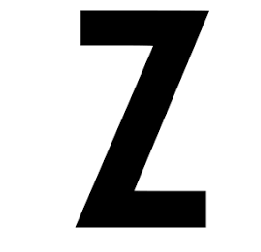

(225, 225, 3)
(old)Prediction1:  U
(new)Prediction2:  H


In [78]:
check('images/z1.png')

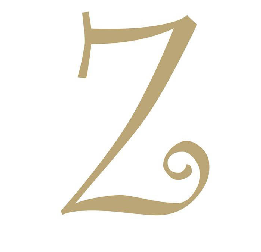

(584, 584, 3)
(old)Prediction1:  O
(new)Prediction2:  O


In [76]:
check('images/Z.jpg')

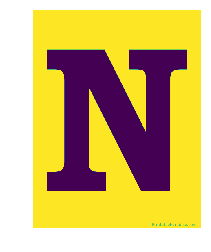

(751, 580)
(old)Prediction1:  N
(new)Prediction2:  N


In [75]:
check('images/N.png')

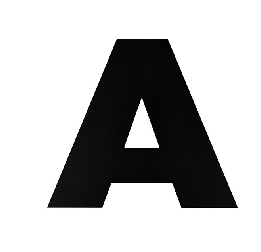

(550, 550, 3)
(old)Prediction1:  N
(new)Prediction2:  N


In [70]:
check('images/A.jpg')

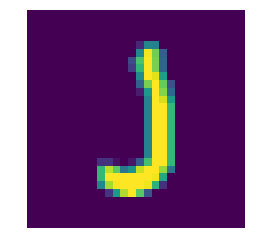

(28, 28)
(old)Prediction1:  J
(new)Prediction2:  J


In [71]:
check('images/J-6037.png')

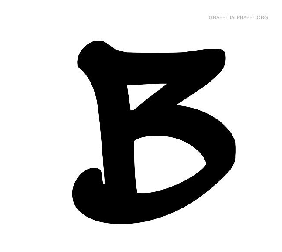

(500, 550, 3)
(old)Prediction1:  B
(new)Prediction2:  B


In [72]:
check('images/B.jpg')

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred1 = model1.predict_classes(test_tensors)

print(classification_report(np.argmax(test_targets, axis=1), y_pred1))
print(confusion_matrix(np.argmax(test_targets, axis=1), y_pred1))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4869
          1       0.95      0.97      0.96      2667
          2       0.97      0.97      0.97      7408
          3       0.97      0.90      0.93      4133
          4       1.00      0.93      0.96      5439
          5       0.97      0.95      0.96       462
          6       0.96      0.94      0.95      2761
          7       0.96      0.94      0.95      2217
          8       0.99      0.95      0.97       419
          9       0.96      0.95      0.95      2492
         10       0.97      0.94      0.96      2602
         11       0.98      0.97      0.97      3585
         12       0.97      0.99      0.98      3335
         13       0.96      0.99      0.97      5009
         14       0.97      1.00      0.98     17824
         15       0.97      0.99      0.98      4340
         16       0.94      0.96      0.95      1811
         17       0.96      0.97      0.97   

In [74]:
y_pred2 = model2.predict_classes(test_tensors)

print(classification_report(np.argmax(test_targets, axis=1), y_pred2))
print(confusion_matrix(np.argmax(test_targets, axis=1), y_pred2))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4869
          1       0.98      0.98      0.98      2667
          2       0.98      0.99      0.98      7408
          3       0.97      0.95      0.96      4133
          4       0.99      0.98      0.99      5439
          5       0.98      0.96      0.97       462
          6       0.99      0.95      0.97      2761
          7       0.97      0.98      0.98      2217
          8       0.99      0.95      0.97       419
          9       0.97      0.97      0.97      2492
         10       0.99      0.97      0.98      2602
         11       0.98      0.99      0.98      3585
         12       0.99      0.99      0.99      3335
         13       0.97      0.99      0.98      5009
         14       0.99      0.99      0.99     17824
         15       0.99      0.99      0.99      4340
         16       0.97      0.98      0.98      1811
         17       0.99      0.98      0.99   